# import neceesary files

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,recall_score,precision_score,auc,accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

In [2]:
### models 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier

# read data and unnderstand

In [3]:
data=pd.read_csv('classification_data.csv')

In [4]:
# number of rows and columns
data.shape   # 100000 rows and 46 colums

(100000, 46)

In [5]:
#findinding columns name
data.columns

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_browser', 'device_operatingSystem', 'device_isMobile',
       'device_deviceCategory', 'geoNetwork_region', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'historic_session', 'historic_session_page',
       'youtube', 'avg_session_time', 'avg_session_time_page',
       'single_page_rate', 'sessionQualityDim', 'last_visitId',
       'latest_visit_id', 'visitId_threshold', 'earliest_visit_id',
       'earliest_visit_number', 'latest_visit_number', 'time_earliest_visit',
       'time_latest_visit', 'avg_visit_time', 'days_since_last_visit',
       'days_since_first_visit', 'visits_per_day', 'bounce_rate',
       'earliest_source', 'latest_source', 'earliest_medium', 'latest_medium',
       'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect',
       'latest_isTrueDirect', 'num_interactions', 'bounces', 'time_on_site',
       'transactionRevenue', 'products_array', 'has_converted', 't

In [6]:
data.head(20)

count_session  count_hit channelGrouping  totals_newVisits  \
0               9       1194         (Other)                 0   
1               9       1194         (Other)                 0   
2              28       1816     Paid Search                 0   
3               2        299     Paid Search                 0   
4               2        299     Paid Search                 0   
5               2        299     Paid Search                 0   
6               2        299     Paid Search                 0   
7               2        299     Paid Search                 0   
8               2        299     Paid Search                 0   
9               2        299     Paid Search                 0   
10              2        299     Paid Search                 0   
11              2        299     Paid Search                 0   
12              2        299     Paid Search                 0   
13              2        299     Paid Search                 0   
14              2        299     Paid Search                 0   
15              2        299     Paid Search                 0   
16              3        507     Paid Search                 0   
17              3        507     Paid Search                 0   
18              3        507     Paid Search                 0   
19              3        507     Paid Search                 0   

     device_browser device_operatingSystem  device_isMobile  \
0   GoogleAnalytics                Android             True   
1   GoogleAnalytics                Android             True   
2   GoogleAnalytics                Android             True   
3   GoogleAnalytics                Android             True   
4   GoogleAnalytics                Android             True   
5   GoogleAnalytics                Android             True   
6   GoogleAnalytics                Android             True   
7   GoogleAnalytics                Android             True   
8   GoogleAnalytics                Android             True   
9   GoogleAnalytics                Android             True   
10  GoogleAnalytics                Android             True   
11  GoogleAnalytics                Android             True   
12  GoogleAnalytics                Android             True   
13  GoogleAnalytics                Android             True   
14  GoogleAnalytics                Android             True   
15  GoogleAnalytics                Android             True   
16  GoogleAnalytics                    iOS             True   
17  GoogleAnalytics                    iOS             True   
18  GoogleAnalytics                    iOS             True   
19  GoogleAnalytics                    iOS             True   

   device_deviceCategory geoNetwork_region  geoNetwork_latitude  ...  \
0                 mobile           Sharjah              25.3463  ...   
1                 mobile           Sharjah              25.3463  ...   
2                 mobile             Ajman              25.4052  ...   
3                 mobile         Abu Dhabi              24.4539  ...   
4                 mobile         Abu Dhabi              24.4539  ...   
5                 mobile         Abu Dhabi              24.4539  ...   
6                 mobile         Abu Dhabi              24.4539  ...   
7                 mobile         Abu Dhabi              24.4539  ...   
8                 mobile         Abu Dhabi              24.4539  ...   
9                 mobile         Abu Dhabi              24.4539  ...   
10                mobile         Abu Dhabi              24.4539  ...   
11                mobile         Abu Dhabi              24.4539  ...   
12                mobile         Abu Dhabi              24.4539  ...   
13                mobile         Abu Dhabi              24.4539  ...   
14                mobile         Abu Dhabi              24.4539  ...   
15                mobile         Abu Dhabi              24.4539  ...   
16                mobile         Abu Dhabi              24.4539  ... 

In [7]:
[data['count_hit'].unique()]

[array([ 1194,  1816,   299, ...,  7439,  1148, 12340], dtype=int64)]

In [8]:
#checking the target and check whether the data is balanced or imbalanced
data['has_converted'].value_counts()

has_converted
1    51727
0    48273
Name: count, dtype: int64

In [9]:
data.describe()

count_session      count_hit  totals_newVisits  geoNetwork_latitude  \
count  100000.000000  100000.000000     100000.000000        100000.000000   
mean       21.532440    3671.722790          0.020380            24.918526   
std        24.002385    4627.338737          0.141297             3.352055   
min         1.000000       2.000000          0.000000           -33.924900   
25%         6.000000     971.000000          0.000000            24.453900   
50%        15.000000    2209.000000          0.000000            25.204800   
75%        29.000000    4812.000000          0.000000            25.204800   
max       270.000000   48744.000000          1.000000            59.329300   

       geoNetwork_longitude  historic_session  historic_session_page  \
count         100000.000000     100000.000000          100000.000000   
mean              54.274882       9692.262300            1875.326010   
std                7.911686      12891.629368            5222.527517   
min              -87.629800          2.000000               0.000000   
25%               54.377300       2694.000000               0.000000   
50%               55.270800       5864.000000               0.000000   
75%               55.270800      11858.000000            1985.000000   
max              140.318700     181715.000000           99896.000000   

        youtube  avg_session_time  avg_session_time_page  ...  avg_visit_time  \
count  100000.0     100000.000000          100000.000000  ...   100000.000000   
mean        0.0        617.050355             237.702712  ...       12.535890   
std         0.0        670.494052             642.877317  ...        3.091108   
min         0.0          2.000000               0.000000  ...        0.000000   
25%         0.0        264.096774               0.000000  ...       11.000000   
50%         0.0        396.546296               0.000000  ...       13.000000   
75%         0.0        686.875000             134.437500  ...       14.000000   
max         0.0       5441.000000            5441.000000  ...       23.000000   

       days_since_last_visit  days_since_first_visit  visits_per_day  \
count               100000.0           100000.000000   100000.000000   
mean                     0.0               22.028900      188.959363   
std                      0.0                9.814491      206.667006   
min                      0.0                0.000000        0.923077   
25%                      0.0               19.000000       66.500000   
50%                      0.0               27.000000      126.178571   
75%                      0.0               29.000000      243.607143   
max                      0.0               30.000000     2397.333333   

         bounce_rate  num_interactions        bounces  time_on_site  \
count  100000.000000     100000.000000  100000.000000  1.000000e+05   
mean        0.009081      12139.327810       0.001690  1.588642e+04   
std         0.084930      15106.933004       0.112549  4.796398e+04   
min         0.000000         20.000000       0.000000  0.000000e+00   
25%         0.000000       2393.750000       0.000000  5.960000e+02   
50%         0.000000       7040.000000       0.000000  2.763000e+03   
75%         0.000000      15962.000000       0.000000  1.122600e+04   
max         4.670000     197630.000000      14.000000  1.250267e+06   

       transactionRevenue  has_converted  
count        1.000000e+05  100000.000000  
mean         1.945557e+08       0.517270  
std          5.557385e+08       0.499704  
min          0.000000e+00       0.000000  
25%          0.000000e+00       0.000000  
50%          3.961393e+07       1.000000  
75%          1.571018e+08       1.000000  
max          1.546412e+10       1.000000  

[8 rows x 30 columns]

In [10]:
#findiing null percentage
null_data = (data.isnull().mean()*100).round()

In [11]:
null_data

count_session             0.0
count_hit                 0.0
channelGrouping           0.0
totals_newVisits          0.0
device_browser            0.0
device_operatingSystem    0.0
device_isMobile           0.0
device_deviceCategory     0.0
geoNetwork_region         0.0
geoNetwork_latitude       0.0
geoNetwork_longitude      0.0
historic_session          0.0
historic_session_page     0.0
youtube                   0.0
avg_session_time          0.0
avg_session_time_page     0.0
single_page_rate          0.0
sessionQualityDim         0.0
last_visitId              0.0
latest_visit_id           0.0
visitId_threshold         0.0
earliest_visit_id         0.0
earliest_visit_number     0.0
latest_visit_number       0.0
time_earliest_visit       0.0
time_latest_visit         0.0
avg_visit_time            0.0
days_since_last_visit     0.0
days_since_first_visit    0.0
visits_per_day            0.0
bounce_rate               0.0
earliest_source           0.0
latest_source             0.0
earliest_m

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   count_hit               100000 non-null  int64  
 2   channelGrouping         100000 non-null  object 
 3   totals_newVisits        100000 non-null  int64  
 4   device_browser          100000 non-null  object 
 5   device_operatingSystem  100000 non-null  object 
 6   device_isMobile         100000 non-null  bool   
 7   device_deviceCategory   100000 non-null  object 
 8   geoNetwork_region       100000 non-null  object 
 9   geoNetwork_latitude     100000 non-null  float64
 10  geoNetwork_longitude    100000 non-null  float64
 11  historic_session        100000 non-null  int64  
 12  historic_session_page   100000 non-null  int64  
 13  youtube                 100000 non-null  int64  
 14  avg_session_time     

# finding zero percentage

In [13]:
col_zero=[]
for i in data.columns:
    per_zeo = (data[i]==0).mean()*100
    col_zero.append((i,per_zeo))

z_df = pd.DataFrame(col_zero,columns=['colum','zero_percentage'])
z_df.sort_values('zero_percentage',ascending=False)


colum  zero_percentage
27   days_since_last_visit          100.000
13                 youtube          100.000
40                 bounces           99.965
3         totals_newVisits           97.962
30             bounce_rate           96.614
12   historic_session_page           63.239
15   avg_session_time_page           63.239
44           has_converted           48.273
42      transactionRevenue           38.801
41            time_on_site           13.163
38     latest_isTrueDirect           10.268
37   earliest_isTrueDirect            9.804
28  days_since_first_visit            9.138
16        single_page_rate            6.435
6          device_isMobile            6.414
10    geoNetwork_longitude            0.830
9      geoNetwork_latitude            0.830
24     time_earliest_visit            0.016
26          avg_visit_time            0.014
25       time_latest_visit            0.010
39        num_interactions            0.000
36          latest_keyword            0.000
35        earliest_keyword            0.000
34           latest_medium            0.000
33         earliest_medium            0.000
32           latest_source            0.000
31         earliest_source            0.000
43          products_array            0.000
0            count_session            0.000
23     latest_visit_number            0.000
29          visits_per_day            0.000
1                count_hit            0.000
22   earliest_visit_number            0.000
21       earliest_visit_id            0.000
20       visitId_threshold            0.000
19         latest_visit_id            0.000
18            last_visitId            0.000
17       sessionQualityDim            0.000
14        avg_session_time            0.000
11        historic_session            0.000
8        geoNetwork_region            0.000
7    device_deviceCategory            0.000
5   device_operatingSystem            0.000
4           device_browser            0.000
2          channelGrouping            0.000
45             target_date            0.000

In [14]:
zero_columns=list(z_df[z_df['zero_percentage']>90]['colum'].sort_values(ascending=False))
zero_columns    
    

['youtube',
 'totals_newVisits',
 'days_since_last_visit',
 'bounces',
 'bounce_rate']

In [15]:
data1=data.drop(zero_columns,axis=1 )

data1.shape

(100000, 41)

In [16]:
data1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   count_hit               100000 non-null  int64  
 2   channelGrouping         100000 non-null  object 
 3   device_browser          100000 non-null  object 
 4   device_operatingSystem  100000 non-null  object 
 5   device_isMobile         100000 non-null  bool   
 6   device_deviceCategory   100000 non-null  object 
 7   geoNetwork_region       100000 non-null  object 
 8   geoNetwork_latitude     100000 non-null  float64
 9   geoNetwork_longitude    100000 non-null  float64
 10  historic_session        100000 non-null  int64  
 11  historic_session_page   100000 non-null  int64  
 12  avg_session_time        100000 non-null  float64
 13  avg_session_time_page   100000 non-null  float64
 14  single_page_rate     

In [17]:
obj_colum =data1.select_dtypes(include = 'object').columns
obj_colum

Index(['channelGrouping', 'device_browser', 'device_operatingSystem',
       'device_deviceCategory', 'geoNetwork_region', 'earliest_source',
       'latest_source', 'earliest_medium', 'latest_medium', 'earliest_keyword',
       'latest_keyword', 'products_array', 'target_date'],
      dtype='object')

In [18]:
def plot_cat(column_name):
    data_1 = data[column_name].value_counts()
    plt.figure(figsize=(16,9))
    color = sns.color_palette('husl',len(data_1))
    data_1.plot(kind ='bar',color = color)
    plt.show()

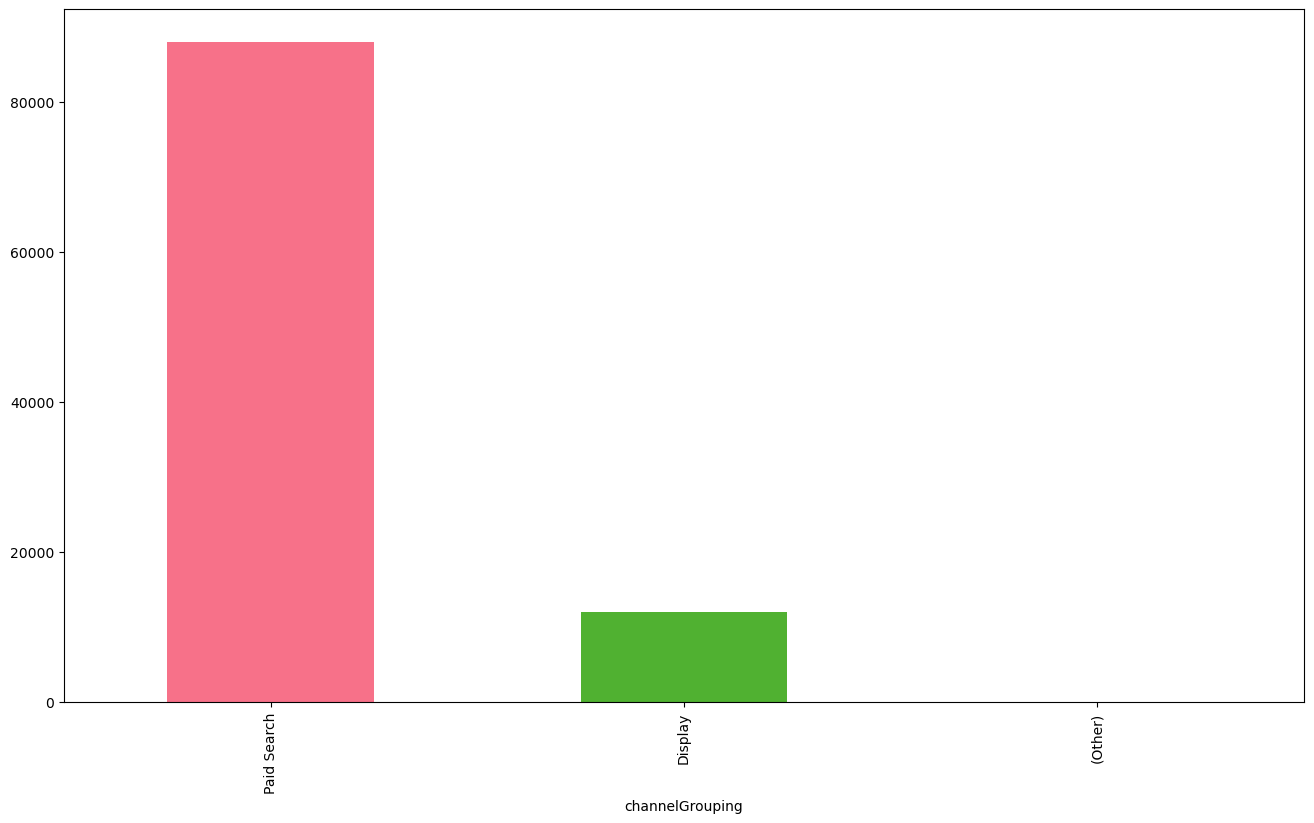

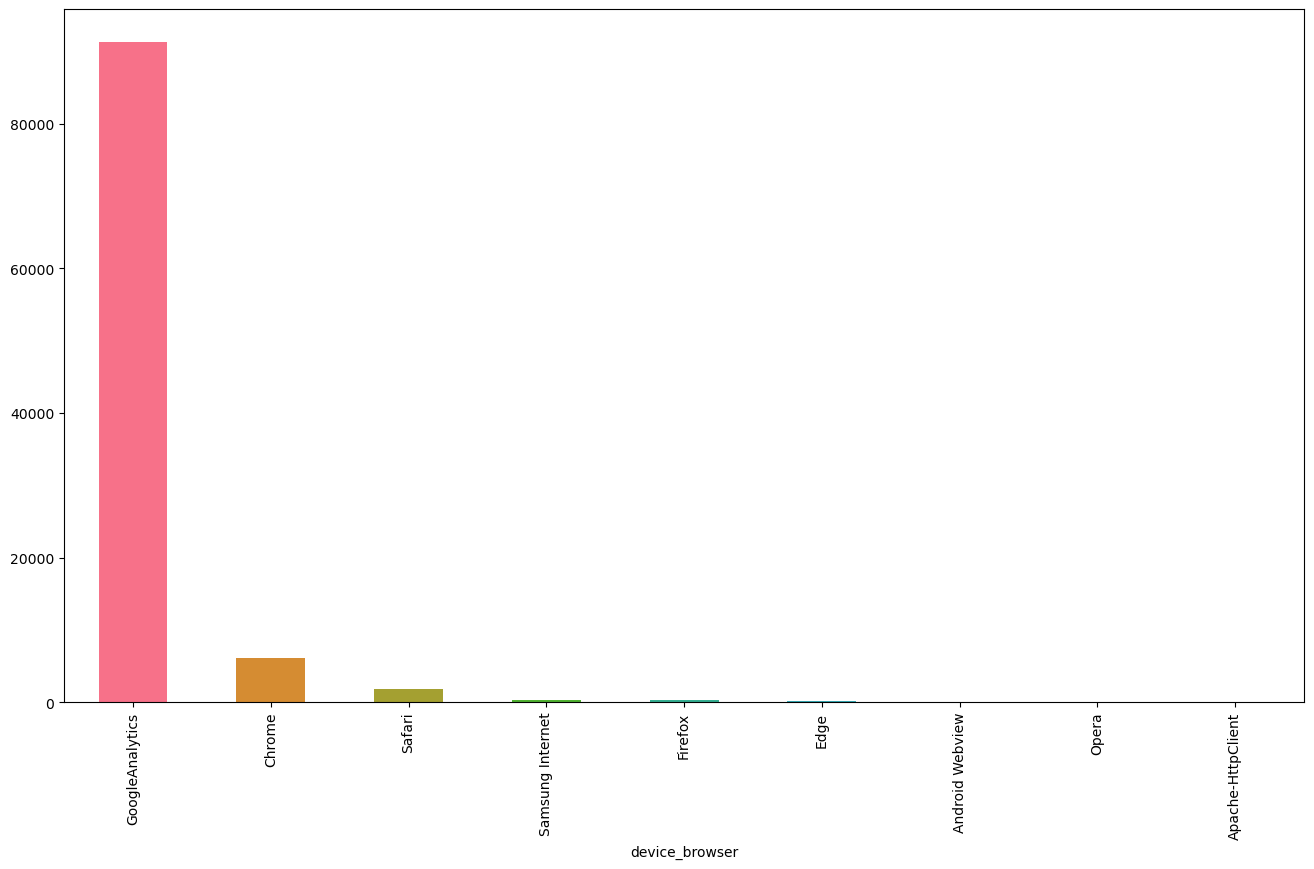

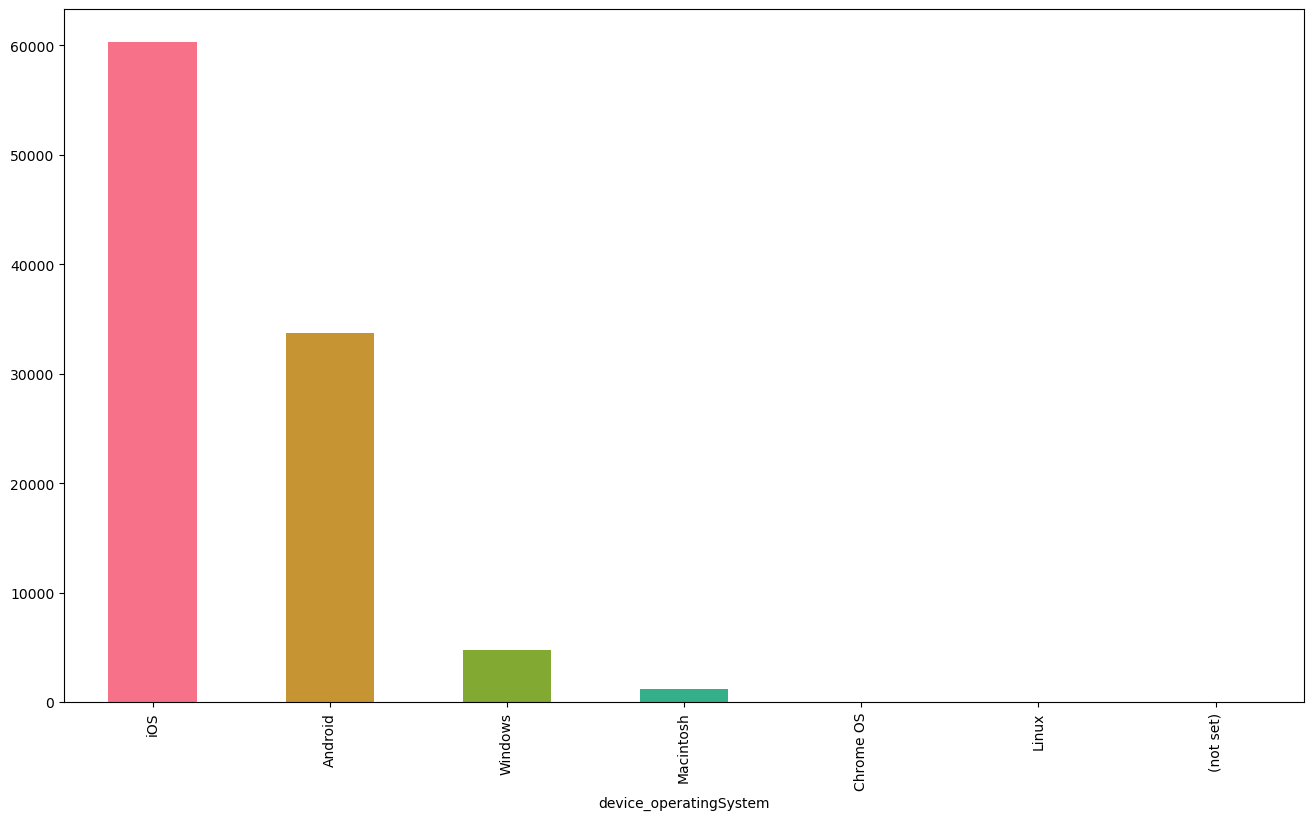

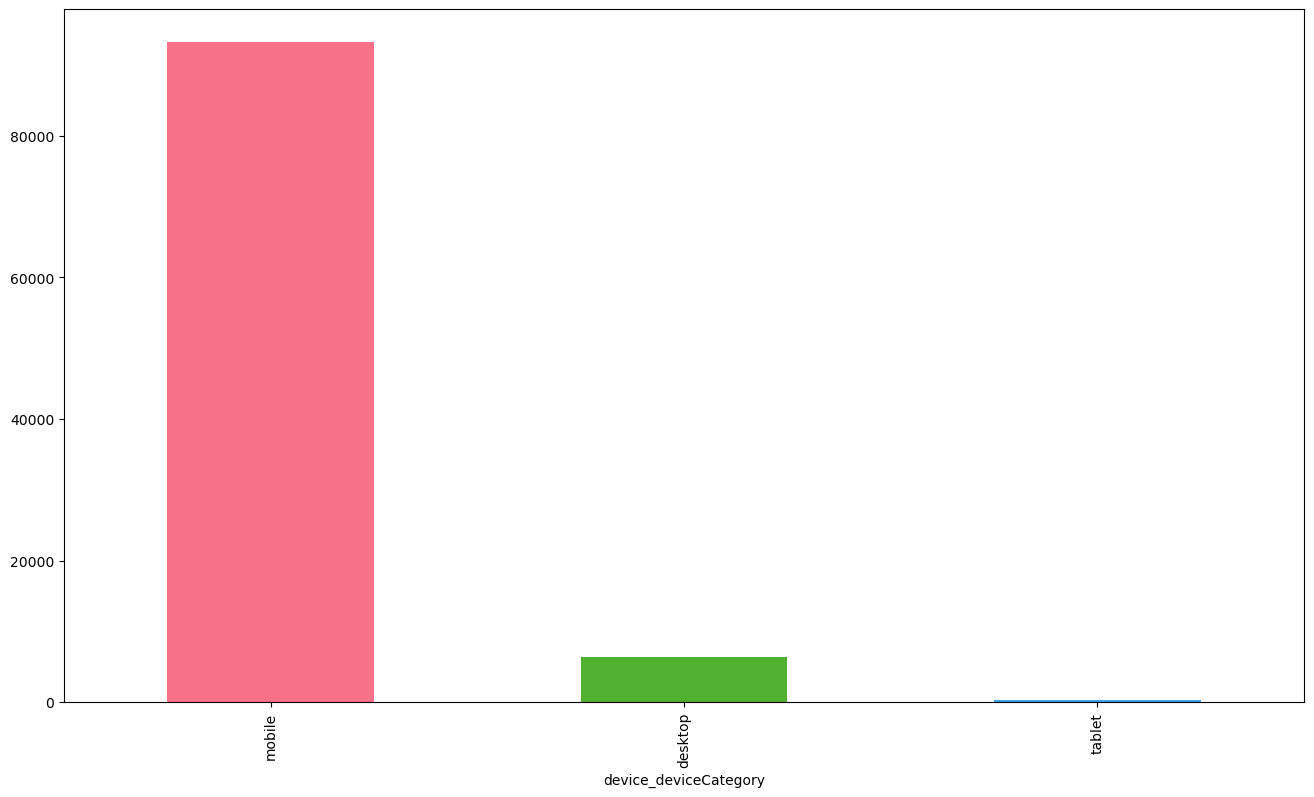

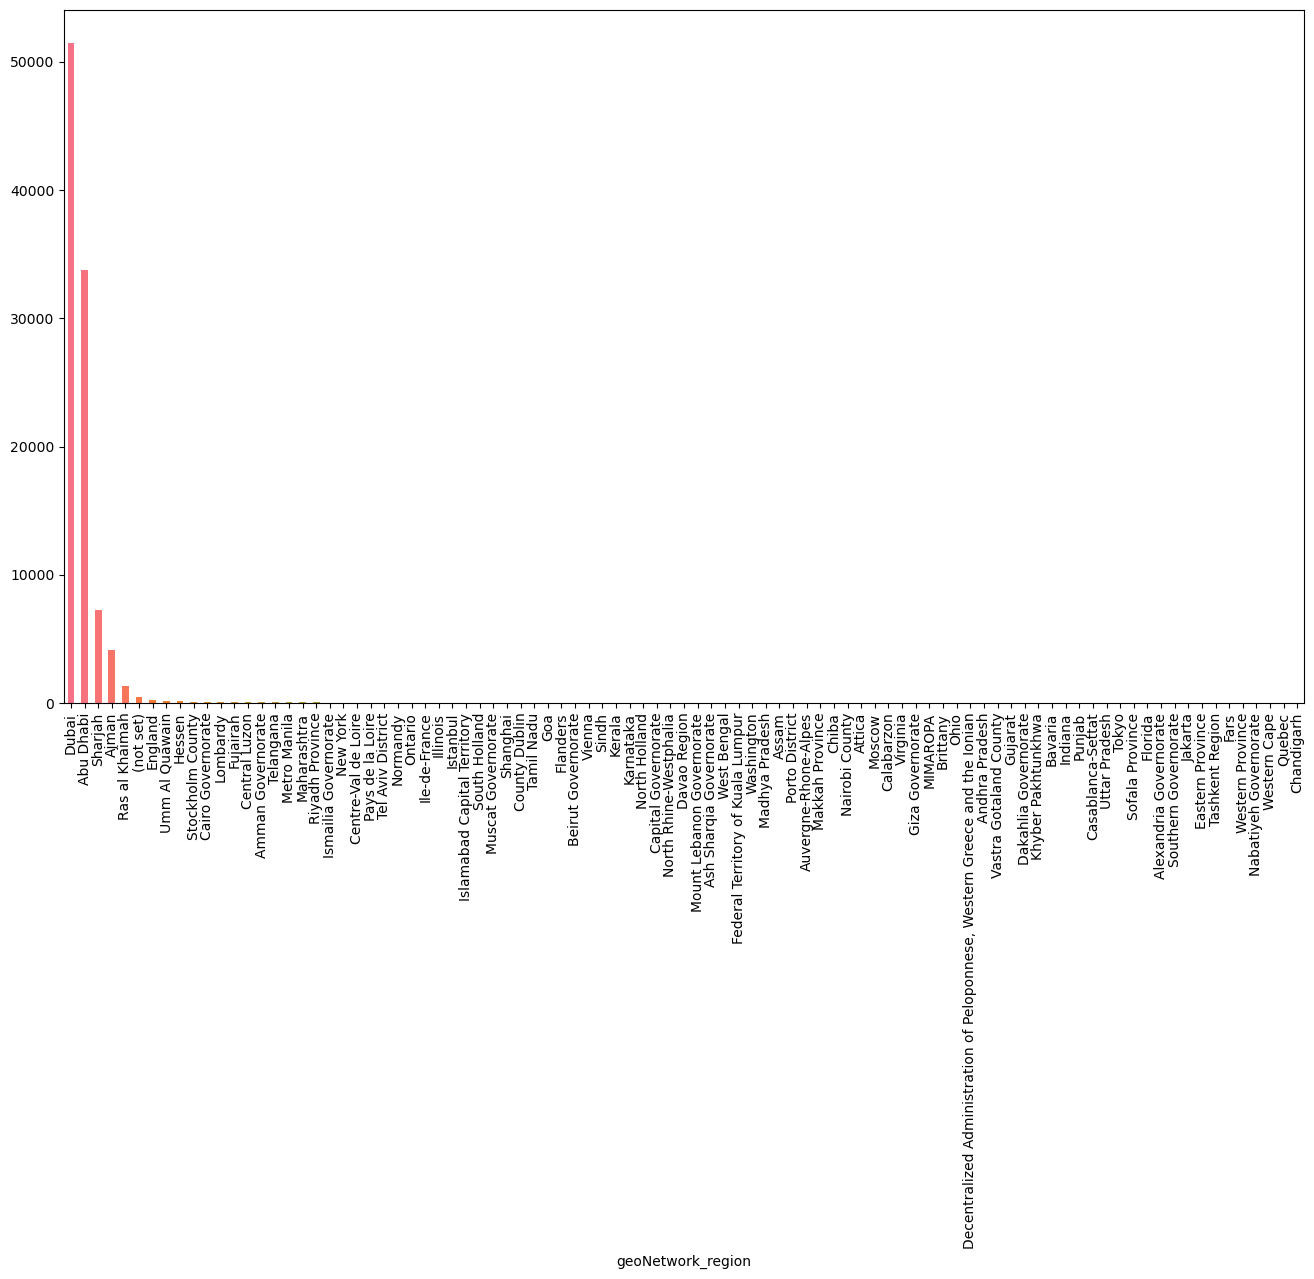

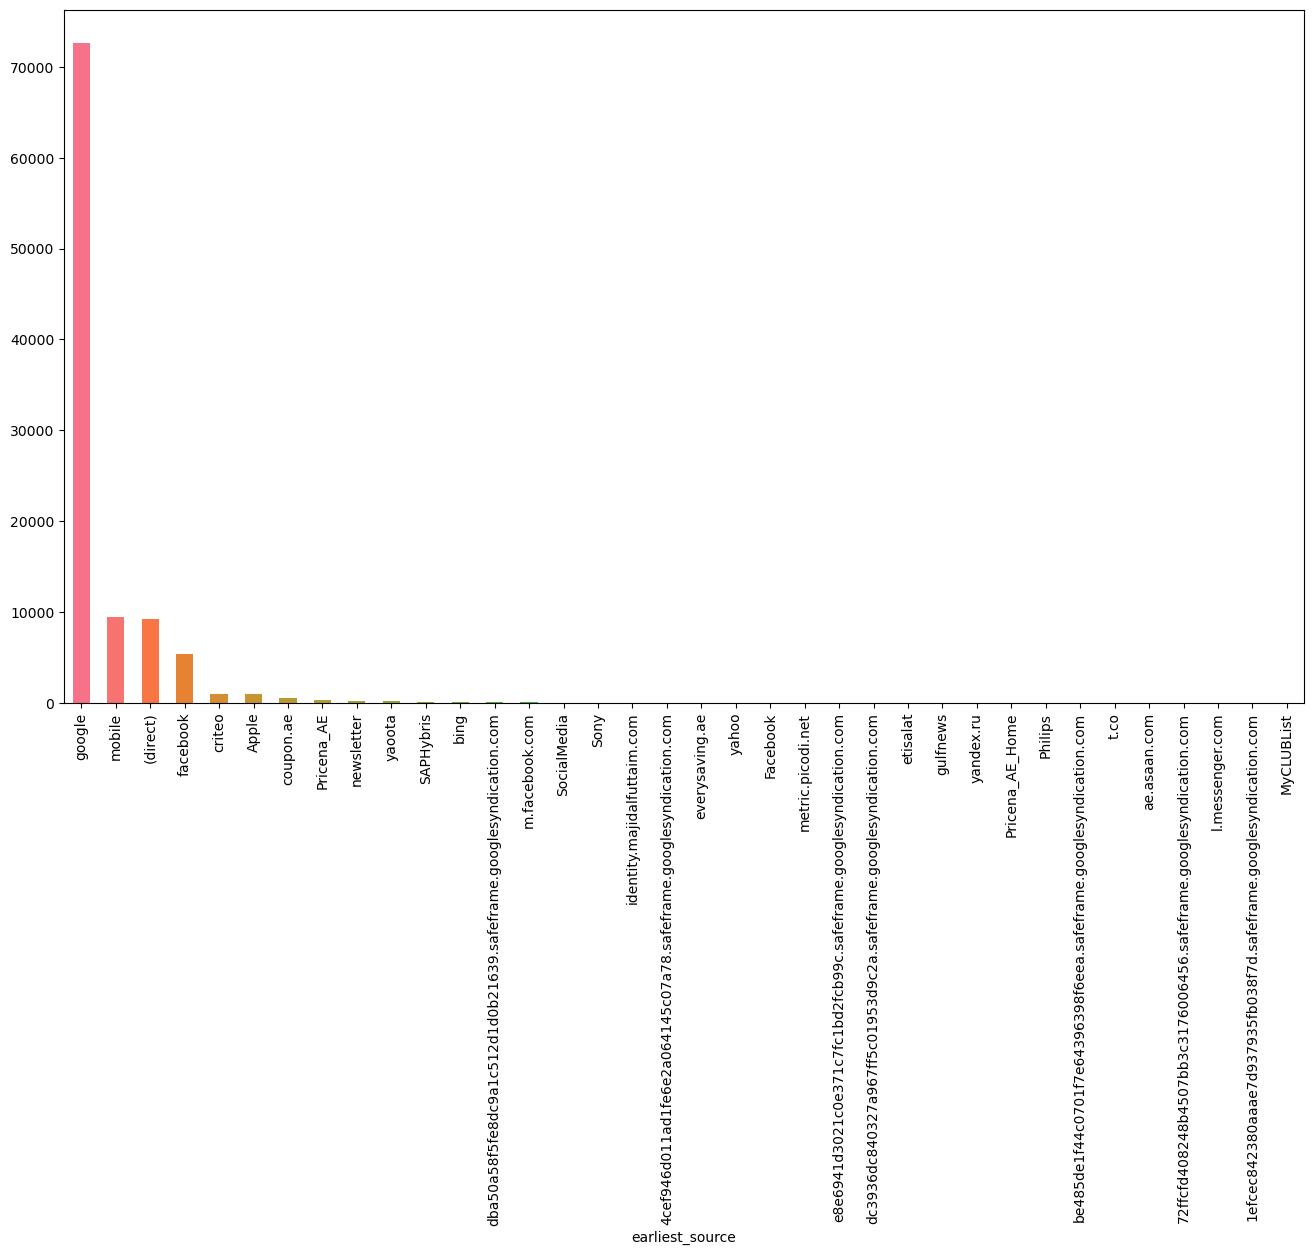

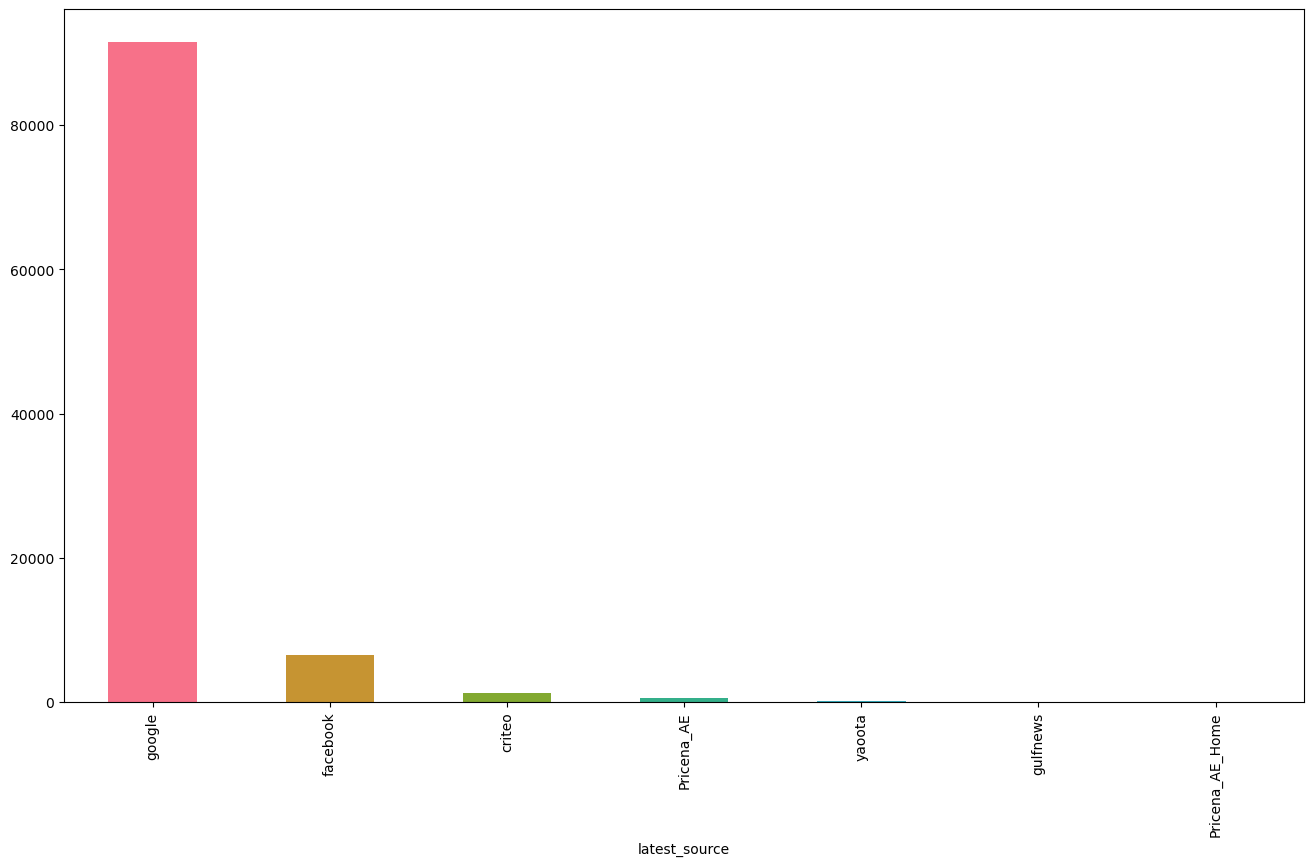

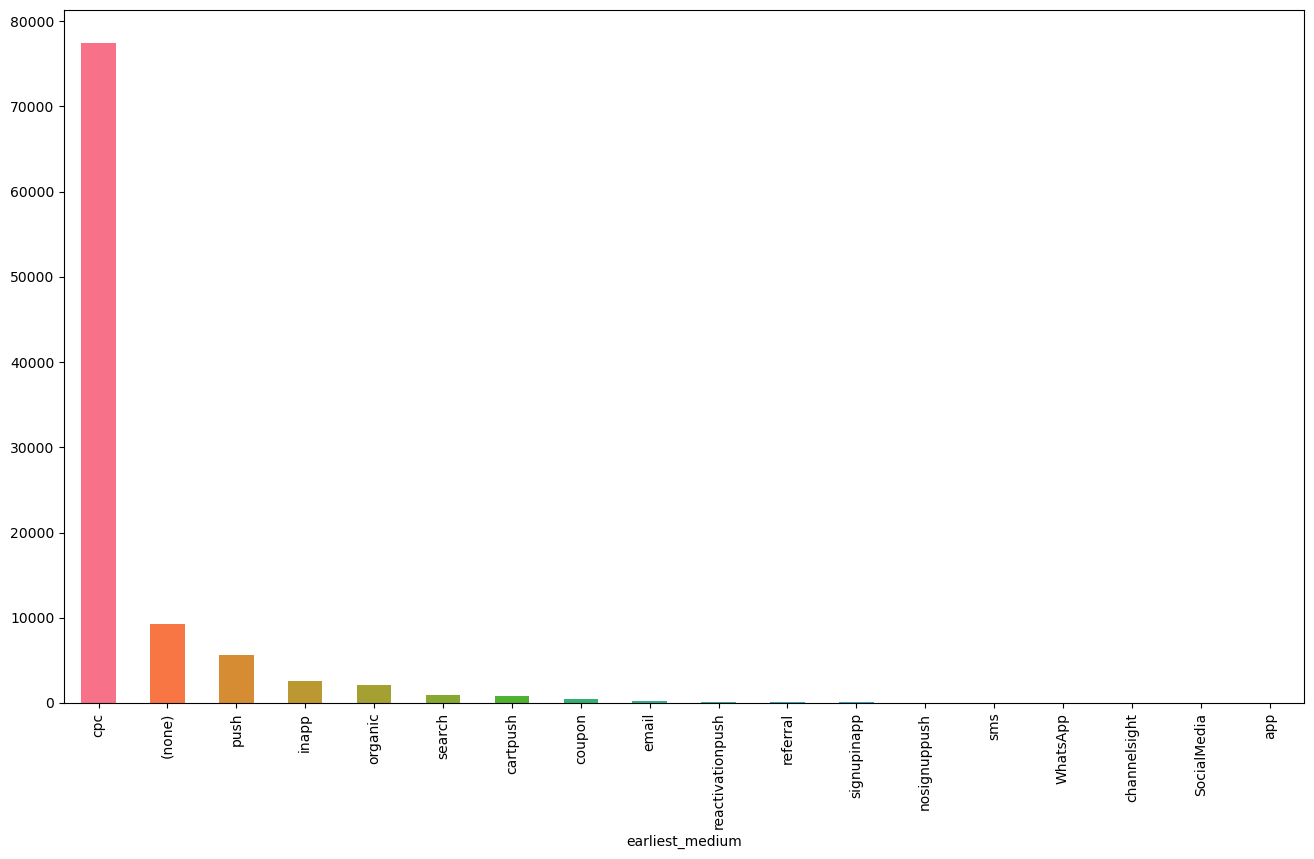

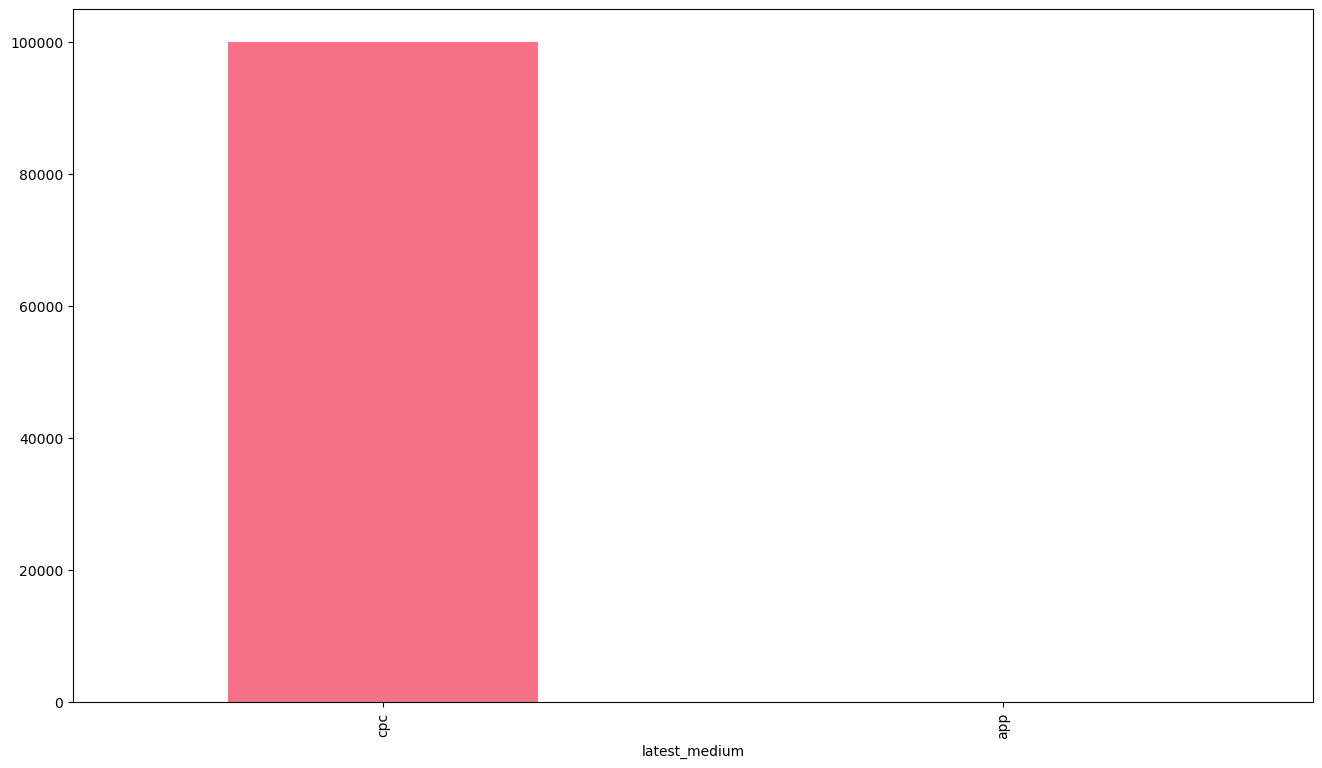

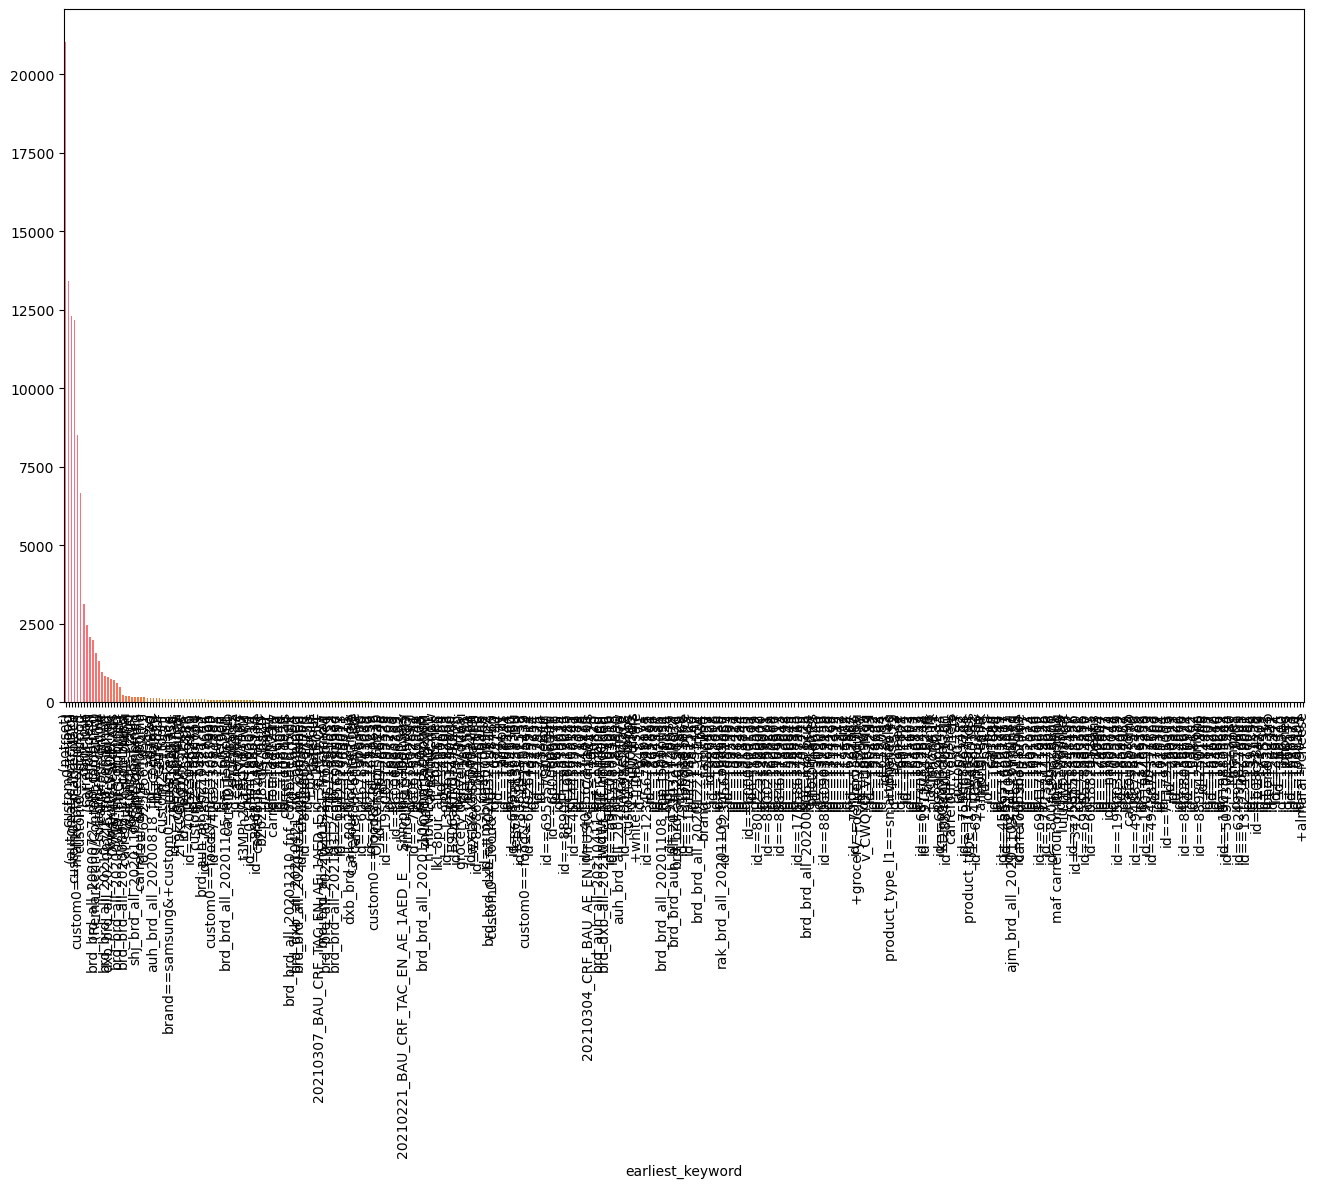

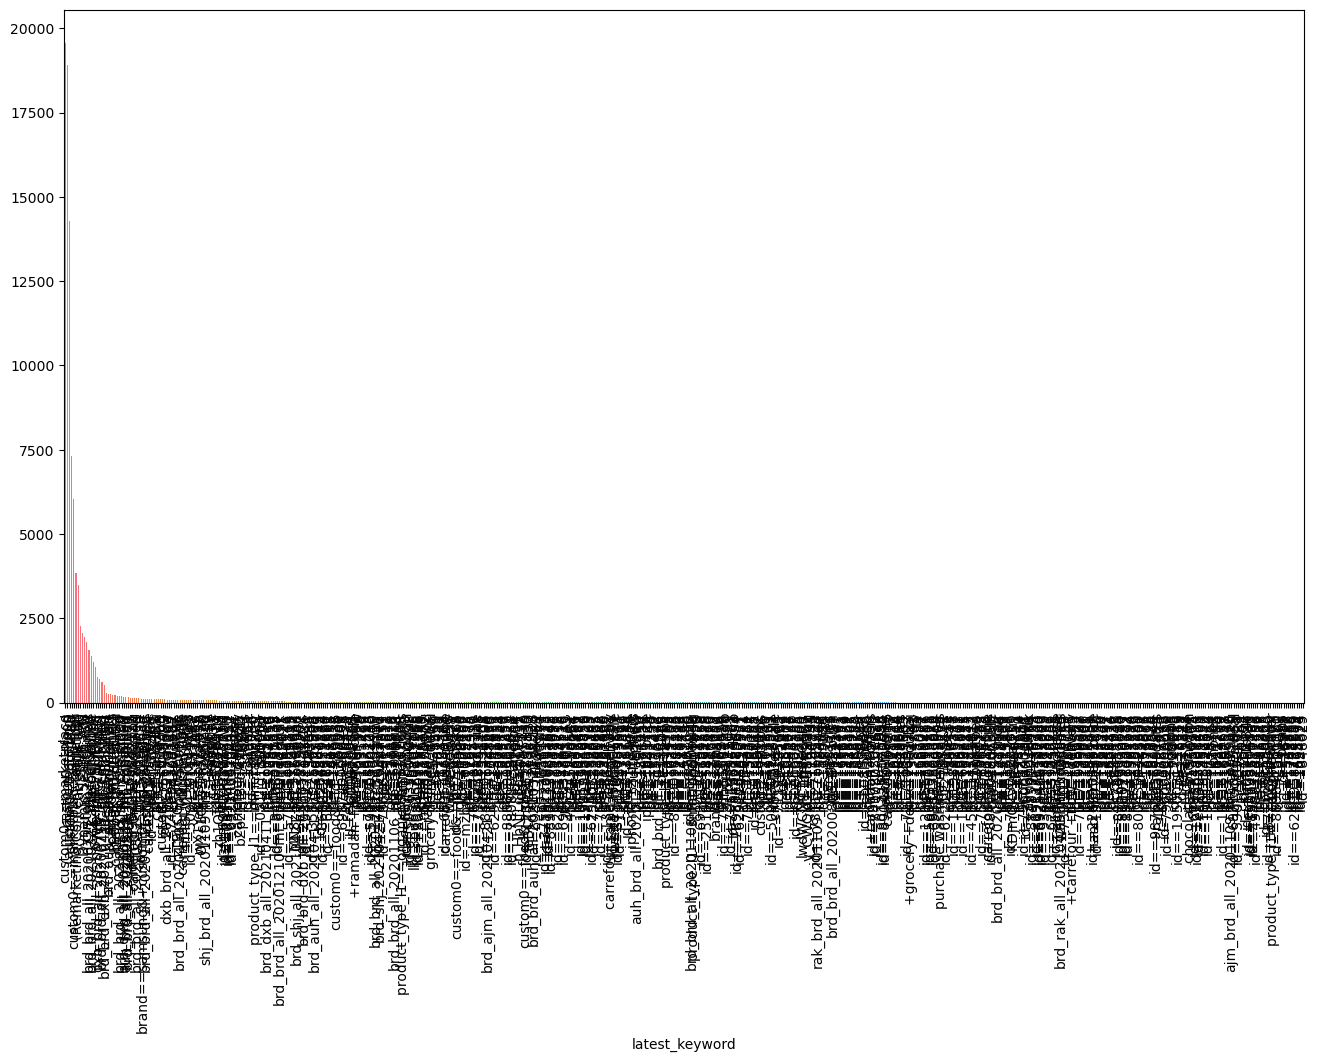

ValueError: Image size of 1312x73027 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1600x900 with 1 Axes>

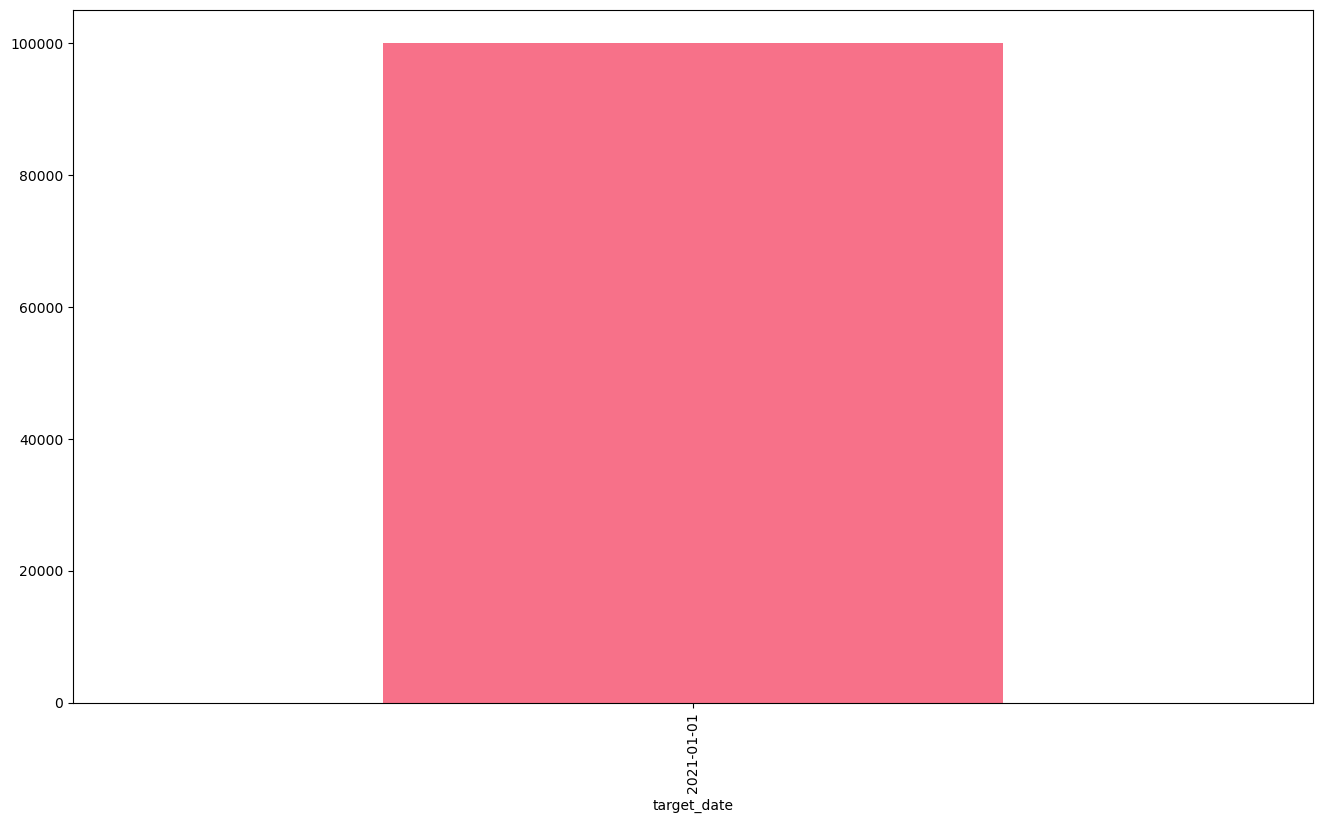

In [19]:
for i in obj_colum:
    plot_cat(i)

In [20]:
data1 = data1.drop('latest_medium',axis = 1)



In [21]:
data1= data1.drop('target_date',axis = 1)

In [22]:
dup_data=data.duplicated().sum()
dup_data1=data1.duplicated().sum()
print("overall data",data.shape[0])
print("duplicated data",dup_data)

overall data 100000
duplicated data 90793


In [23]:
data1=data1.drop_duplicates()

In [24]:
data1.shape

(9207, 39)

In [25]:
dup_data1=data1.duplicated().sum()
dup_data1

0

In [26]:
obj_colum =data1.select_dtypes(include=['object']).columns
obj_colum

Index(['channelGrouping', 'device_browser', 'device_operatingSystem',
       'device_deviceCategory', 'geoNetwork_region', 'earliest_source',
       'latest_source', 'earliest_medium', 'earliest_keyword',
       'latest_keyword', 'products_array'],
      dtype='object')

In [27]:
def plot_cat(column_name):
    data_1 = data[column_name].value_counts()
    plt.figure(figsize=(16,9))
    color = sns.color_palette('husl',len(data_1))
    data_1.plot(kind ='bar',color = color)
    plt.show()

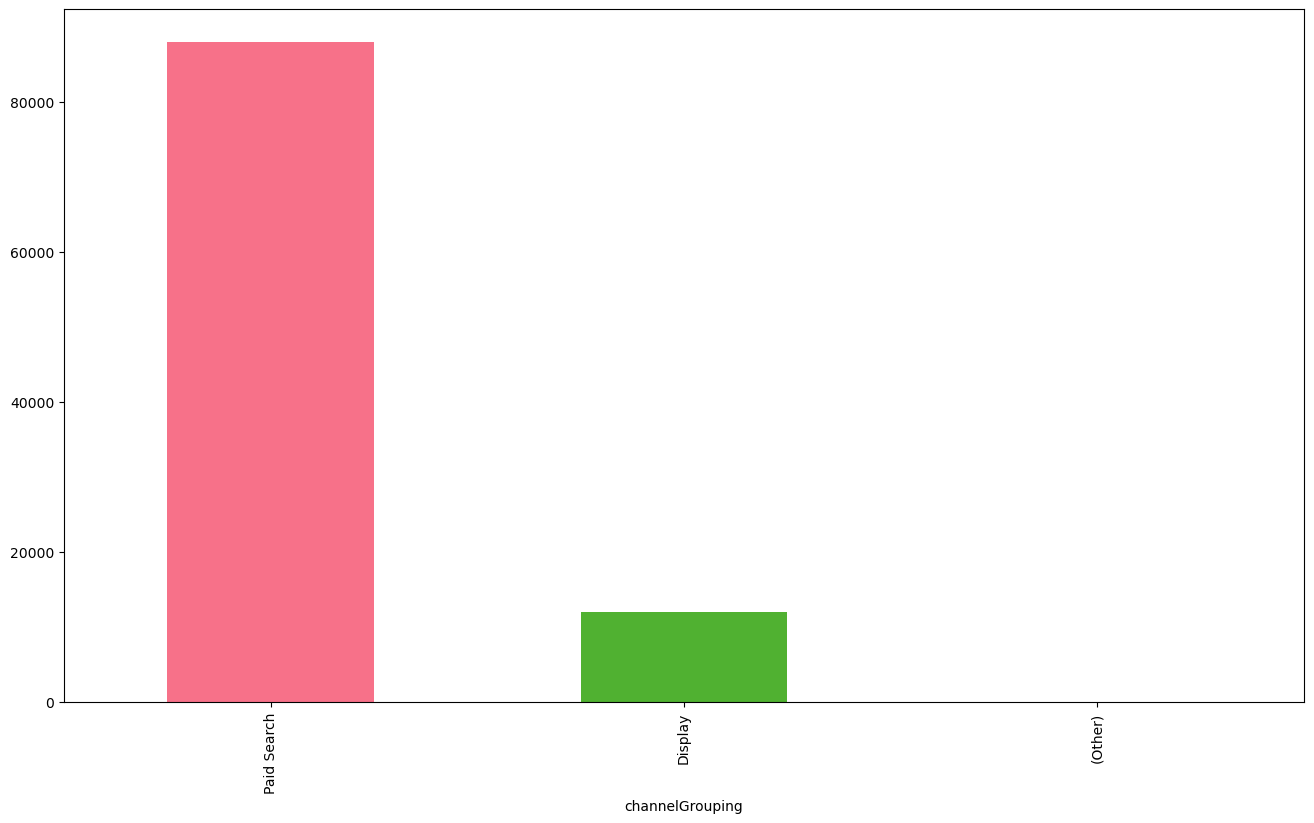

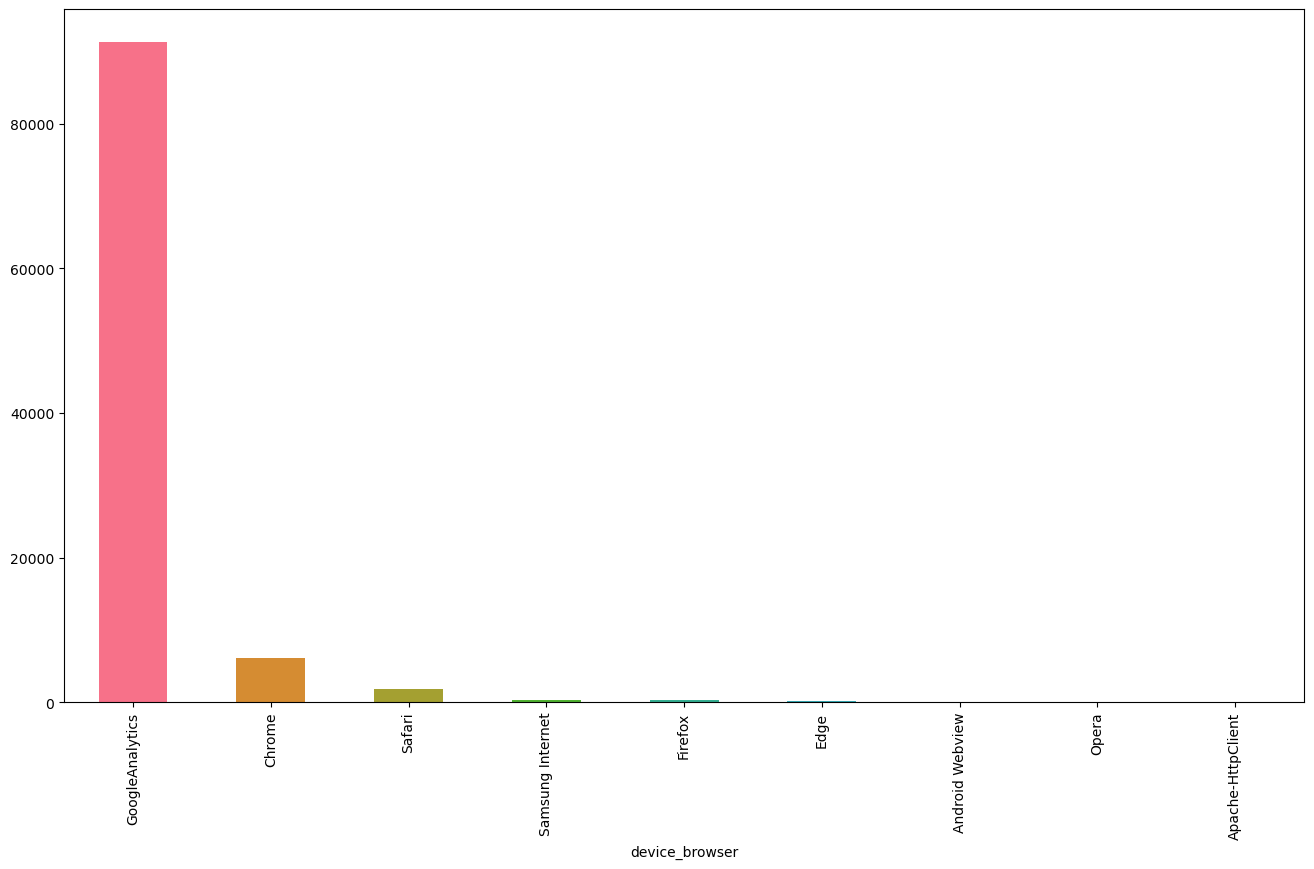

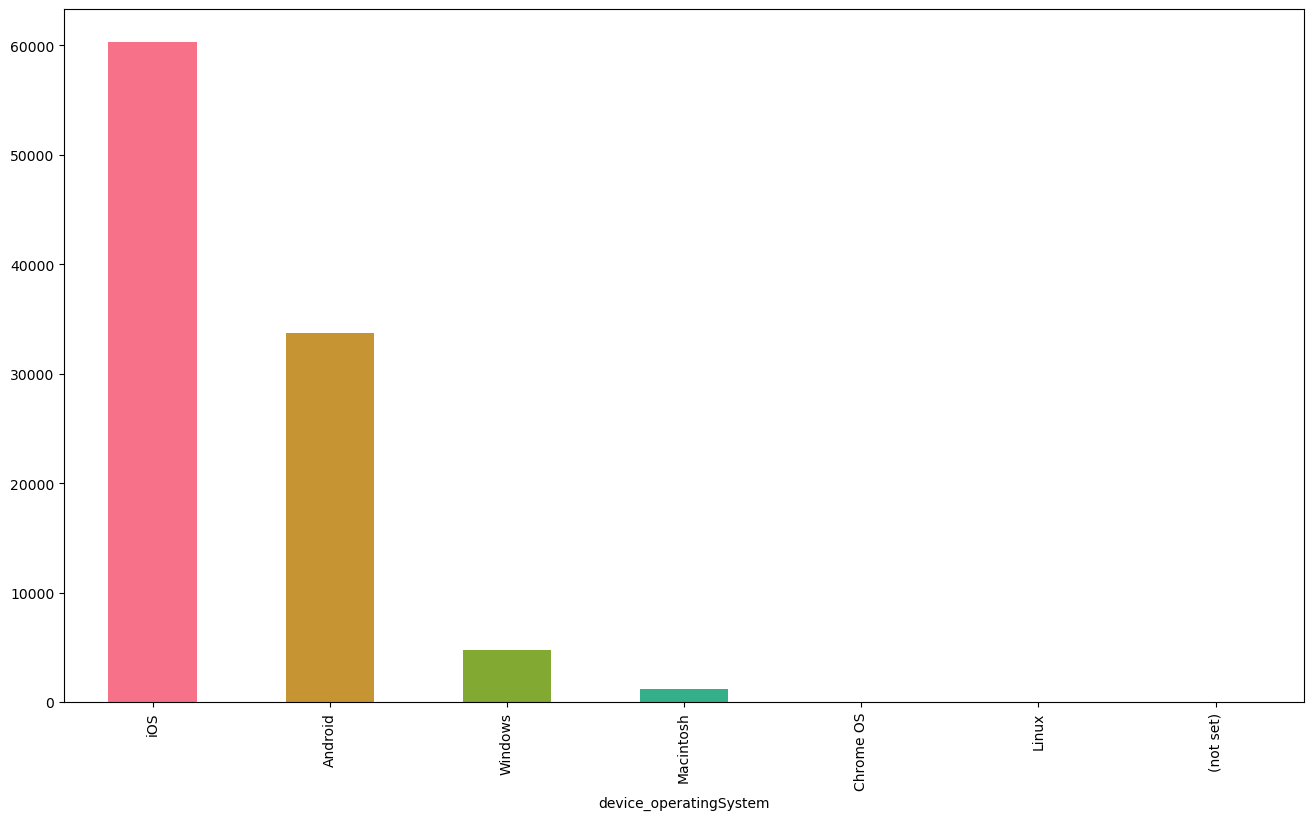

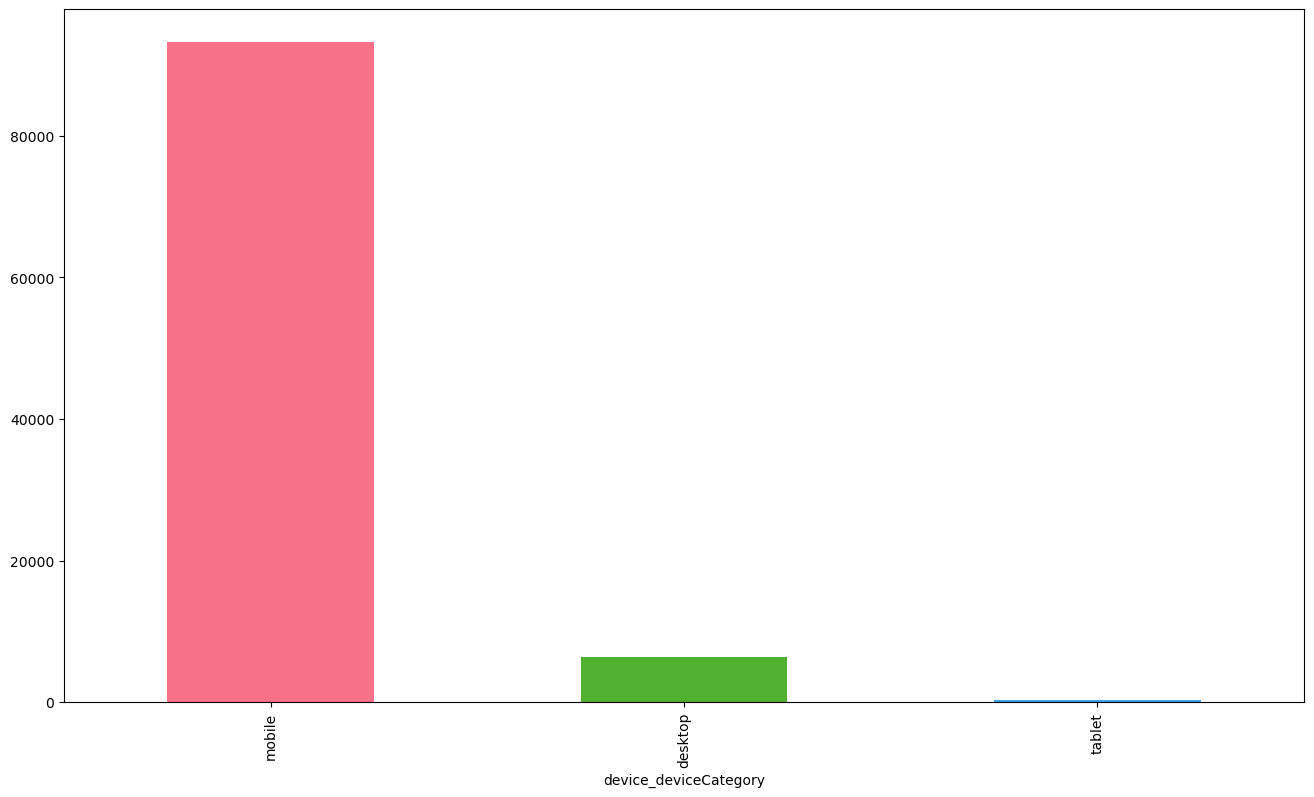

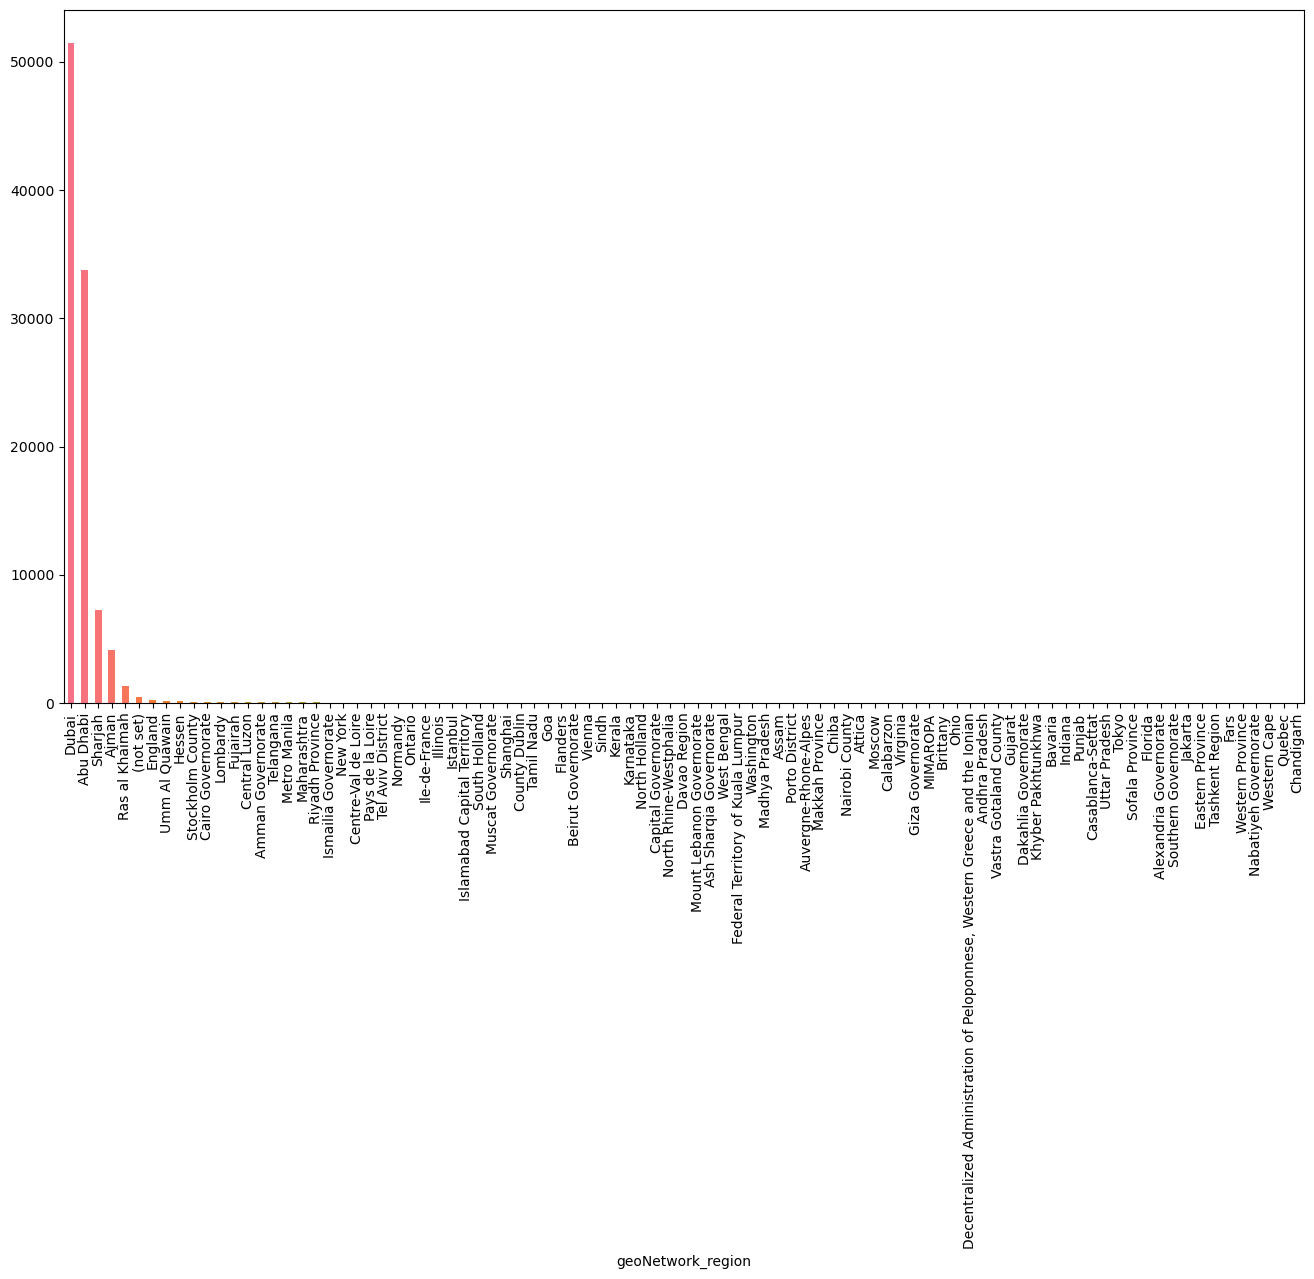

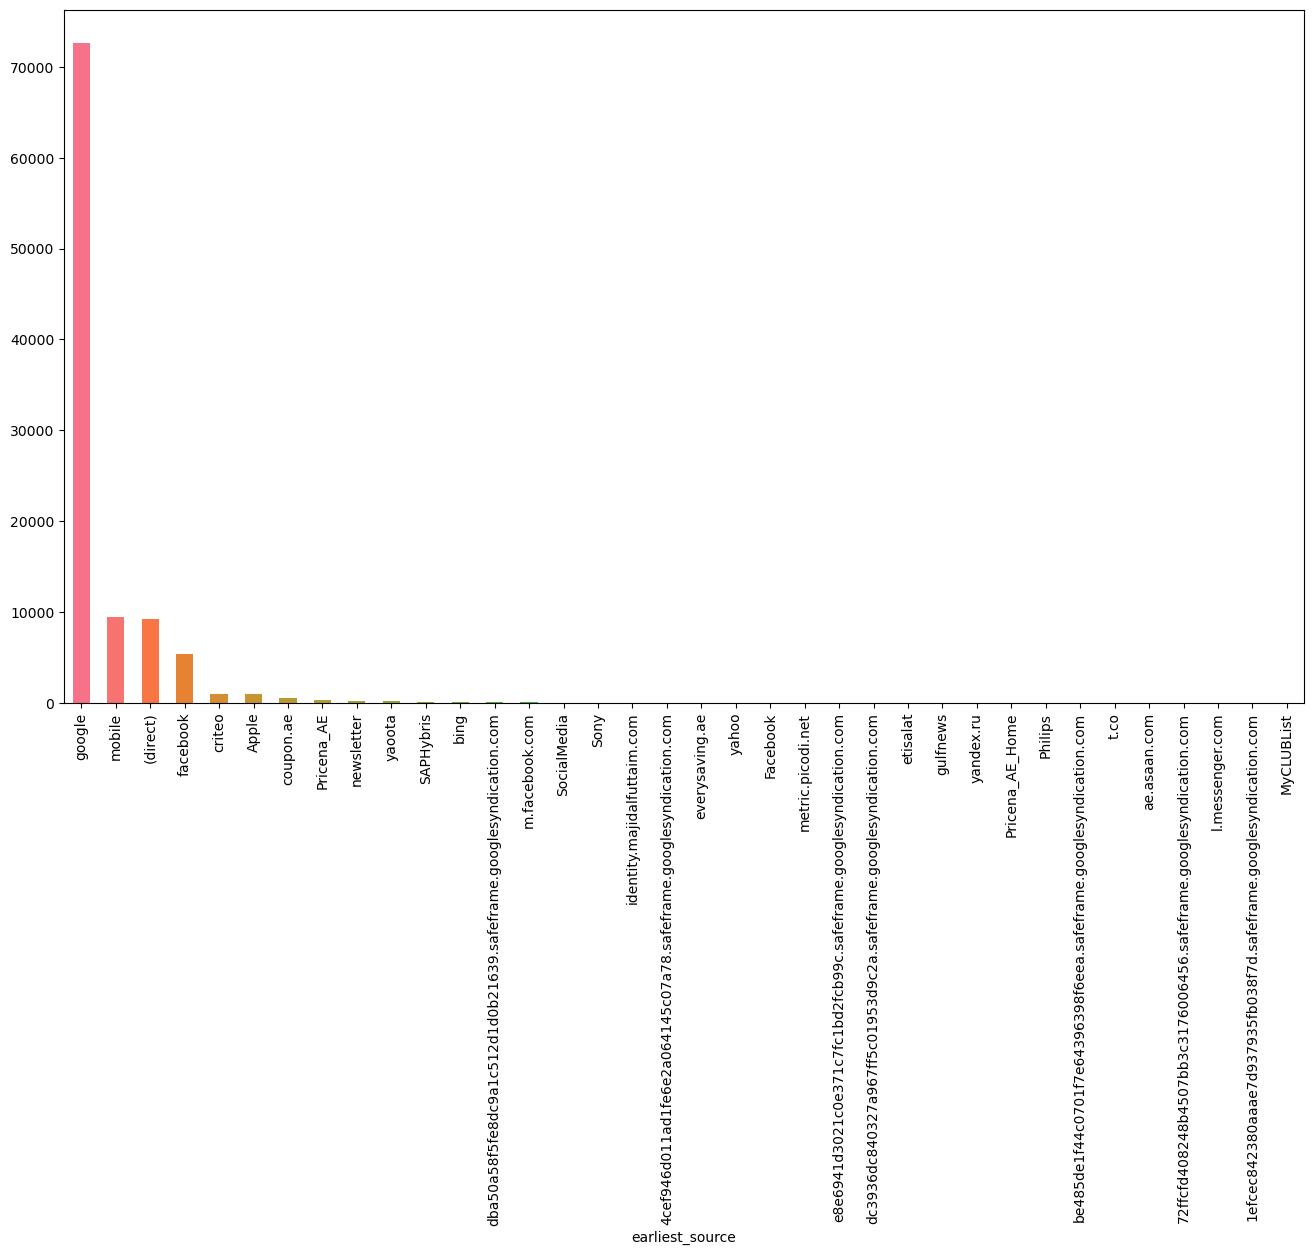

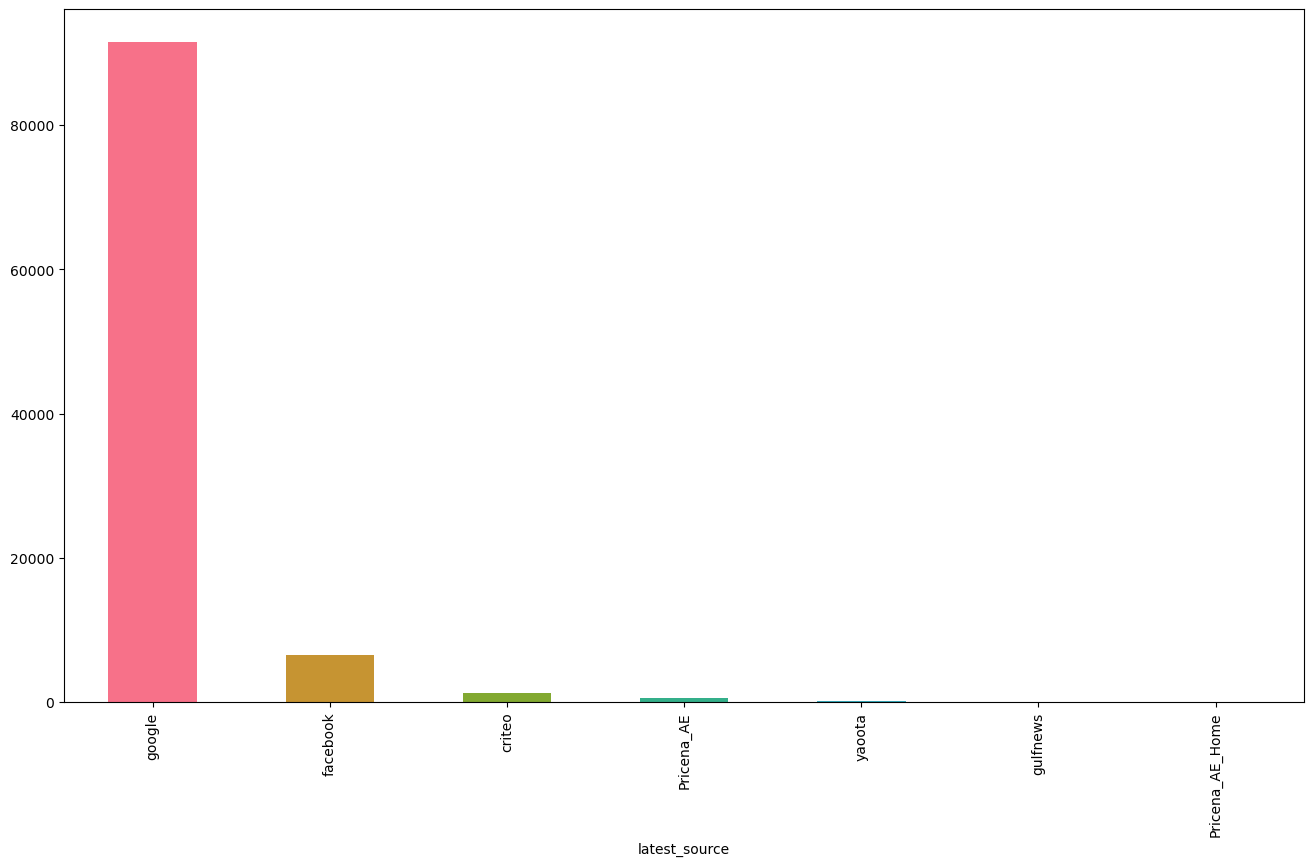

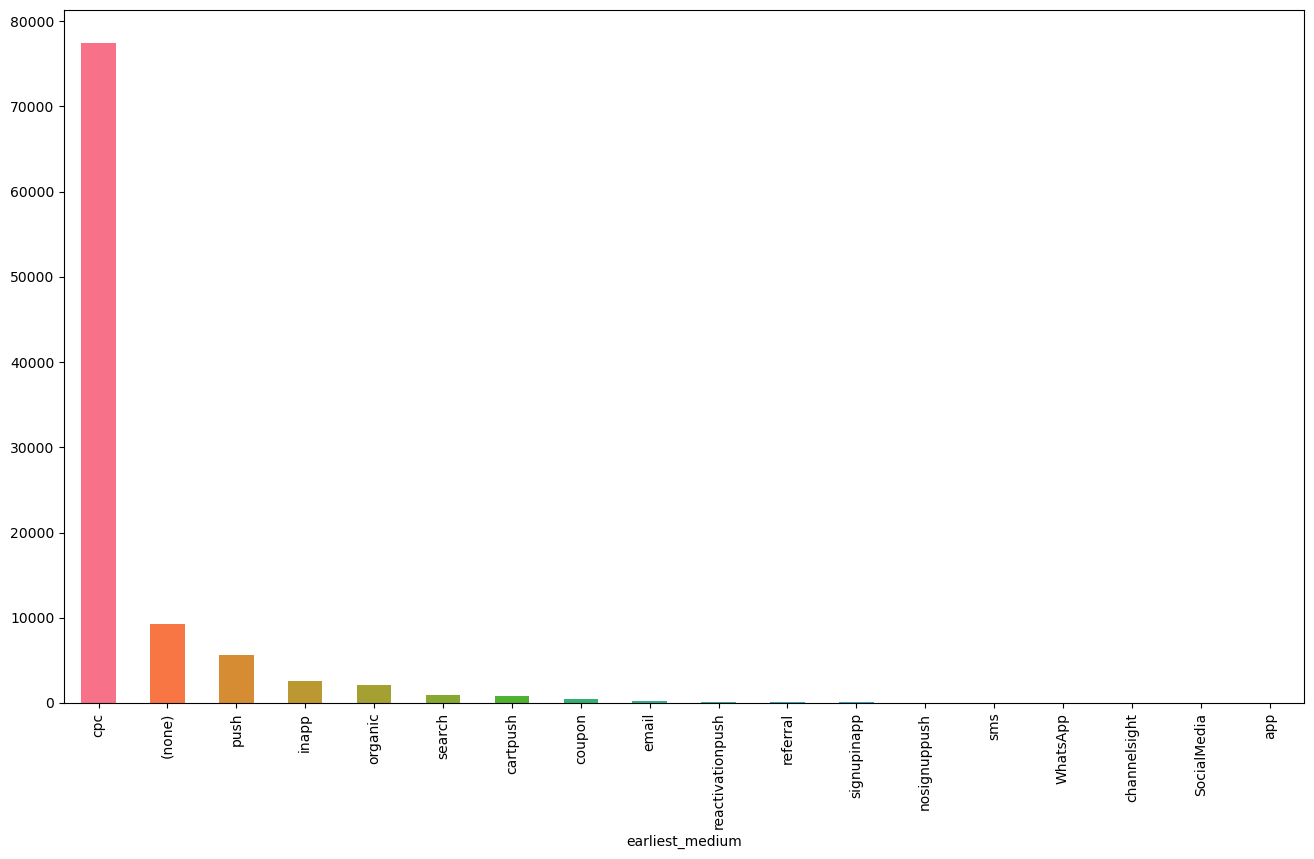

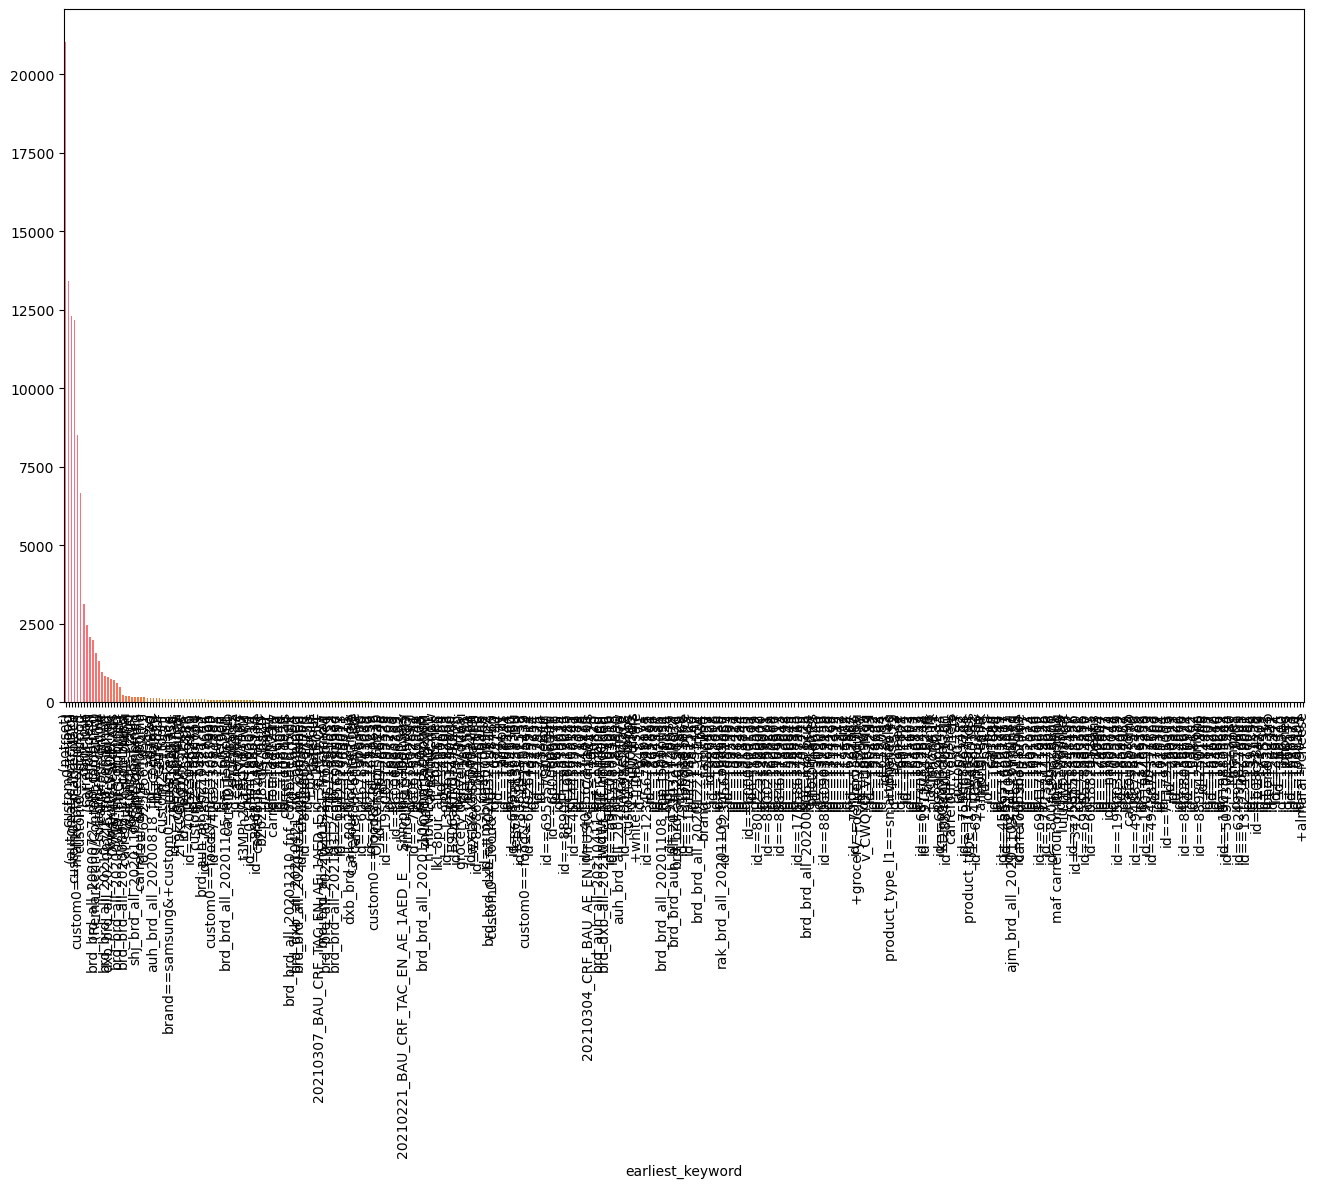

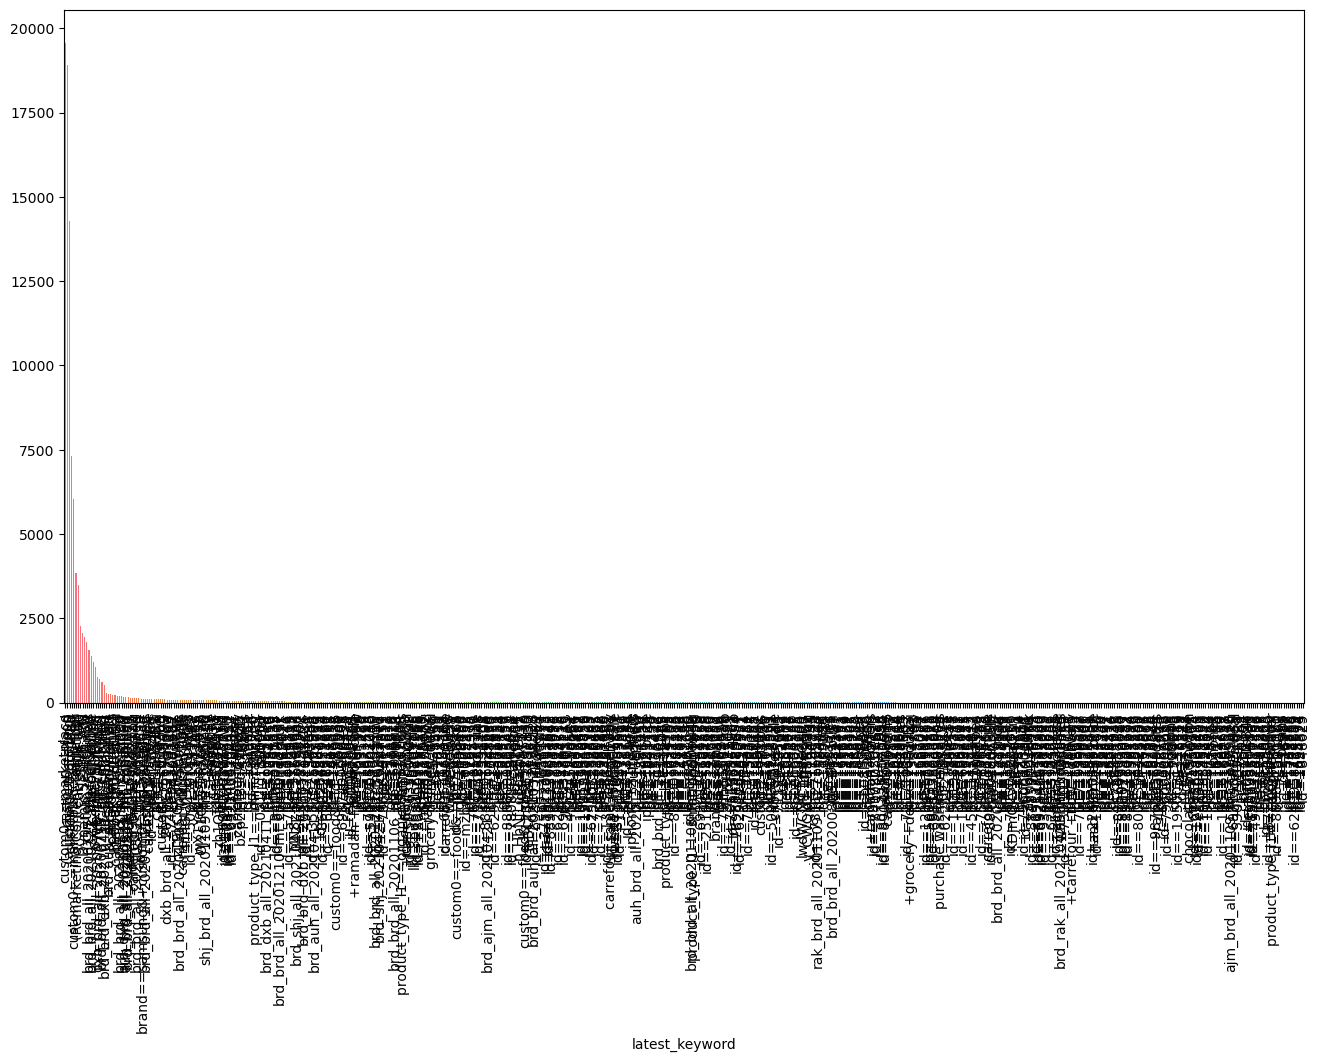

ValueError: Image size of 1312x73027 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1600x900 with 1 Axes>

In [28]:
for i in obj_colum:
    plot_cat(i)

In [29]:
bool_colum = data1.select_dtypes(include=['bool']).columns
bool_colum

Index(['device_isMobile', 'earliest_isTrueDirect', 'latest_isTrueDirect'], dtype='object')

In [30]:
def plot_bool(column_name):
    data_1 = data[column_name].value_counts()
    plt.figure(figsize=(16,9))
    color = sns.color_palette('husl',len(data_1))
    data_1.plot(kind ='bar',color = color)
    plt.show()

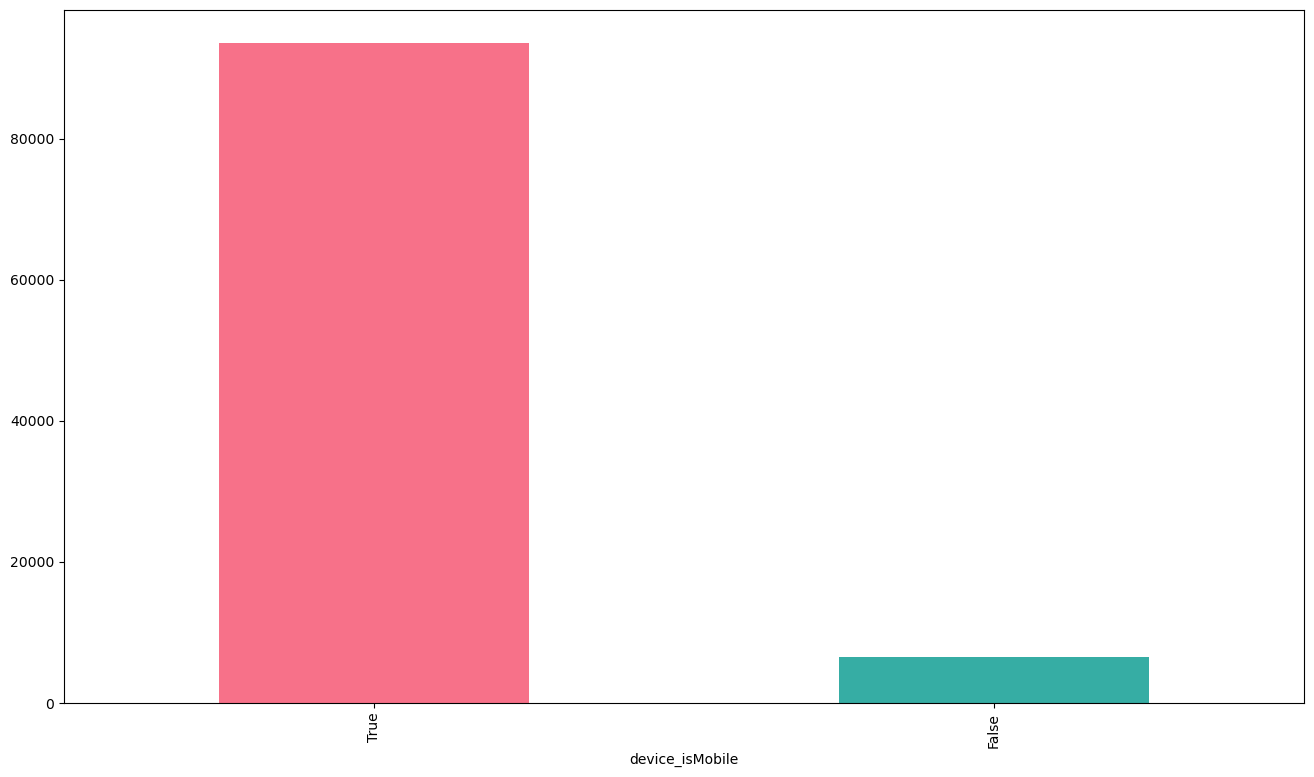

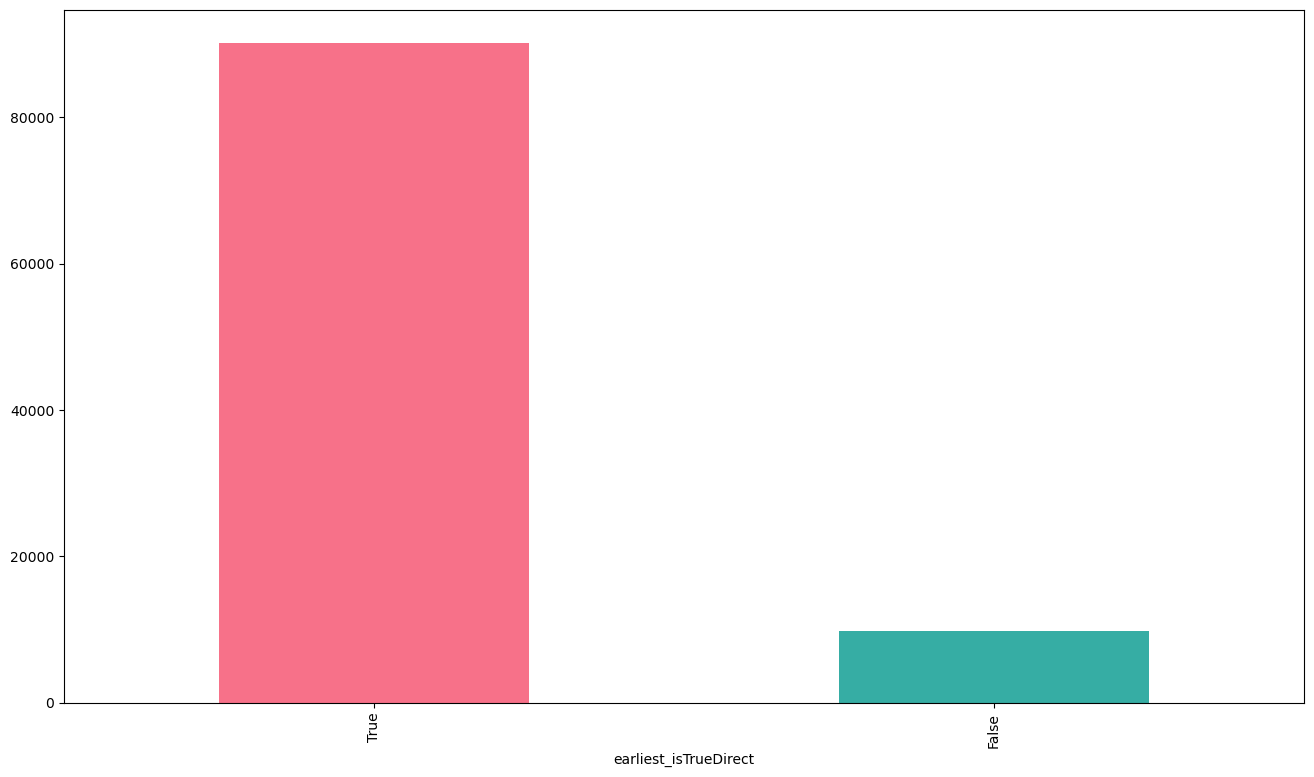

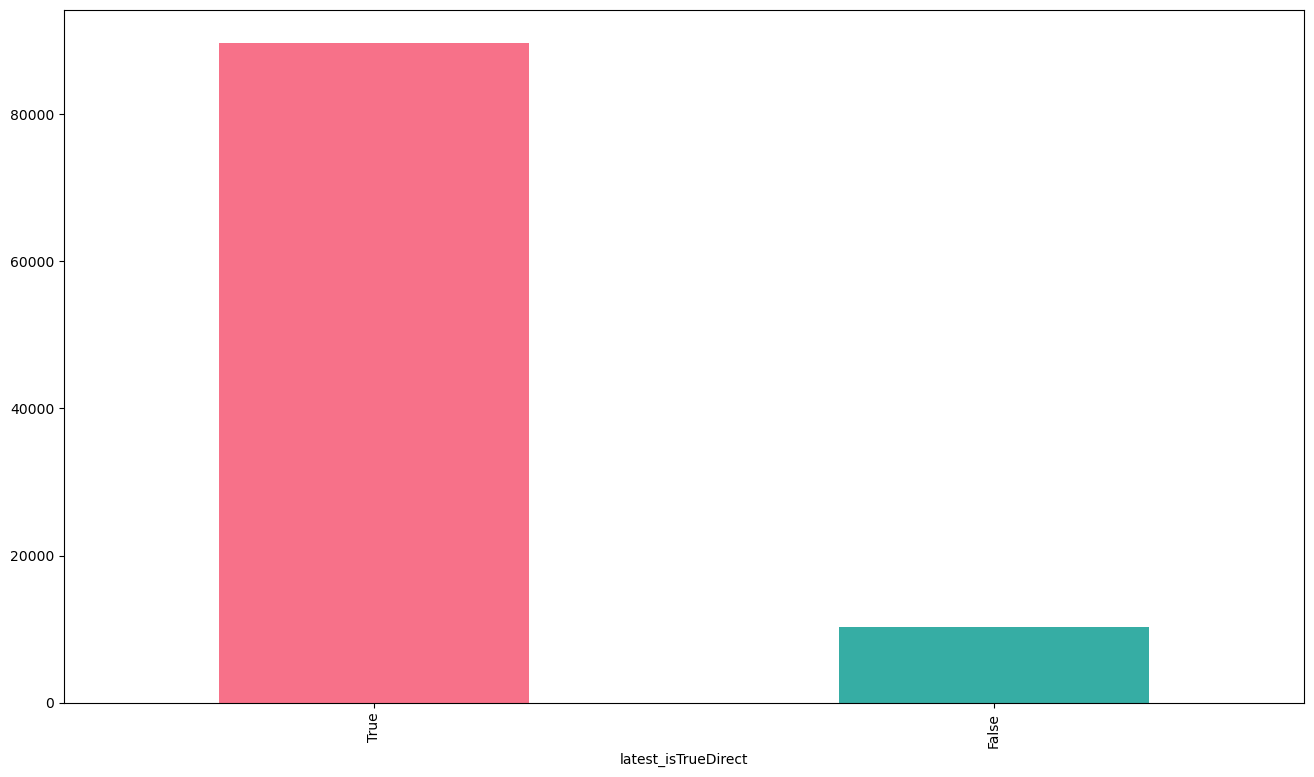

In [31]:
for i in bool_colum:
    plot_bool(i)

In [32]:
int_colum = data1.select_dtypes(include=['int64']).columns
int_colum

Index(['count_session', 'count_hit', 'historic_session',
       'historic_session_page', 'sessionQualityDim', 'last_visitId',
       'latest_visit_id', 'visitId_threshold', 'earliest_visit_id',
       'earliest_visit_number', 'latest_visit_number', 'avg_visit_time',
       'days_since_first_visit', 'num_interactions', 'time_on_site',
       'transactionRevenue', 'has_converted'],
      dtype='object')

In [33]:
def plot_int(column_name):
    data_1 = data[column_name].value_counts()
    plt.figure(figsize=(16,9))
    color = sns.color_palette('husl',len(data_1))
    data_1.plot(kind ='bar',color = color)
    plt.show()

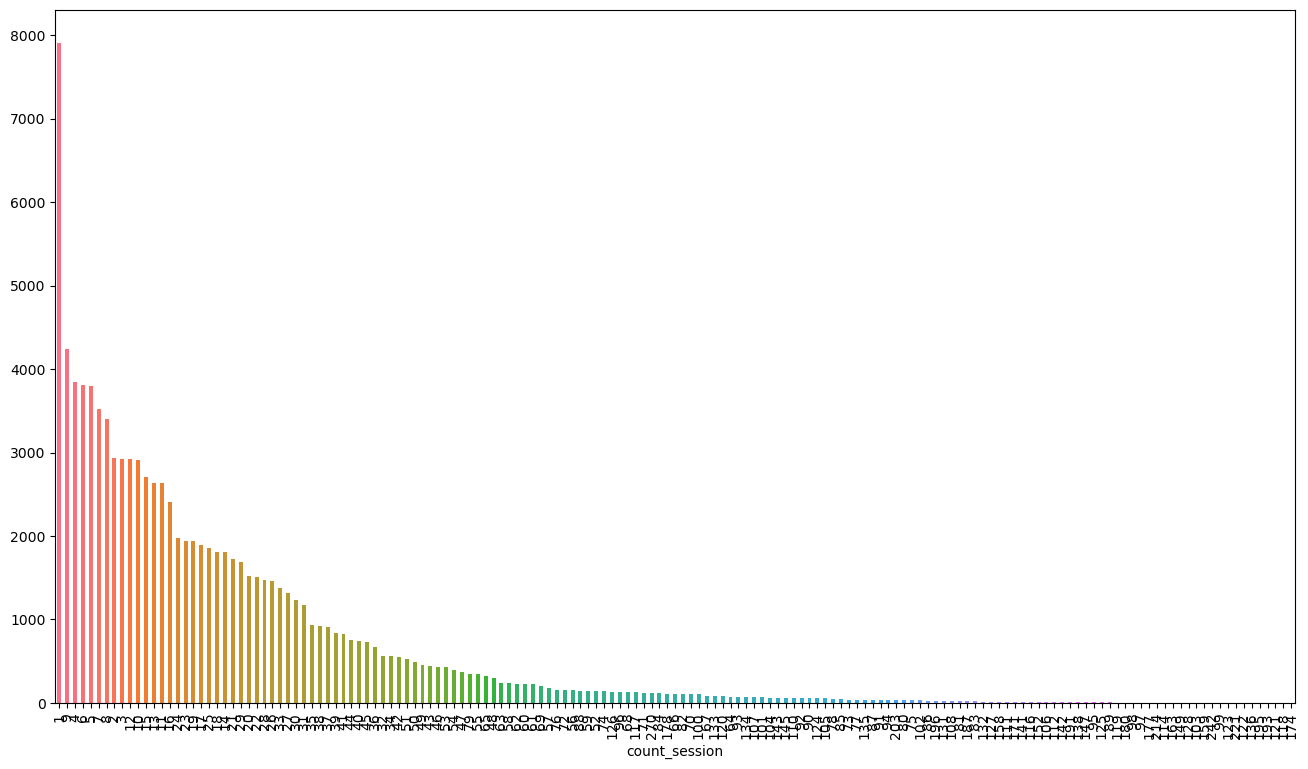

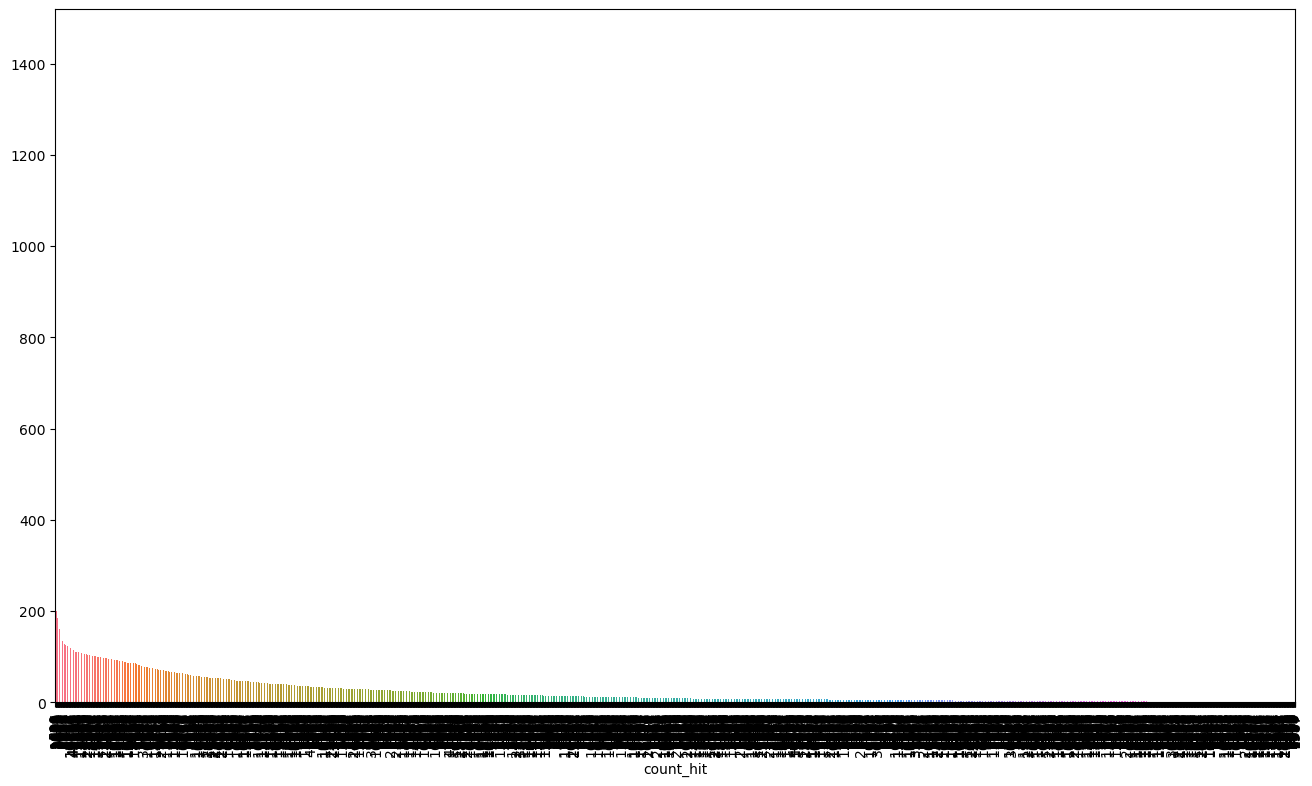

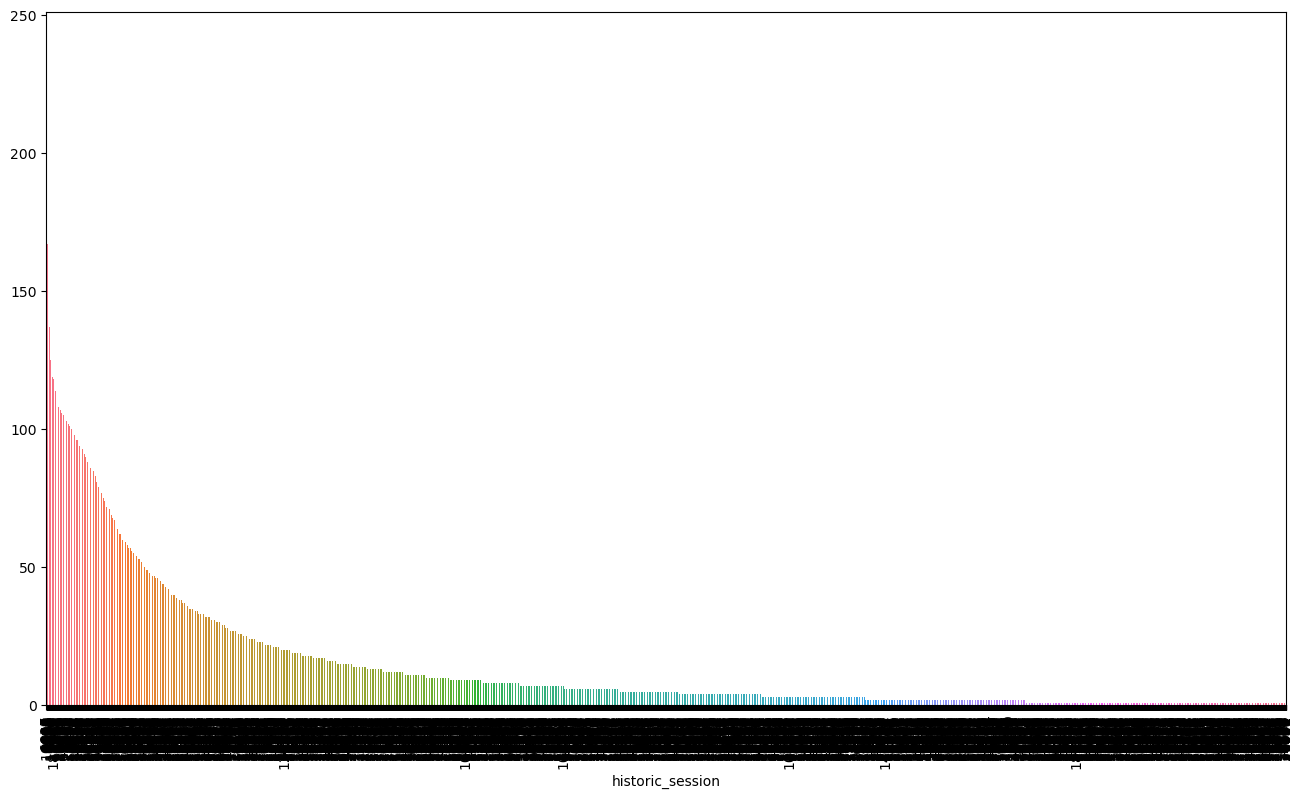

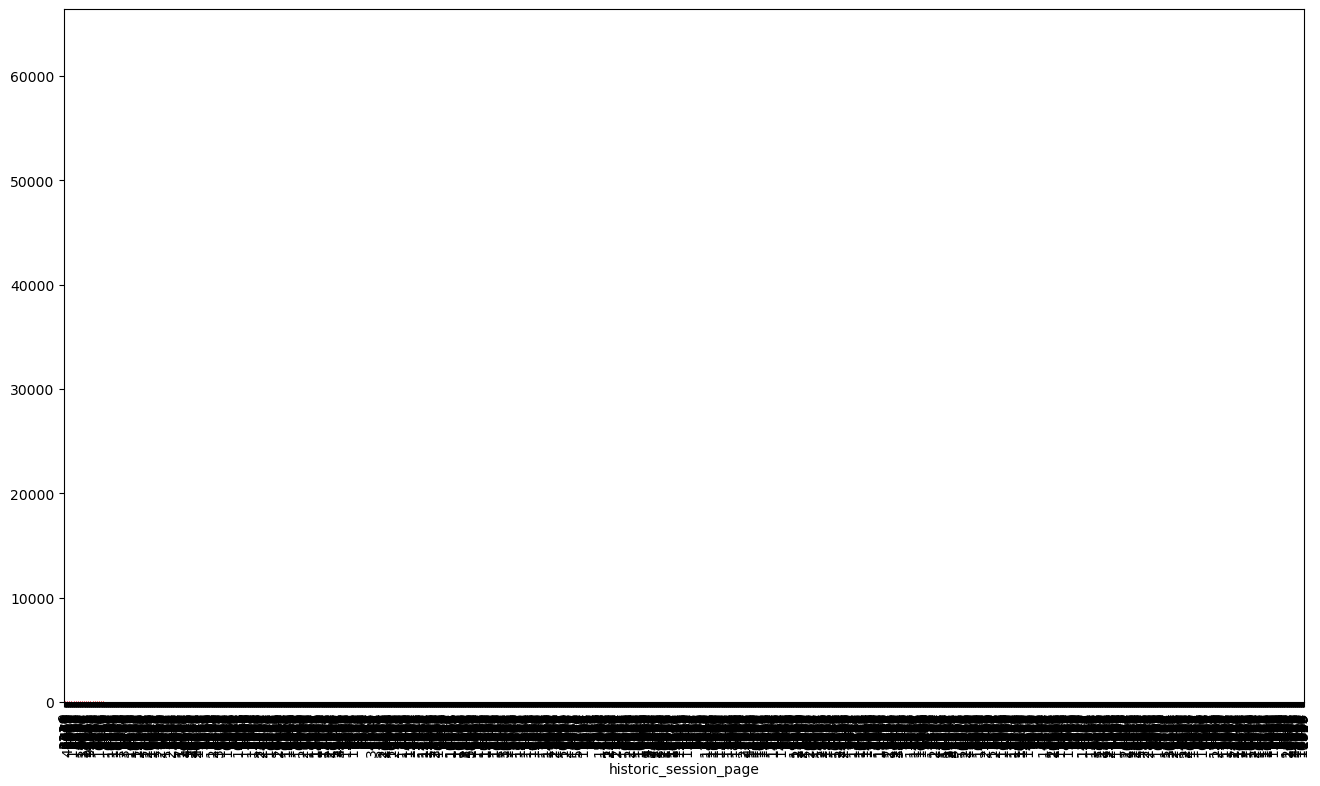

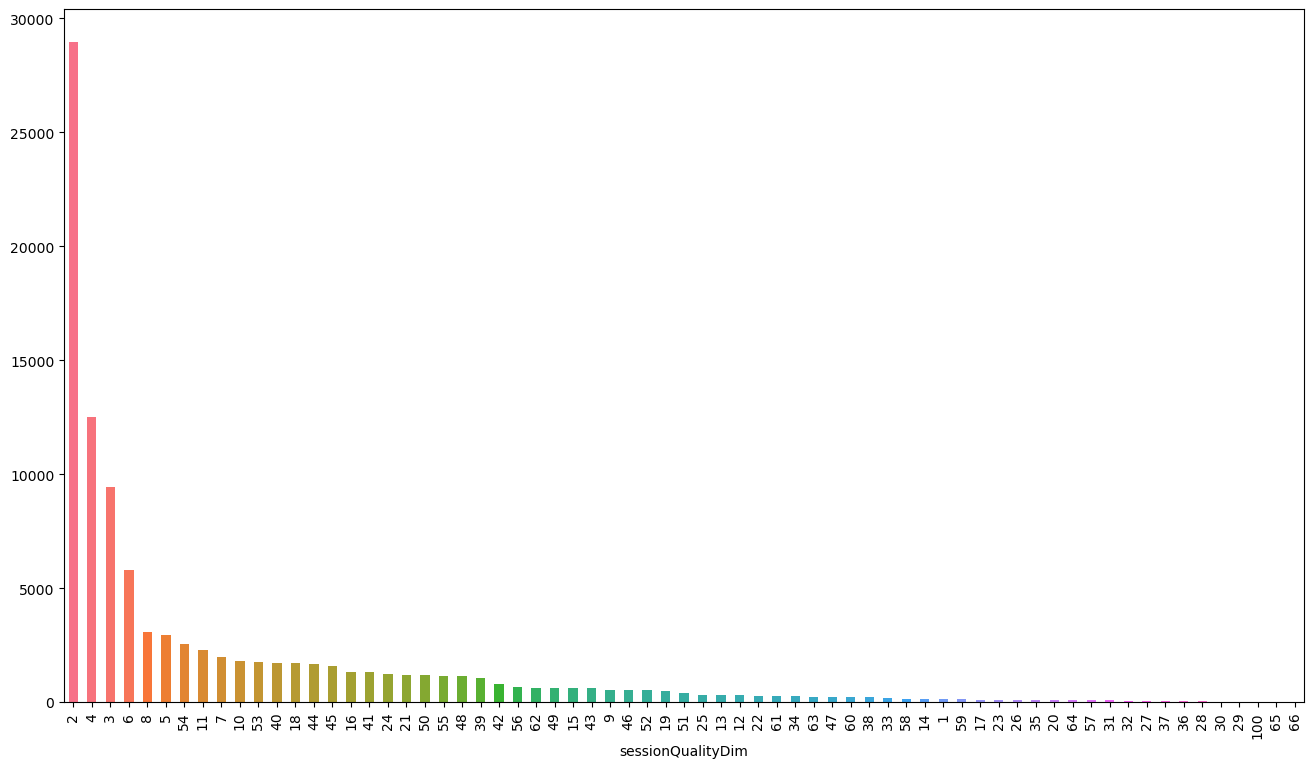

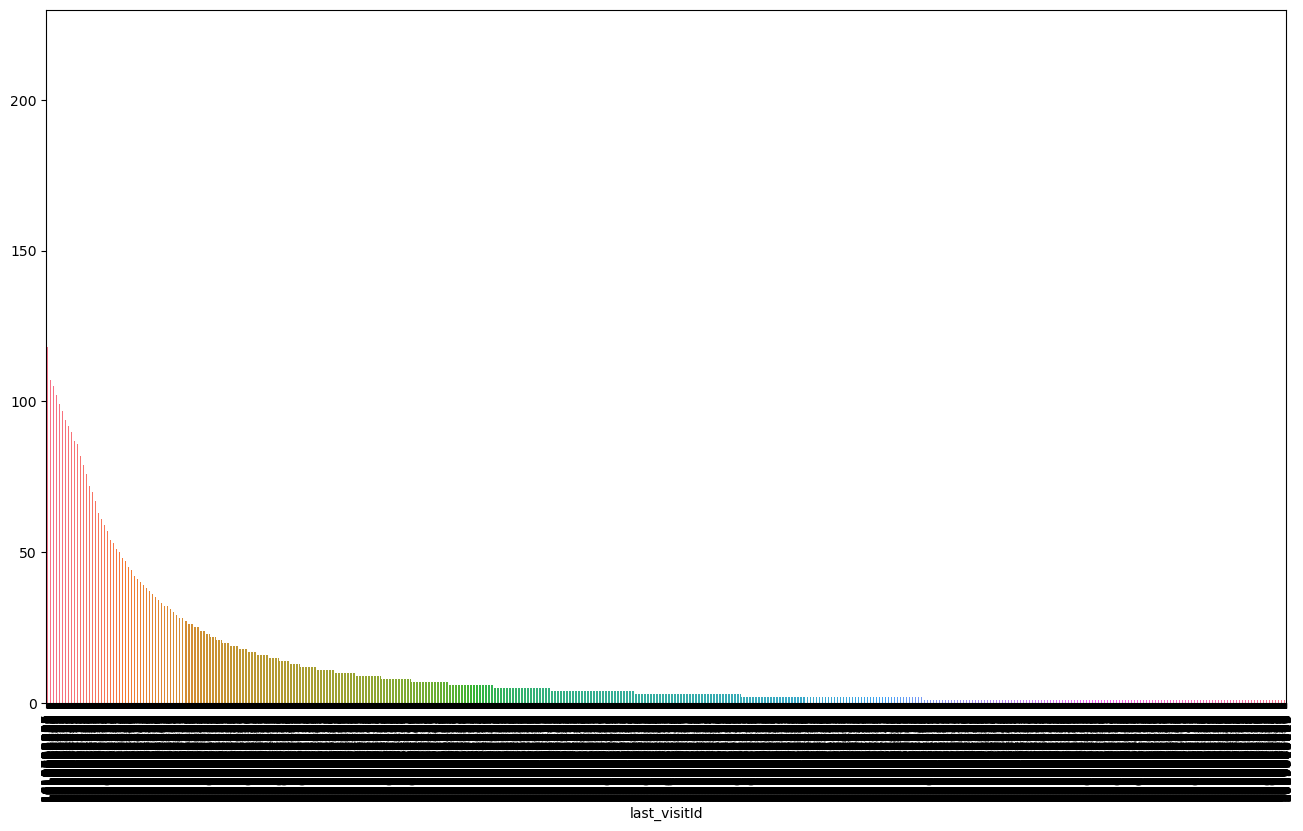

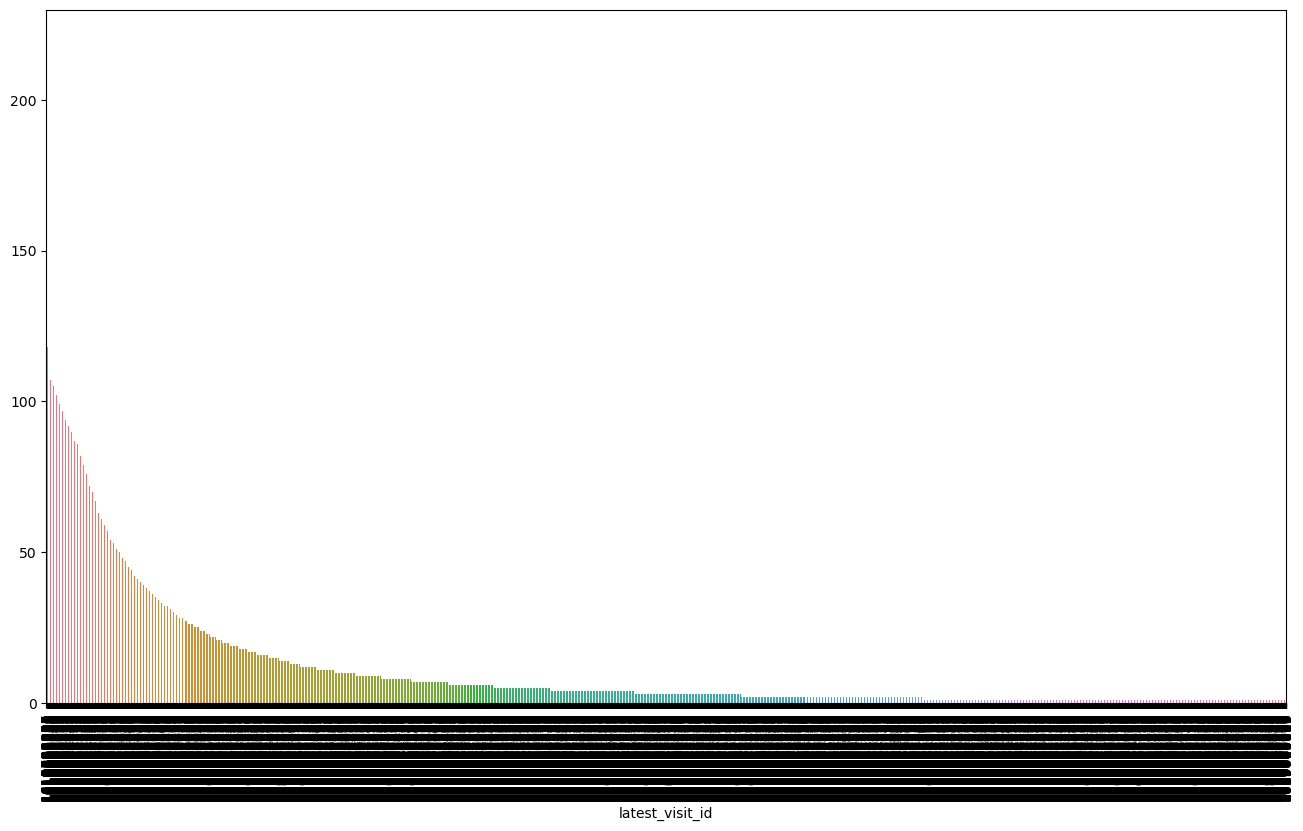

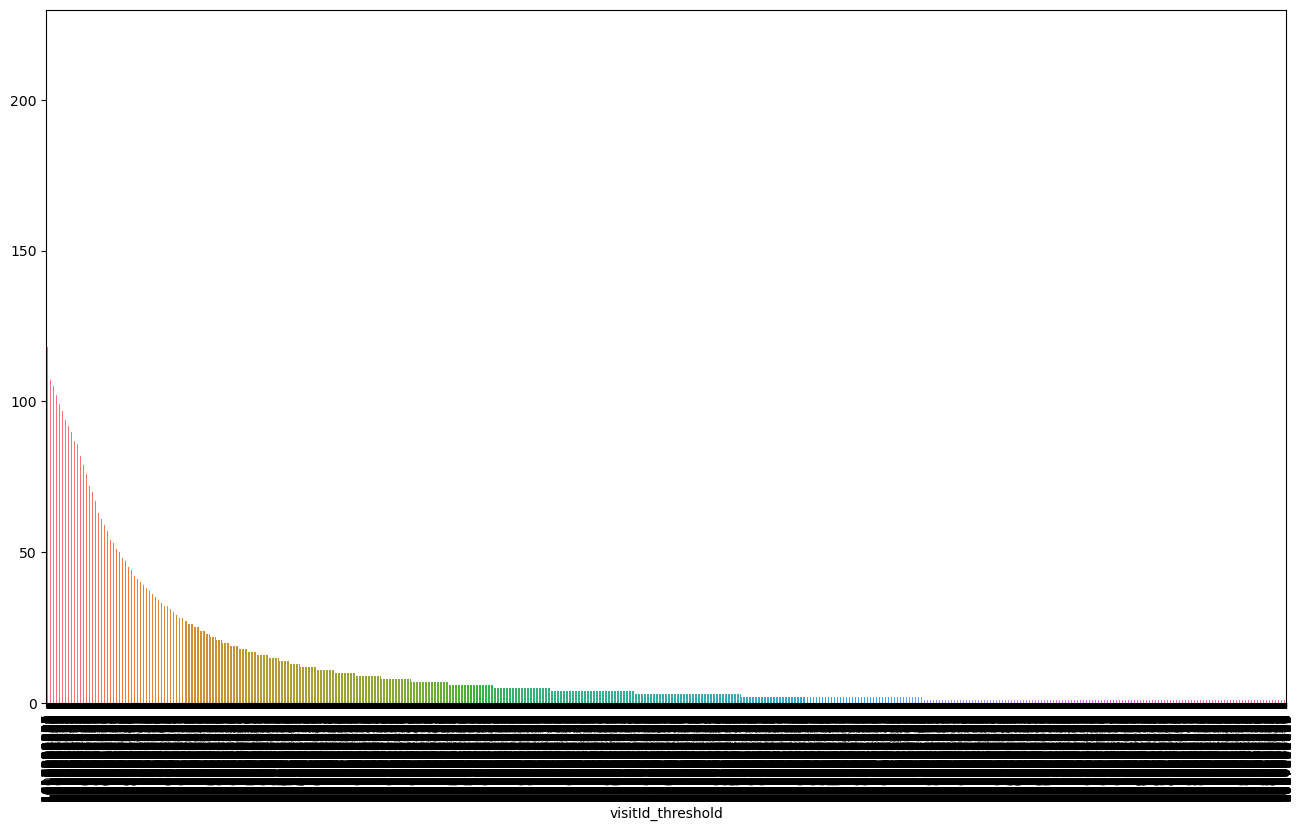

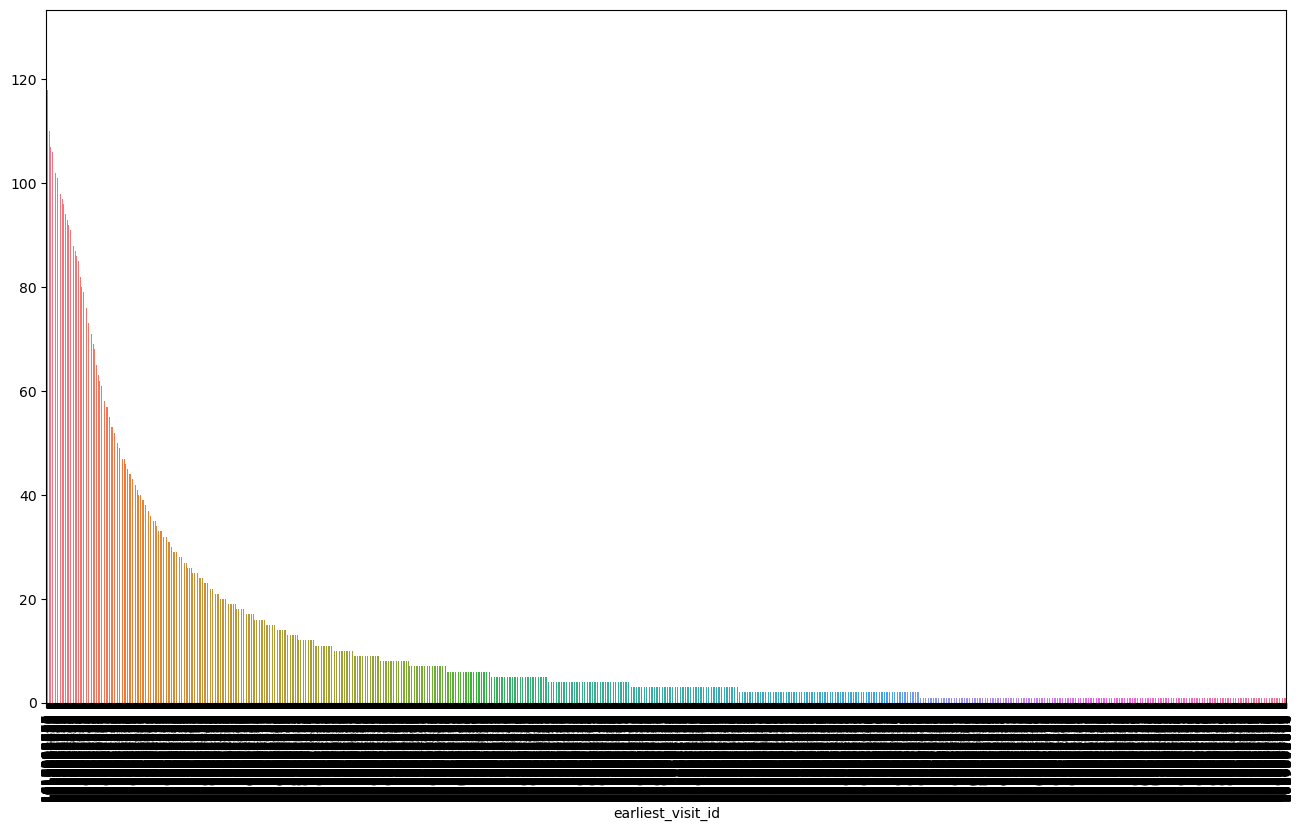

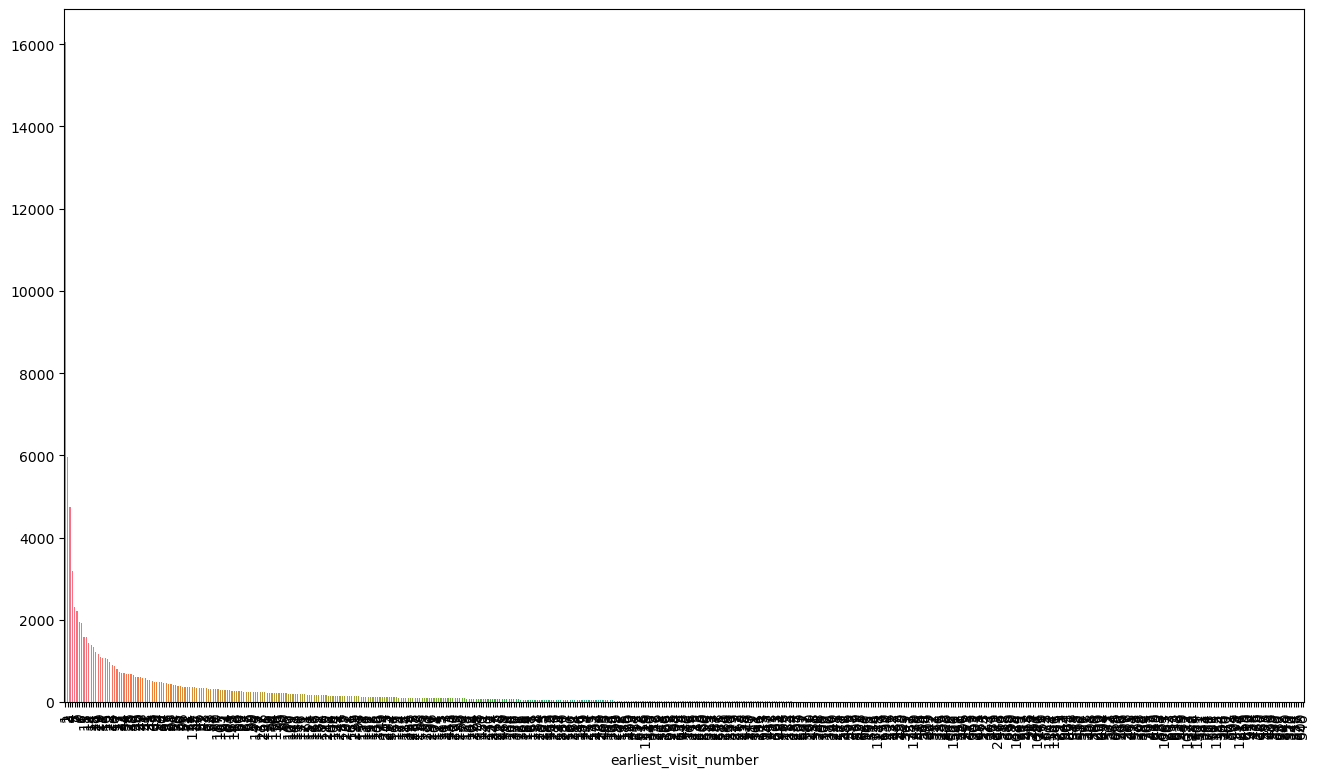

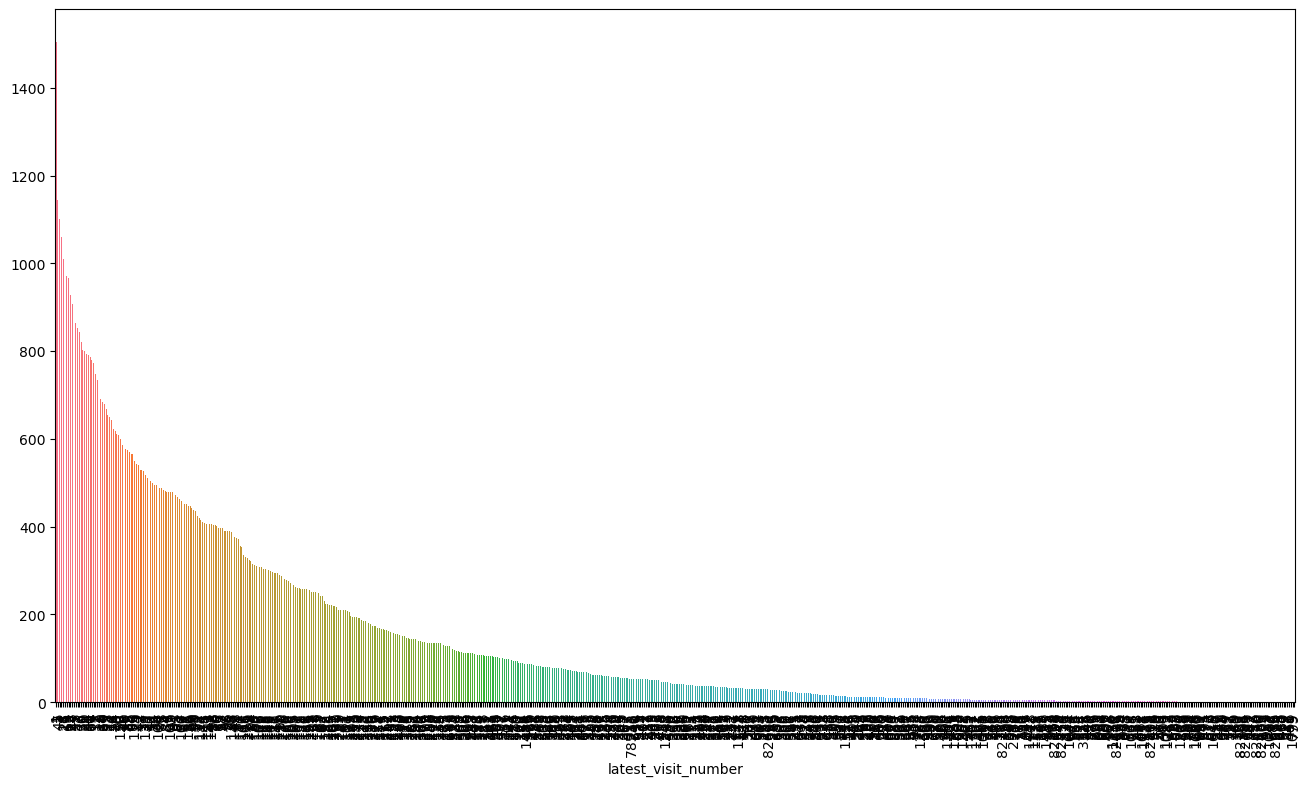

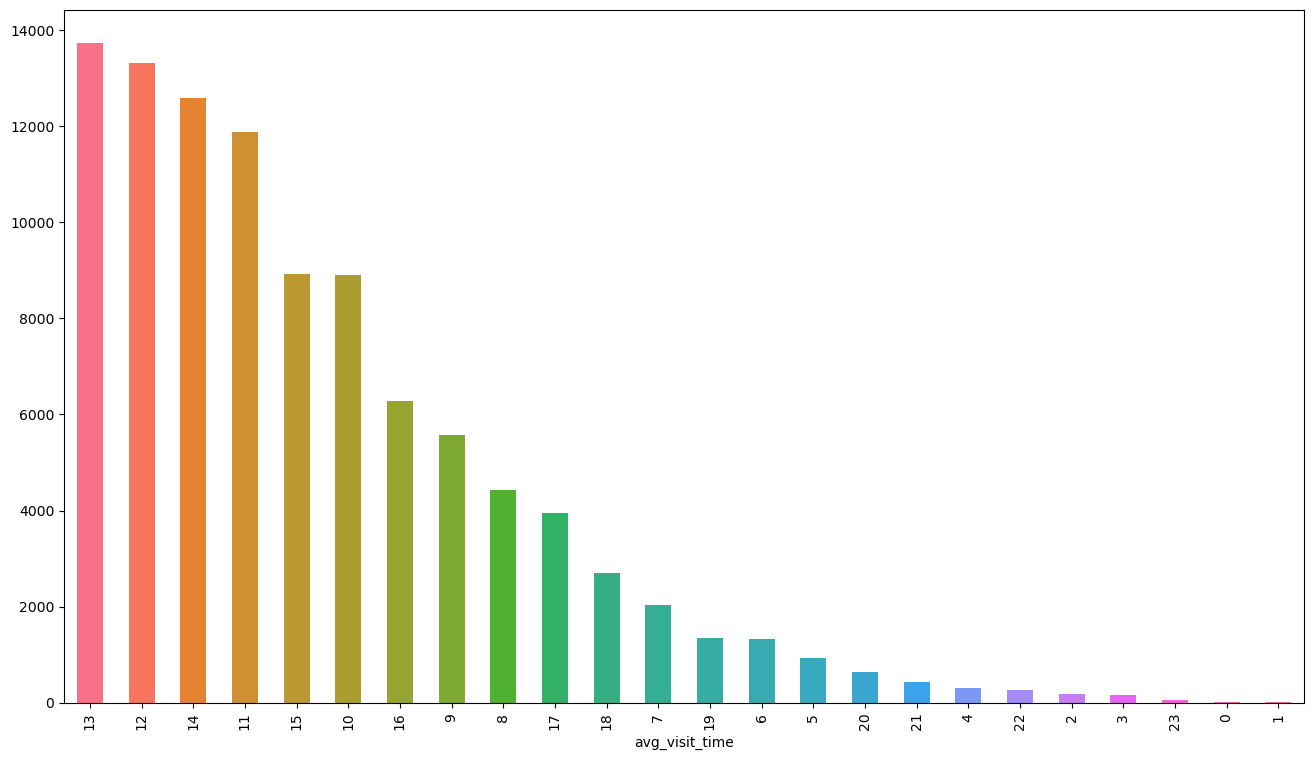

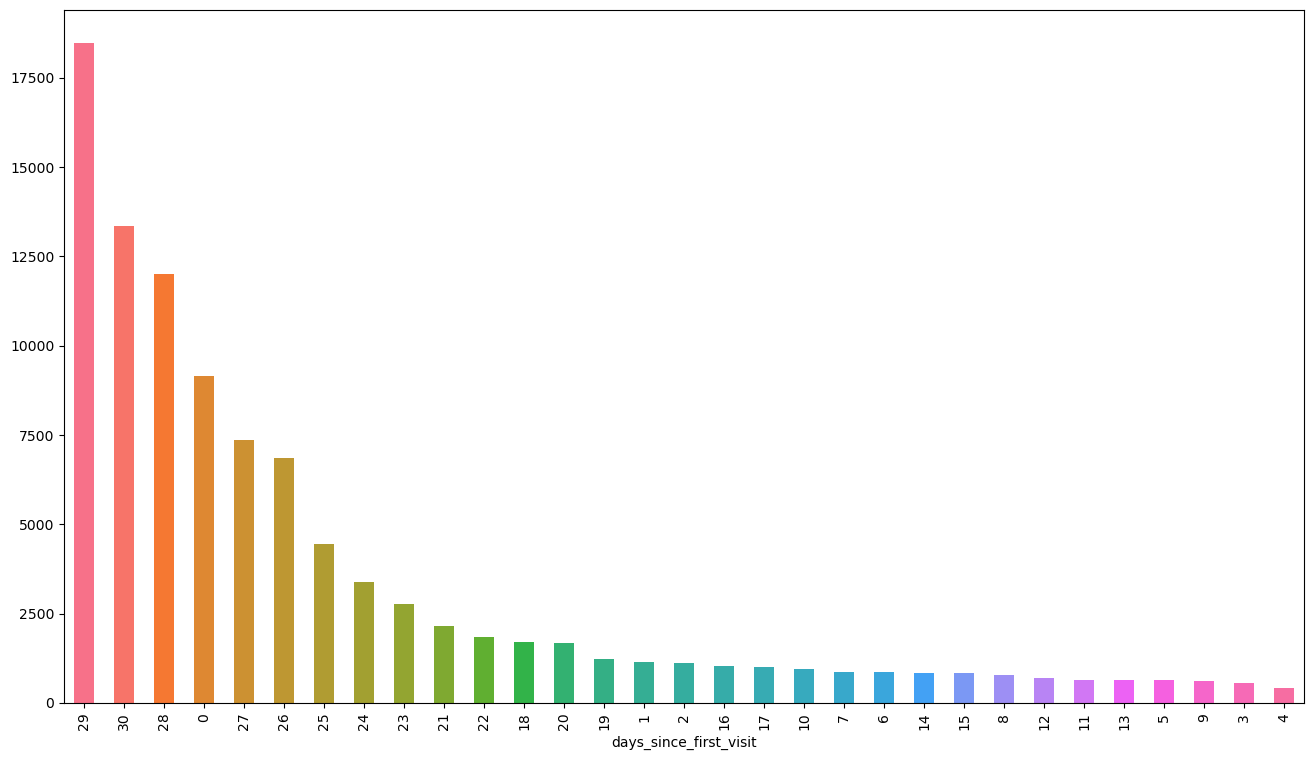

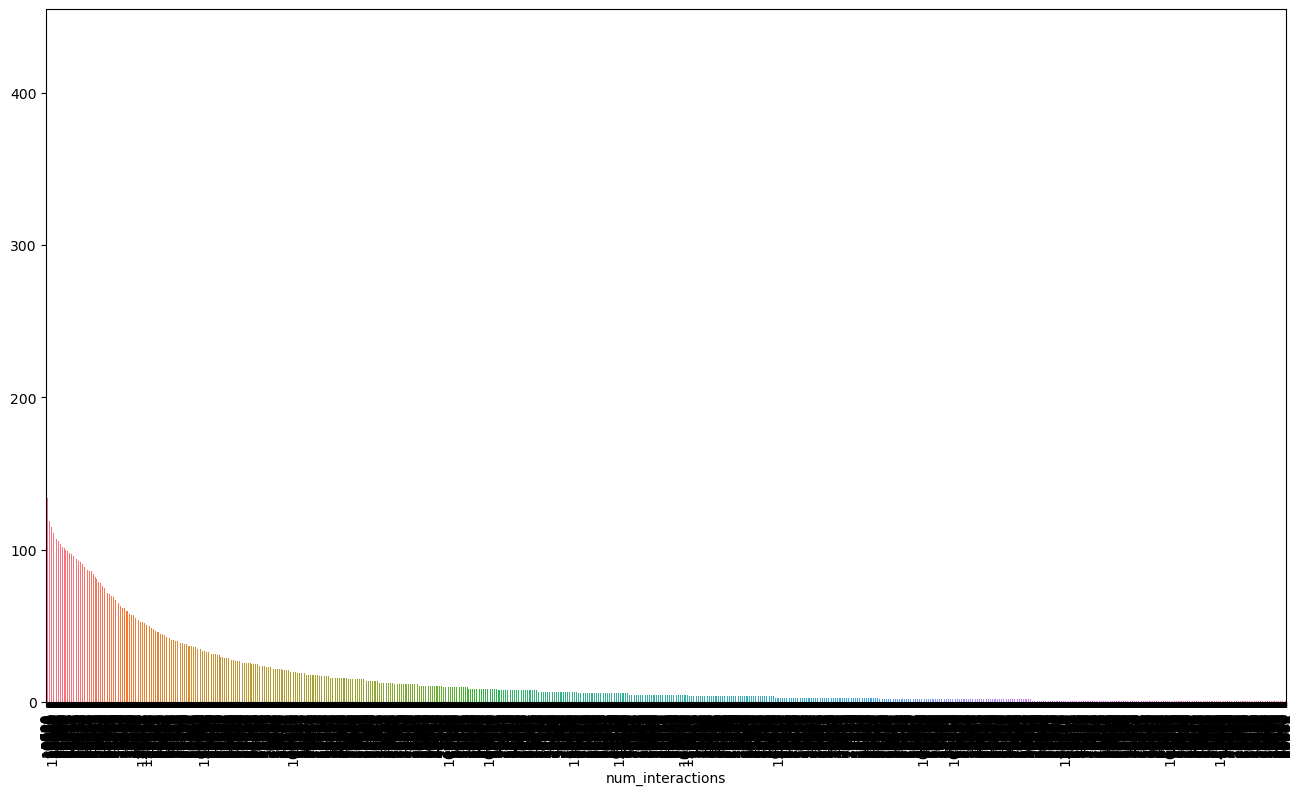

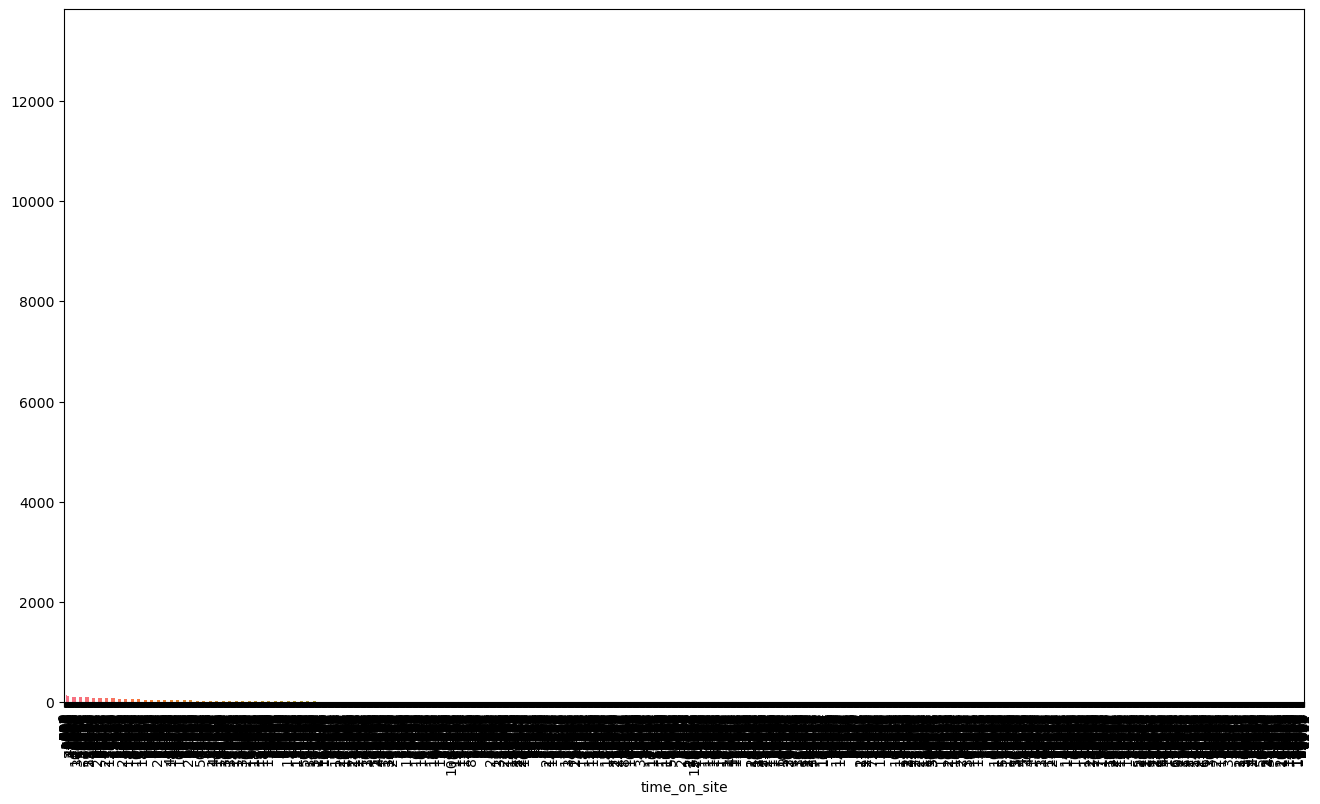

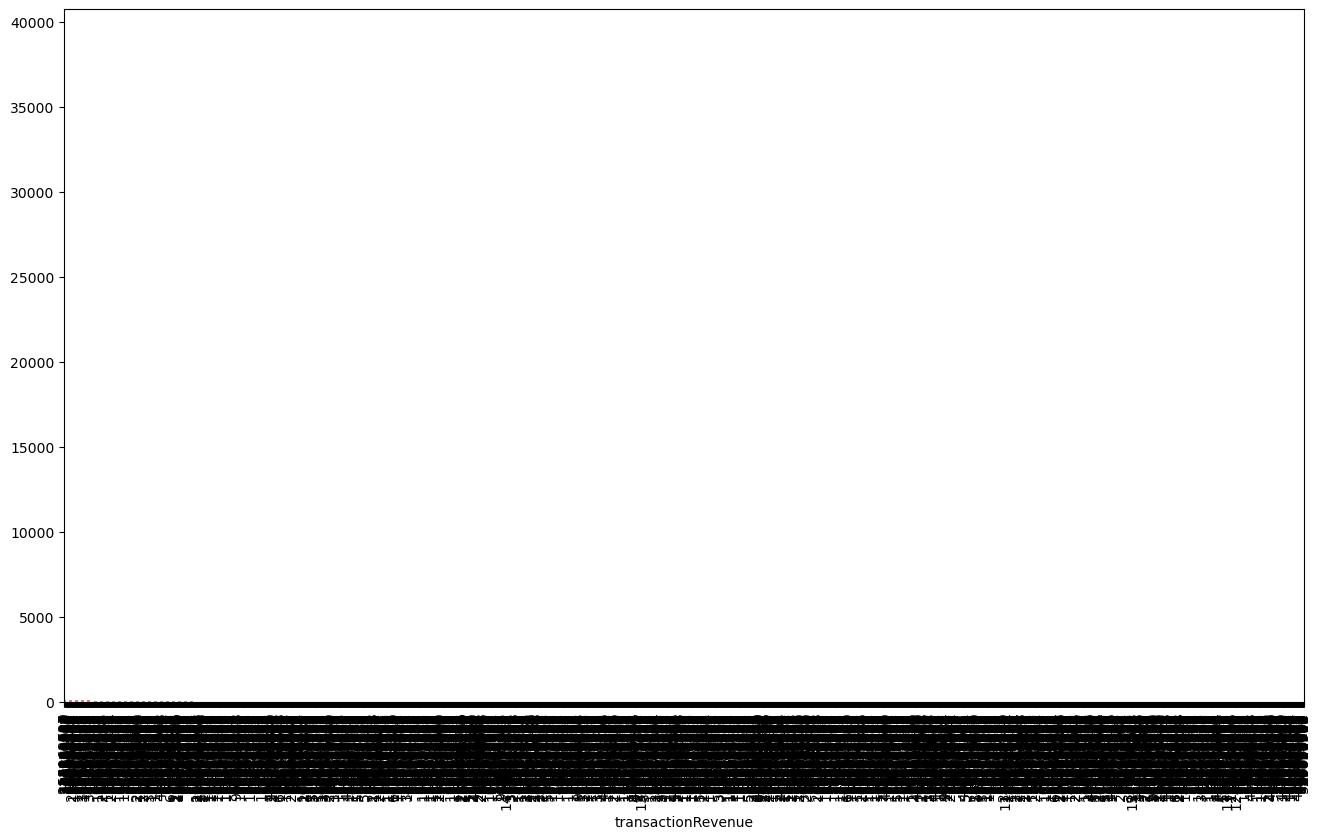

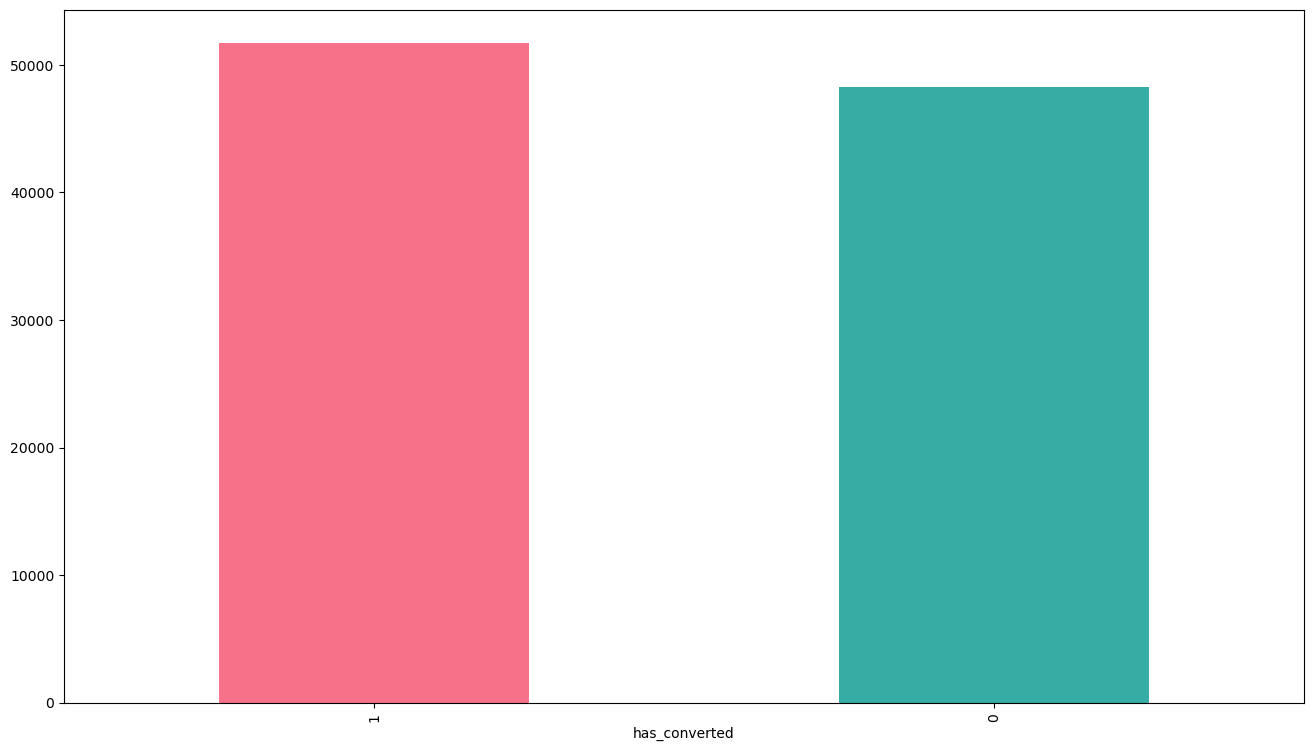

In [34]:
for i in int_colum:
    plot_int(i)

In [35]:
data1['transactionRevenue'].value_counts()

transactionRevenue
0            4431
27674925        3
31309982        2
80480220        2
14021426        2
             ... 
137696051       1
606162487       1
171290106       1
80276026        1
149151662       1
Name: count, Length: 4755, dtype: int64

In [36]:
obj_colum=data1.select_dtypes(include = 'object').columns

In [37]:
le = LabelEncoder()

for i in obj_colum:
    data1[i]=le.fit_transform(data1[i])

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype

In [38]:
data1

count_session  count_hit  channelGrouping  device_browser  \
0                  9       1194                0               5   
2                 28       1816                2               5   
3                  2        299                2               5   
16                 3        507                2               5   
20                 9       1037                2               5   
...              ...        ...              ...             ...   
99888              1        195                2               5   
99907             28       3071                2               5   
99908              7       1018                2               5   
99921              6        818                2               5   
99934             58      12340                2               5   

       device_operatingSystem  device_isMobile  device_deviceCategory  \
0                           1             True                      1   
2                           1             True                      1   
3                           1             True                      1   
16                          6             True                      1   
20                          1             True                      1   
...                       ...              ...                    ...   
99888                       6             True                      1   
99907                       1             True                      1   
99908                       6             True                      1   
99921                       1             True                      1   
99934                       6             True                      1   

       geoNetwork_region  geoNetwork_latitude  geoNetwork_longitude  ...  \
0                     71              25.3463               55.4209  ...   
2                      2              25.4052               55.5136  ...   
3                      1              24.4539               54.3773  ...   
16                     1              24.4539               54.3773  ...   
20                    25              25.2048               55.2708  ...   
...                  ...                  ...                   ...  ...   
99888                  1              24.4539               54.3773  ...   
99907                  1              24.4539               54.3773  ...   
99908                 25              25.2048               55.2708  ...   
99921                 25              25.2048               55.2708  ...   
99934                 25              25.2048               55.2708  ...   

       earliest_medium  earliest_keyword  latest_keyword  \
0                    3                 3               2   
2                    0                 3               1   
3                    7                89              96   
16                   7                88              95   
20                   9                 3               2   
...                ...               ...             ...   
99888                7                61              68   
99907                7                90              95   
99908                7                88              95   
99921                0                 3              31   
99934                7                89              96   

       earliest_isTrueDirect  latest_isTrueDirect  num_interactions  \
0                       True                 True              1900   
2                       True                 True              3843   
3                       True                 True               592   
16                      True                 True               507   
20                      True                 True              1674   
...                      ...                  ...               ...   
99888                   True                 True               471   
99907                   True                 True              4071   
99908                   True            

In [39]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   int64  
 1   count_hit               9207 non-null   int64  
 2   channelGrouping         9207 non-null   int32  
 3   device_browser          9207 non-null   int32  
 4   device_operatingSystem  9207 non-null   int32  
 5   device_isMobile         9207 non-null   bool   
 6   device_deviceCategory   9207 non-null   int32  
 7   geoNetwork_region       9207 non-null   int32  
 8   geoNetwork_latitude     9207 non-null   float64
 9   geoNetwork_longitude    9207 non-null   float64
 10  historic_session        9207 non-null   int64  
 11  historic_session_page   9207 non-null   int64  
 12  avg_session_time        9207 non-null   float64
 13  avg_session_time_page   9207 non-null   float64
 14  single_page_rate        9207 non-null   floa

In [40]:
corr_data = data1.corr()
corr_data

count_session  count_hit  channelGrouping  \
count_session                1.000000   0.856096        -0.002417   
count_hit                    0.856096   1.000000         0.013933   
channelGrouping             -0.002417   0.013933         1.000000   
device_browser               0.111947   0.115239        -0.069322   
device_operatingSystem       0.045597   0.234980         0.146864   
device_isMobile              0.137204   0.146535        -0.093071   
device_deviceCategory        0.132393   0.142723        -0.093838   
geoNetwork_region           -0.056737  -0.087080        -0.025498   
geoNetwork_latitude         -0.000628   0.002825         0.037036   
geoNetwork_longitude         0.003505   0.005077         0.010981   
historic_session             0.839461   0.710085        -0.004442   
historic_session_page        0.238499   0.065334         0.030278   
avg_session_time            -0.097585  -0.065550         0.034710   
avg_session_time_page       -0.165082  -0.169826         0.068323   
single_page_rate             0.191493   0.214996        -0.090145   
sessionQualityDim           -0.100385  -0.138287         0.008953   
last_visitId                 0.203082   0.175670        -0.033074   
latest_visit_id              0.203082   0.175670        -0.033074   
visitId_threshold            0.203082   0.175670        -0.033074   
earliest_visit_id           -0.050703  -0.029274        -0.016792   
earliest_visit_number        0.239890   0.111591        -0.024194   
latest_visit_number          0.067875   0.035356        -0.022059   
time_earliest_visit         -0.000818   0.011861        -0.008726   
time_latest_visit            0.088479   0.086126        -0.003909   
avg_visit_time              -0.019165   0.000390        -0.014823   
days_since_first_visit       0.419399   0.339041        -0.027898   
visits_per_day               0.598173   0.752488         0.038934   
earliest_source              0.059223  -0.001779        -0.003815   
latest_source                0.002415  -0.010475        -0.089467   
earliest_medium              0.057011  -0.024851        -0.024249   
earliest_keyword            -0.036634   0.023835         0.237873   
latest_keyword              -0.010616   0.005351         0.348827   
earliest_isTrueDirect        0.140833   0.158377        -0.040494   
latest_isTrueDirect          0.118986   0.129847        -0.035887   
num_interactions             0.760016   0.871843         0.025076   
time_on_site                 0.153830   0.093644         0.002482   
transactionRevenue           0.091560   0.088279         0.006980   
products_array               0.070176  -0.029933        -0.120481   
has_converted                0.100391   0.228865         0.092067   

                        device_browser  device_operatingSystem  \
count_session                 0.111947                0.045597   
count_hit                     0.115239                0.234980   
channelGrouping              -0.069322                0.146864   
device_browser                1.000000               -0.069150   
device_operatingSystem       -0.069150                1.000000   
device_isMobile               0.749035               -0.151744   
device_deviceCategory         0.723994               -0.146340   
geoNetwork_region             0.006916               -0.056514   
geoNetwork_latitude          -0.003827               -0.008570   
geoNetwork_longitude          0.004427               -0.007993   
historic_session              0.032895               -0.096139   
historic_session_page        -0.178924               -0.121916   
avg_session_time             -0.304936               -0.127002   
avg_session_time_page        -0.427487                0.003637   
single_page_rate              0.487469                0.005735   
sessionQualityDim            -0.331954               -0.269492   
last_visitId                  0.079693               -0.113269   
latest_visit_id               0.079693               -0.113269   
visitId_t

In [41]:
hig_co = []

for i in range(len(corr_data.columns)):
    for j in range(i):
        corr = corr_data.iloc[i,j]
        c_name  = corr_data.columns[i]
        if abs(corr) > 0.9:
            hig_co.append(c_name)

In [42]:
hig_co

['device_deviceCategory',
 'latest_visit_id',
 'visitId_threshold',
 'visitId_threshold']

In [43]:
data2 = data1.drop(['device_deviceCategory','latest_visit_id','visitId_threshold','last_visitId'],axis = 1)

In [44]:
corr_data = data2.corr()


<Axes: >

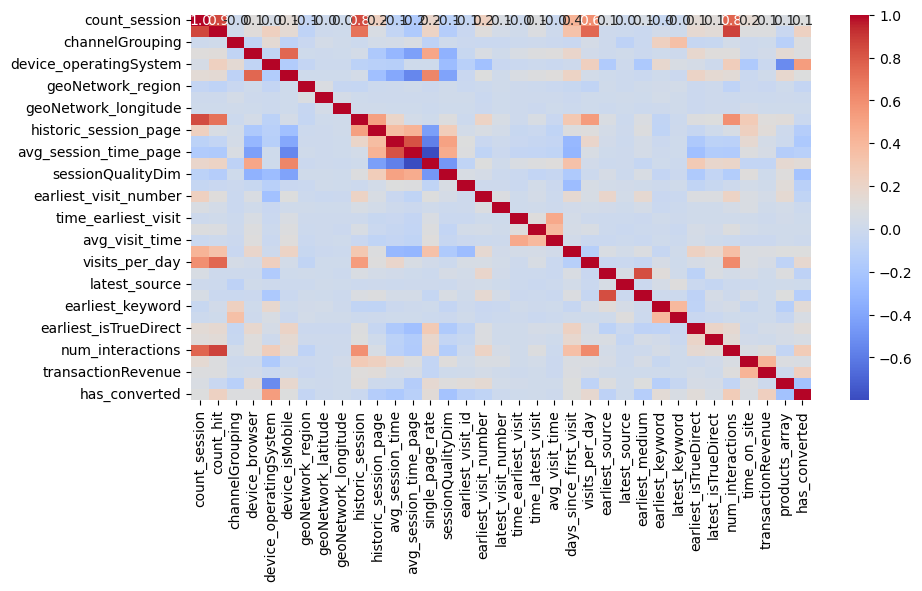

In [45]:
corr_data = data2.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_data,cmap='coolwarm',annot=True,fmt = '.1f')

In [46]:
#fig, a = plt.subplots(figsize=(15,6))

#sns.histplot(data=data,x= "MAG",color="red")
#sns.histplot(data=data,x= "NEWS",color="green")
#plt.show()

In [47]:
#data2 = data.head(500)
#fig = px.scatter_mapbox(
    #data2,
    #lat ='geoNetwork_latitude',
    #lon ='geoNetwork_longitude',
    
#)
#fig.update_layout(
#mapbox_style = 'carto positron',
#mapbox_zoom = 10)

#fig.show()

In [48]:
#fig = px.scatter_geo(
   # data,
    #lat ='geoNetwork_latitude',
     #lon ='geoNetwork_longitude',
    #projection= 'natural.earth'
    
#)
#fig.show()

In [49]:
### states analysis

In [50]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   int64  
 1   count_hit               9207 non-null   int64  
 2   channelGrouping         9207 non-null   int32  
 3   device_browser          9207 non-null   int32  
 4   device_operatingSystem  9207 non-null   int32  
 5   device_isMobile         9207 non-null   bool   
 6   geoNetwork_region       9207 non-null   int32  
 7   geoNetwork_latitude     9207 non-null   float64
 8   geoNetwork_longitude    9207 non-null   float64
 9   historic_session        9207 non-null   int64  
 10  historic_session_page   9207 non-null   int64  
 11  avg_session_time        9207 non-null   float64
 12  avg_session_time_page   9207 non-null   float64
 13  single_page_rate        9207 non-null   float64
 14  sessionQualityDim       9207 non-null   int6

In [51]:
### stats analysis

In [52]:
for i in data2.columns:
    for j in data2.columns:
        _, p_value = stats.ttest_ind(data2[i],data2[j])
        
        print(f'{i},{j},probability:,{p_value}')

count_session,count_session,probability:,1.0
count_session,count_hit,probability:,0.0
count_session,channelGrouping,probability:,0.0
count_session,device_browser,probability:,0.0
count_session,device_operatingSystem,probability:,0.0
count_session,device_isMobile,probability:,0.0
count_session,geoNetwork_region,probability:,2.456617273213735e-08
count_session,geoNetwork_latitude,probability:,1.307710180828008e-109
count_session,geoNetwork_longitude,probability:,0.0
count_session,historic_session,probability:,0.0
count_session,historic_session_page,probability:,0.0
count_session,avg_session_time,probability:,0.0
count_session,avg_session_time_page,probability:,2.0043952885120716e-230
count_session,single_page_rate,probability:,0.0
count_session,sessionQualityDim,probability:,1.7579868872800407e-202
count_session,earliest_visit_id,probability:,0.0
count_session,earliest_visit_number,probability:,0.0
count_session,latest_visit_number,probability:,7.428035080722595e-12
count_session,time_ea

device_isMobile,time_latest_visit,probability:,0.0
device_isMobile,avg_visit_time,probability:,0.0
device_isMobile,days_since_first_visit,probability:,0.0
device_isMobile,visits_per_day,probability:,0.0
device_isMobile,earliest_source,probability:,0.0
device_isMobile,latest_source,probability:,0.0
device_isMobile,earliest_medium,probability:,0.0
device_isMobile,earliest_keyword,probability:,0.0
device_isMobile,latest_keyword,probability:,0.0
device_isMobile,earliest_isTrueDirect,probability:,5.572977082866613e-60
device_isMobile,latest_isTrueDirect,probability:,6.804689393270143e-85
device_isMobile,num_interactions,probability:,0.0
device_isMobile,time_on_site,probability:,2.889360939895592e-200
device_isMobile,transactionRevenue,probability:,8.240431283462074e-163
device_isMobile,products_array,probability:,0.0
device_isMobile,has_converted,probability:,0.0
geoNetwork_region,count_session,probability:,2.456617273213735e-08
geoNetwork_region,count_hit,probability:,0.0
geoNetwork_region

avg_session_time,earliest_isTrueDirect,probability:,0.0
avg_session_time,latest_isTrueDirect,probability:,0.0
avg_session_time,num_interactions,probability:,0.0
avg_session_time,time_on_site,probability:,6.165141199381476e-189
avg_session_time,transactionRevenue,probability:,8.255178738379748e-163
avg_session_time,products_array,probability:,0.0
avg_session_time,has_converted,probability:,0.0
avg_session_time_page,count_session,probability:,2.0043952885120716e-230
avg_session_time_page,count_hit,probability:,0.0
avg_session_time_page,channelGrouping,probability:,1.3652897224078382e-289
avg_session_time_page,device_browser,probability:,1.6962482518890685e-279
avg_session_time_page,device_operatingSystem,probability:,1.2230986456699114e-284
avg_session_time_page,device_isMobile,probability:,8.751490221833172e-293
avg_session_time_page,geoNetwork_region,probability:,2.0950487365007212e-225
avg_session_time_page,geoNetwork_latitude,probability:,7.35099053121007e-216
avg_session_time_page,g

latest_visit_number,earliest_medium,probability:,3.774121074828849e-13
latest_visit_number,earliest_keyword,probability:,7.970381302074091e-09
latest_visit_number,latest_keyword,probability:,1.9459121458583148e-06
latest_visit_number,earliest_isTrueDirect,probability:,8.340895258240641e-14
latest_visit_number,latest_isTrueDirect,probability:,8.306279264714857e-14
latest_visit_number,num_interactions,probability:,0.0
latest_visit_number,time_on_site,probability:,5.48661110620973e-194
latest_visit_number,transactionRevenue,probability:,8.247688530080754e-163
latest_visit_number,products_array,probability:,0.0
latest_visit_number,has_converted,probability:,7.465969995995282e-14
time_earliest_visit,count_session,probability:,2.357765898980756e-233
time_earliest_visit,count_hit,probability:,0.0
time_earliest_visit,channelGrouping,probability:,0.0
time_earliest_visit,device_browser,probability:,0.0
time_earliest_visit,device_operatingSystem,probability:,0.0
time_earliest_visit,device_isMobil

earliest_source,time_latest_visit,probability:,0.0
earliest_source,avg_visit_time,probability:,0.0
earliest_source,days_since_first_visit,probability:,0.010798108537612188
earliest_source,visits_per_day,probability:,0.0
earliest_source,earliest_source,probability:,1.0
earliest_source,latest_source,probability:,0.0
earliest_source,earliest_medium,probability:,0.0
earliest_source,earliest_keyword,probability:,0.0
earliest_source,latest_keyword,probability:,0.0
earliest_source,earliest_isTrueDirect,probability:,0.0
earliest_source,latest_isTrueDirect,probability:,0.0
earliest_source,num_interactions,probability:,0.0
earliest_source,time_on_site,probability:,9.707607628220316e-200
earliest_source,transactionRevenue,probability:,8.241107882962464e-163
earliest_source,products_array,probability:,0.0
earliest_source,has_converted,probability:,0.0
latest_source,count_session,probability:,0.0
latest_source,count_hit,probability:,0.0
latest_source,channelGrouping,probability:,0.0
latest_source,d

latest_isTrueDirect,visits_per_day,probability:,0.0
latest_isTrueDirect,earliest_source,probability:,0.0
latest_isTrueDirect,latest_source,probability:,0.0
latest_isTrueDirect,earliest_medium,probability:,0.0
latest_isTrueDirect,earliest_keyword,probability:,0.0
latest_isTrueDirect,latest_keyword,probability:,0.0
latest_isTrueDirect,earliest_isTrueDirect,probability:,0.0009576792328371309
latest_isTrueDirect,latest_isTrueDirect,probability:,1.0
latest_isTrueDirect,num_interactions,probability:,0.0
latest_isTrueDirect,time_on_site,probability:,2.8750619795528526e-200
latest_isTrueDirect,transactionRevenue,probability:,8.240428515417309e-163
latest_isTrueDirect,products_array,probability:,0.0
latest_isTrueDirect,has_converted,probability:,0.0
num_interactions,count_session,probability:,0.0
num_interactions,count_hit,probability:,0.0
num_interactions,channelGrouping,probability:,0.0
num_interactions,device_browser,probability:,0.0
num_interactions,device_operatingSystem,probability:,0.0
n

# outlier detection

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

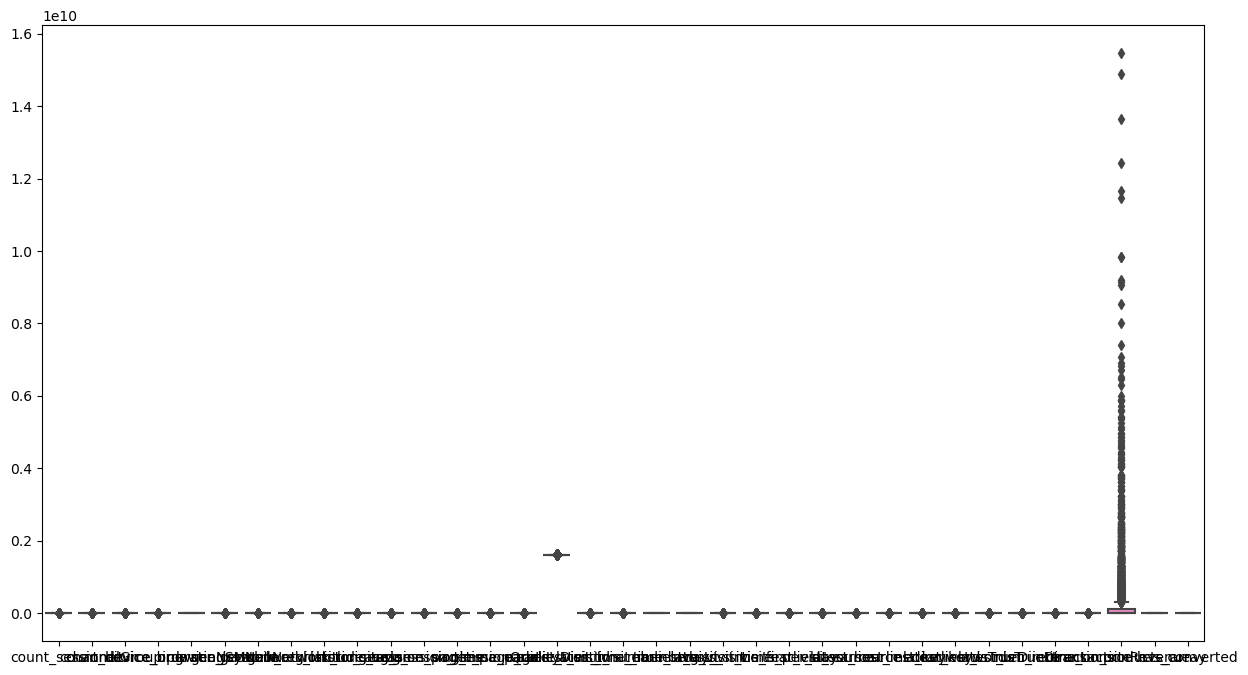

In [53]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data2)
plt.show()

In [54]:
data3= data2.copy()
#data3.replace([np.inf, -np.inf], np.nan, inplace=True)
#data3.interpolate(inplace=True)
#data3['transactionRevenue'] = data3['historic_session_page'].replace(0, data3[data3['transactionRevenue'] != 0]['transactionRevenue'].mean())
data3['transactionRevenue'] = data3['transactionRevenue'].replace(0, data3[data3['transactionRevenue'] != 0]['transactionRevenue'].mean())
data3['transactionRevenue'] =1/ data3['transactionRevenue']

In [55]:
data3

count_session  count_hit  channelGrouping  device_browser  \
0                  9       1194                0               5   
2                 28       1816                2               5   
3                  2        299                2               5   
16                 3        507                2               5   
20                 9       1037                2               5   
...              ...        ...              ...             ...   
99888              1        195                2               5   
99907             28       3071                2               5   
99908              7       1018                2               5   
99921              6        818                2               5   
99934             58      12340                2               5   

       device_operatingSystem  device_isMobile  geoNetwork_region  \
0                           1             True                 71   
2                           1             True                  2   
3                           1             True                  1   
16                          6             True                  1   
20                          1             True                 25   
...                       ...              ...                ...   
99888                       6             True                  1   
99907                       1             True                  1   
99908                       6             True                 25   
99921                       1             True                 25   
99934                       6             True                 25   

       geoNetwork_latitude  geoNetwork_longitude  historic_session  ...  \
0                  25.3463               55.4209              6504  ...   
2                  25.4052               55.5136             12466  ...   
3                  24.4539               54.3773              1575  ...   
16                 24.4539               54.3773              1000  ...   
20                 25.2048               55.2708              3659  ...   
...                    ...                   ...               ...  ...   
99888              24.4539               54.3773               166  ...   
99907              24.4539               54.3773             15860  ...   
99908              25.2048               55.2708               859  ...   
99921              25.2048               55.2708              1772  ...   
99934              25.2048               55.2708             28082  ...   

       earliest_medium  earliest_keyword  latest_keyword  \
0                    3                 3               2   
2                    0                 3               1   
3                    7                89              96   
16                   7                88              95   
20                   9                 3               2   
...                ...               ...             ...   
99888                7                61              68   
99907                7                90              95   
99908                7                88              95   
99921                0                 3              31   
99934                7                89              96   

       earliest_isTrueDirect  latest_isTrueDirect  num_interactions  \
0                       True                 True              1900   
2                       True                 True              3843   
3                       True                 True               592   
16                      True                 True               507   
20                      True                 True              1674   
...                      ...                  ...               ...   
99888                   True                 True               471   
99907                   True                 True              4071   
99908                   True                 True              7258   
99921                   True 

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

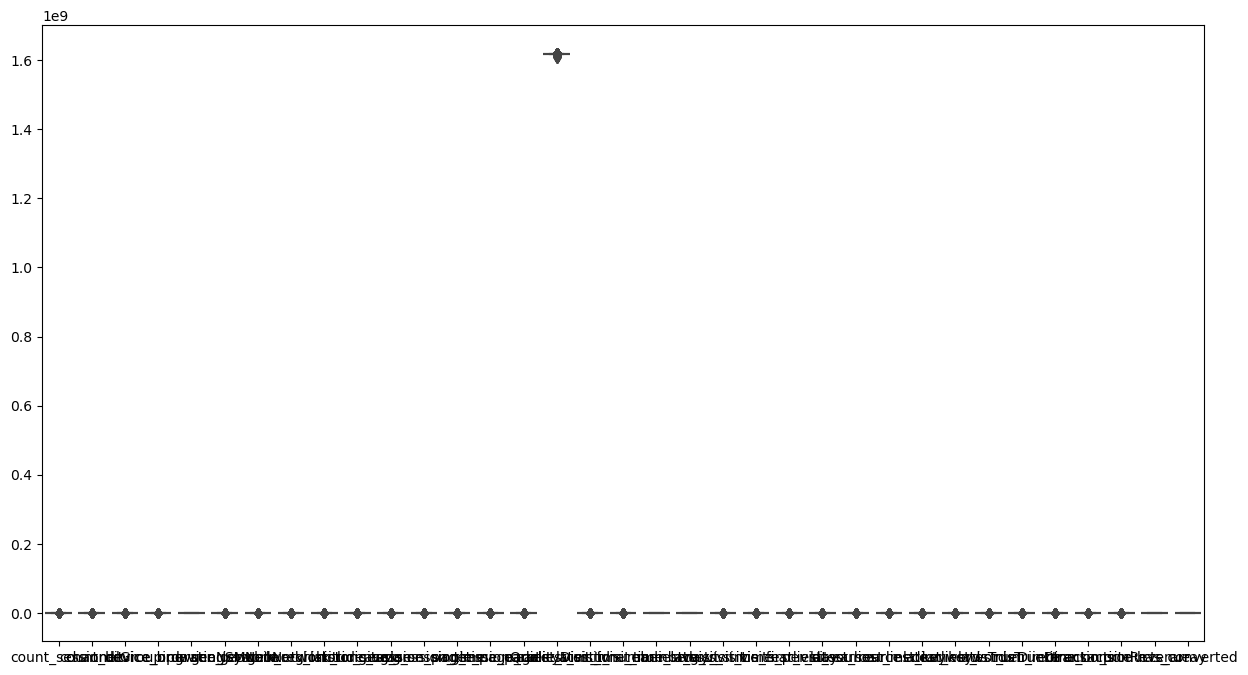

In [56]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data3)
plt.show()

# feature importance 

In [57]:
x =abs(data3.drop('has_converted',axis = 1))
y = data3['has_converted']
selection = SelectKBest(chi2, k=10)
data_select = selection.fit_transform(x,y)


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is

In [58]:
pd.DataFrame({
    "columns":x.columns,
    "chi-sq-value": selection.scores_
}).sort_values('chi-sq-value',ascending=True)

columns  chi-sq-value
32      transactionRevenue  1.543030e-05
20          avg_visit_time  4.335391e-03
24           latest_source  8.316245e-03
8     geoNetwork_longitude  8.276401e-02
7      geoNetwork_latitude  3.338498e-01
18     time_earliest_visit  1.915458e+00
29     latest_isTrueDirect  4.187840e+00
19       time_latest_visit  4.225350e+00
2          channelGrouping  4.693158e+00
5          device_isMobile  5.664169e+00
3           device_browser  9.704956e+00
13        single_page_rate  1.112185e+01
28   earliest_isTrueDirect  1.945813e+01
25         earliest_medium  1.988332e+02
23         earliest_source  2.173645e+02
21  days_since_first_visit  3.082607e+02
6        geoNetwork_region  5.695758e+02
0            count_session  2.066851e+03
27          latest_keyword  3.459922e+03
4   device_operatingSystem  4.667578e+03
14       sessionQualityDim  1.015958e+04
16   earliest_visit_number  1.191770e+04
26        earliest_keyword  1.449621e+04
17     latest_visit_number  2.898662e+04
22          visits_per_day  4.051826e+04
9         historic_session  6.839906e+04
15       earliest_visit_id  1.117457e+05
11        avg_session_time  1.261994e+05
12   avg_session_time_page  1.503576e+05
33          products_array  3.197366e+05
10   historic_session_page  1.703851e+06
1                count_hit  2.238563e+06
31            time_on_site  6.591726e+06
30        num_interactions  1.225644e+07

In [59]:
x =abs(data2.drop('has_converted',axis = 1))
y = data2['has_converted']
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(x,y)

rfc.feature_importances_

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is

array([0.00698481, 0.01817244, 0.00084531, 0.00302553, 0.08115116,
       0.00146751, 0.00225113, 0.00233781, 0.00257694, 0.00987694,
       0.02315707, 0.01571524, 0.02651956, 0.02533698, 0.03548389,
       0.01053492, 0.00828078, 0.00845875, 0.00829639, 0.00792563,
       0.00508979, 0.00505344, 0.01127946, 0.00516018, 0.00080661,
       0.00543614, 0.00932156, 0.00742462, 0.0014936 , 0.00087768,
       0.02423717, 0.05873926, 0.38219381, 0.18448788])

In [60]:
rfc_data = pd.DataFrame({
    "columns":x.columns,
    "rfc-value": rfc.feature_importances_
}).sort_values('rfc-value',ascending=True).head(10)

In [61]:

list(rfc_data['columns'])

['latest_source',
 'channelGrouping',
 'latest_isTrueDirect',
 'device_isMobile',
 'earliest_isTrueDirect',
 'geoNetwork_region',
 'geoNetwork_latitude',
 'geoNetwork_longitude',
 'device_browser',
 'days_since_first_visit']

In [62]:
data4=data3.drop(list(rfc_data['columns']),axis = 1)

In [63]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   int64  
 1   count_hit               9207 non-null   int64  
 2   device_operatingSystem  9207 non-null   int32  
 3   historic_session        9207 non-null   int64  
 4   historic_session_page   9207 non-null   int64  
 5   avg_session_time        9207 non-null   float64
 6   avg_session_time_page   9207 non-null   float64
 7   single_page_rate        9207 non-null   float64
 8   sessionQualityDim       9207 non-null   int64  
 9   earliest_visit_id       9207 non-null   int64  
 10  earliest_visit_number   9207 non-null   int64  
 11  latest_visit_number     9207 non-null   int64  
 12  time_earliest_visit     9207 non-null   float64
 13  time_latest_visit       9207 non-null   float64
 14  avg_visit_time          9207 non-null   int6

In [64]:
#data4 = data4.drop(['earliest_keyword','latest_keyword'],axis = 1)

In [65]:
data4.describe()

count_session     count_hit  device_operatingSystem  historic_session  \
count    9207.000000   9207.000000             9207.000000       9207.000000   
mean       19.908005   2489.793853                3.324101       8449.205061   
std        21.059017   3399.778210                2.442315      10945.490675   
min         1.000000      2.000000                0.000000          2.000000   
25%         7.000000    525.000000                1.000000       2049.000000   
50%        14.000000   1347.000000                1.000000       4923.000000   
75%        26.000000   3149.000000                6.000000      10538.000000   
max       270.000000  48744.000000                6.000000     181715.000000   

       historic_session_page  avg_session_time  avg_session_time_page  \
count            9207.000000       9207.000000            9207.000000   
mean             1807.767785        469.237063             164.288173   
std              4143.496795        434.281188             420.842074   
min                 0.000000          2.000000               0.000000   
25%                 0.000000        221.053977               0.000000   
50%                 0.000000        360.000000               0.000000   
75%              2008.500000        576.293846             135.815657   
max             99896.000000       5441.000000            5441.000000   

       single_page_rate  sessionQualityDim  earliest_visit_id  ...  \
count       9207.000000        9207.000000       9.207000e+03  ...   
mean           0.874842          11.488215       1.617291e+09  ...   
std            0.250875          15.715482       1.267289e+06  ...   
min            0.000000           1.000000       1.606934e+09  ...   
25%            0.879655           2.000000       1.617134e+09  ...   
50%            1.000000           5.000000       1.617353e+09  ...   
75%            1.000000          10.000000       1.617701e+09  ...   
max            1.000000         100.000000       1.619899e+09  ...   

       visits_per_day  earliest_source  earliest_medium  earliest_keyword  \
count     9207.000000      9207.000000      9207.000000       9207.000000   
mean       114.390833        22.441838         7.098621         53.268600   
std        136.507190         7.939995         2.963689         64.885066   
min          0.923077         0.000000         0.000000          0.000000   
25%         34.042445        24.000000         7.000000          3.000000   
50%         71.050000        24.000000         7.000000         45.000000   
75%        142.363095        24.000000         7.000000         88.000000   
max       2397.333333        35.000000        17.000000        409.000000   

       latest_keyword  num_interactions  time_on_site  transactionRevenue  \
count     9207.000000       9207.000000  9.207000e+03        9.207000e+03   
mean        84.458890       8871.946562  1.579085e+04        9.101137e-09   
std         92.511608      12445.373787  4.955897e+04        1.554613e-08   
min          0.000000         20.000000  0.000000e+00        6.466583e-11   
25%         28.000000       1551.000000  6.115000e+02        2.729288e-09   
50%         91.000000       4529.000000  2.712000e+03        2.729288e-09   
75%         95.000000      11295.000000  1.102800e+04        9.187369e-09   
max        571.000000     197630.000000  1.250267e+06        4.897270e-07   

       products_array  has_converted  
count     9207.000000    9207.000000  
mean      1712.539698       0.416314  
std       1034.678640       0.492974  
min          0.000000       0.000000  
25%        917.500000       0.000000  
50%       1964.000000       0.000000  
75%       2331.000000       1.000000  
max       3558.000000       1.000000  

[8 rows x 25 columns]

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


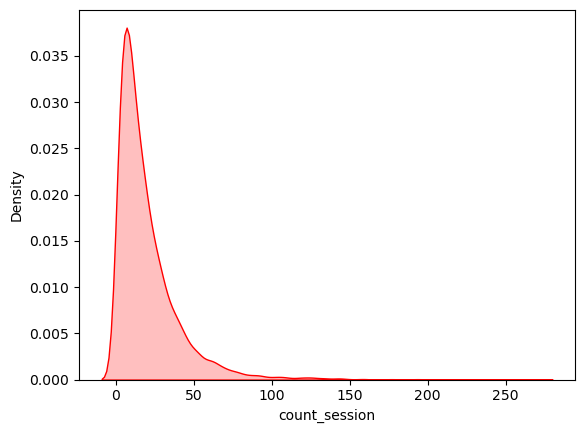

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


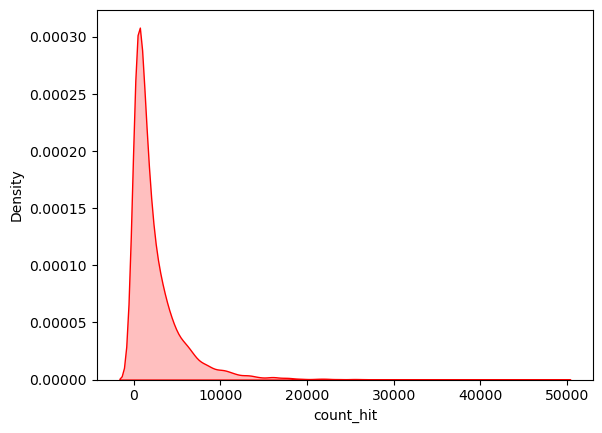

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


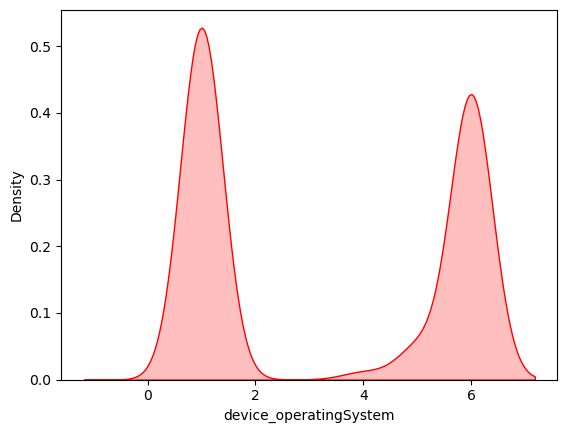

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


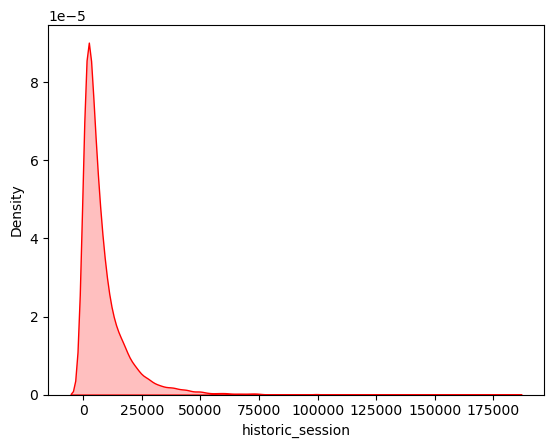

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


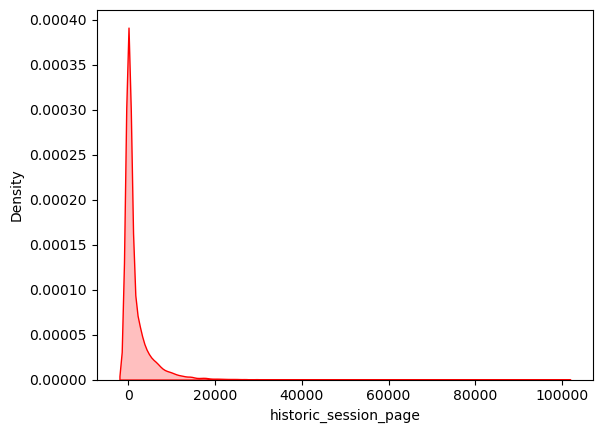

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


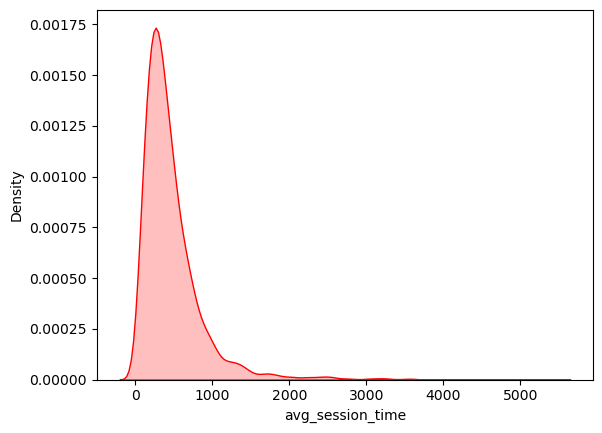

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


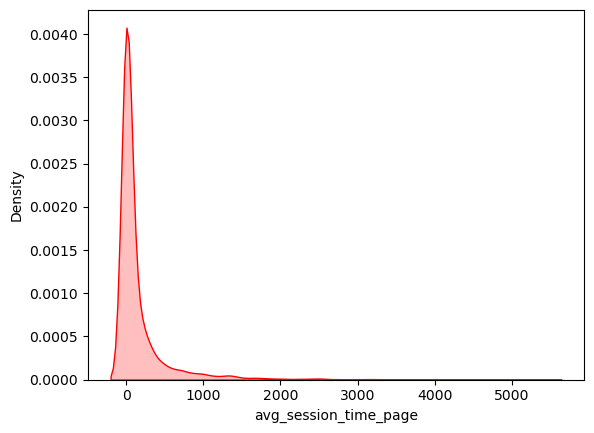

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


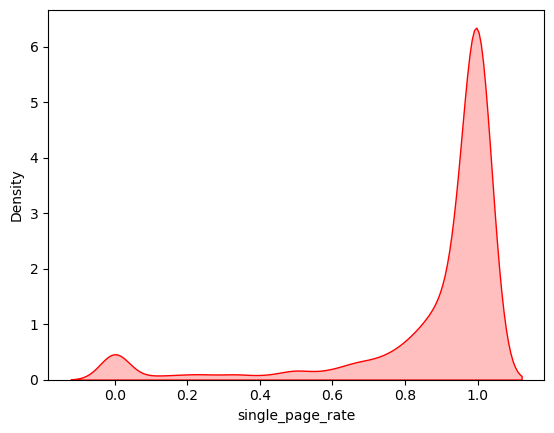

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


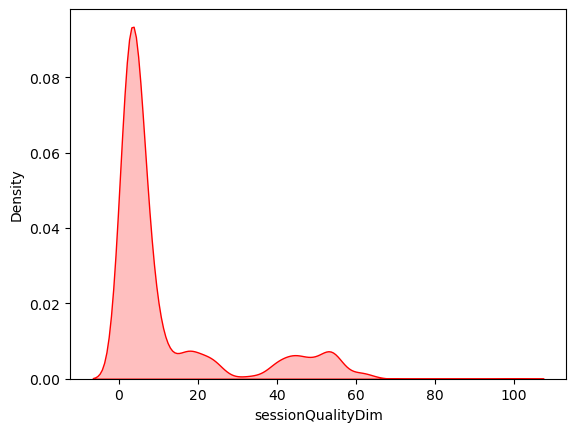

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


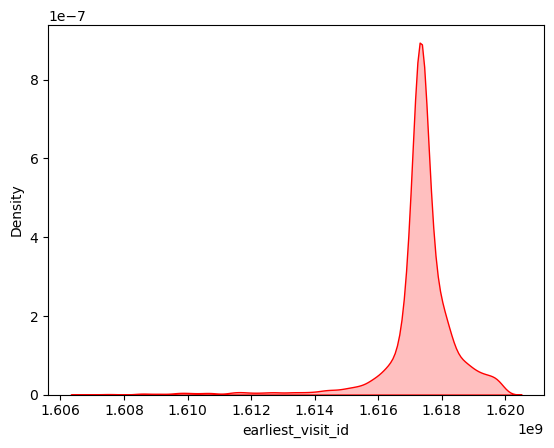

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


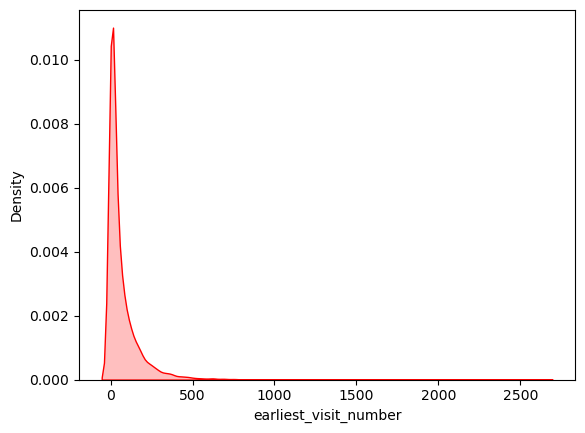

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


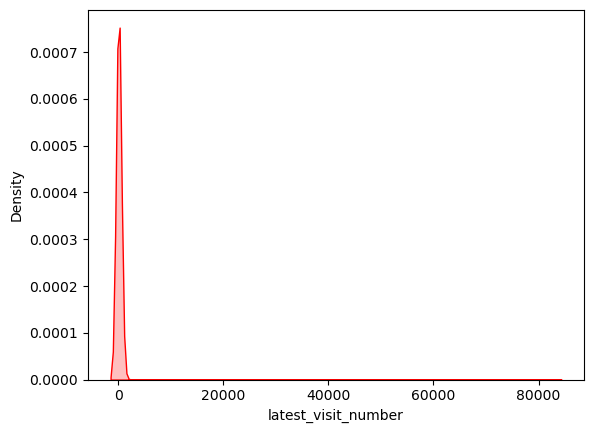

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


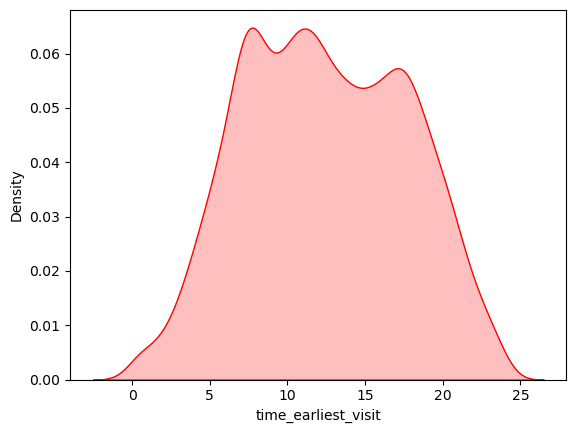

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


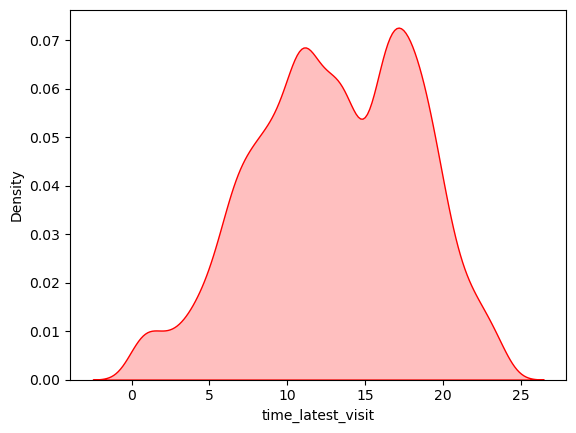

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


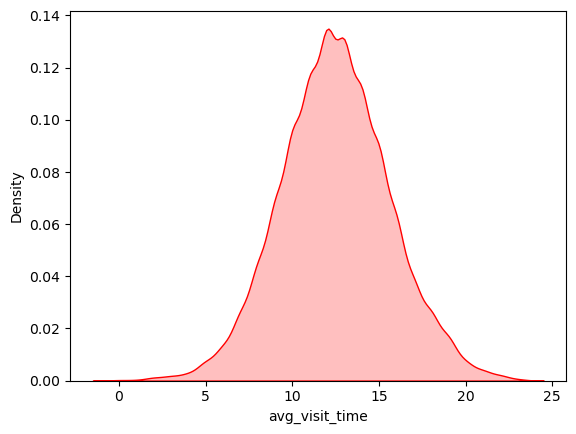

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


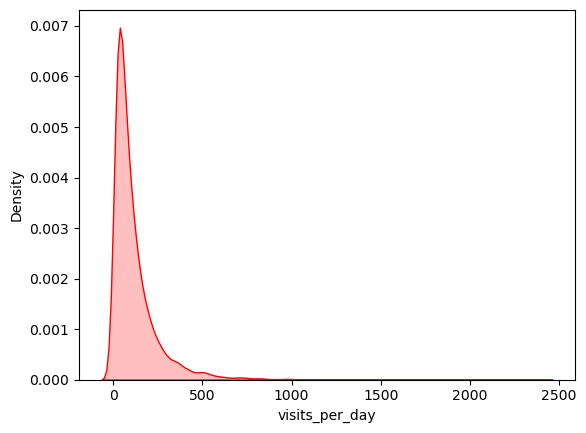

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


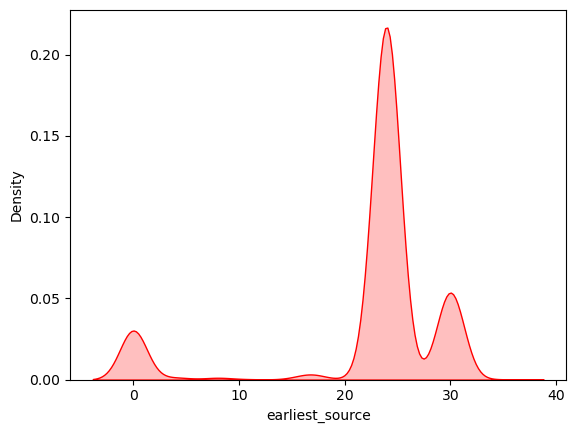

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


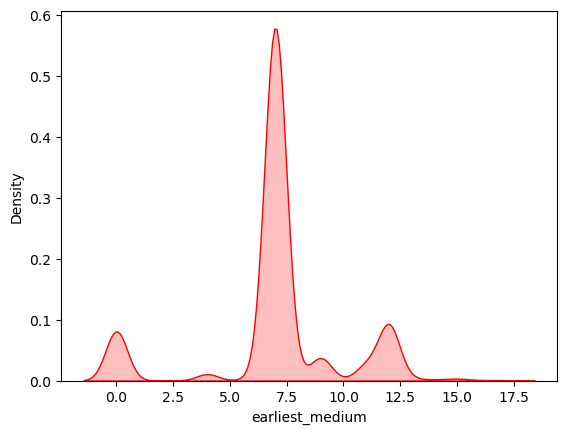

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


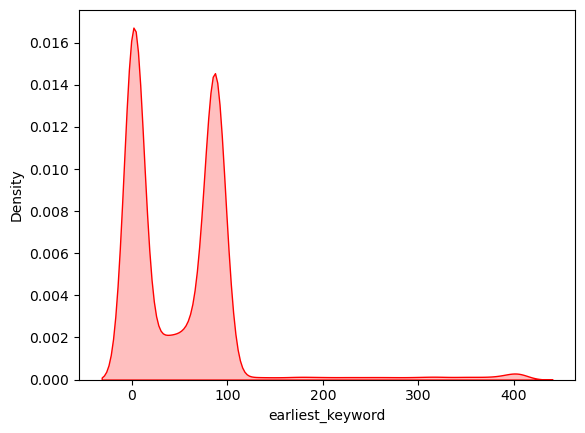

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


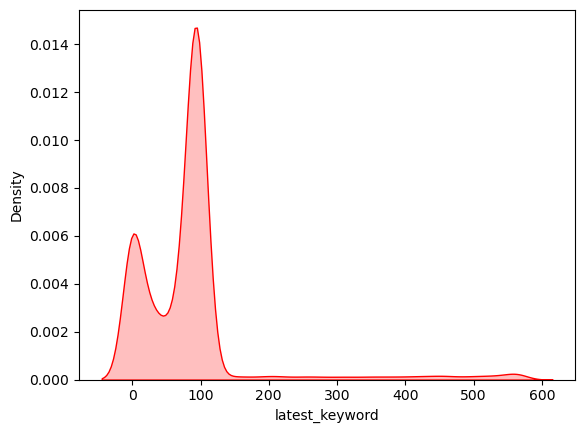

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


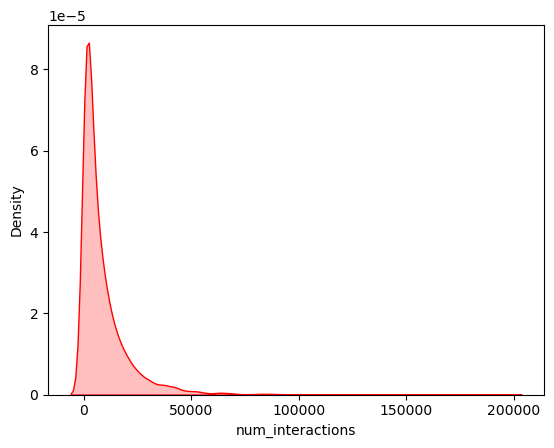

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


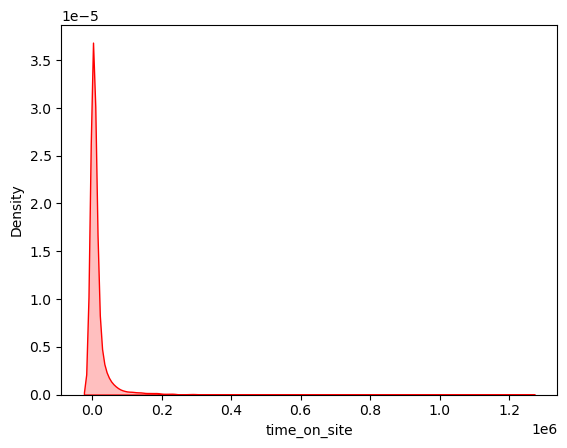

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


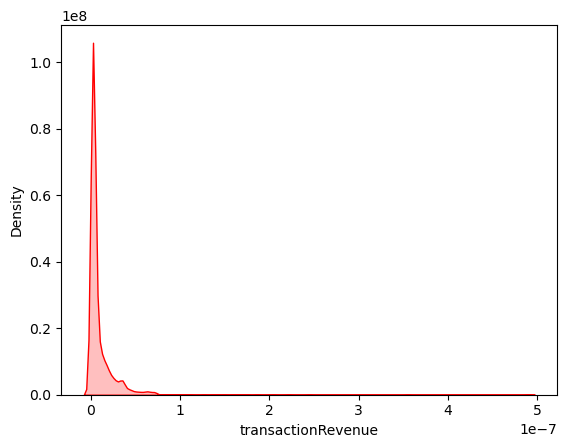

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


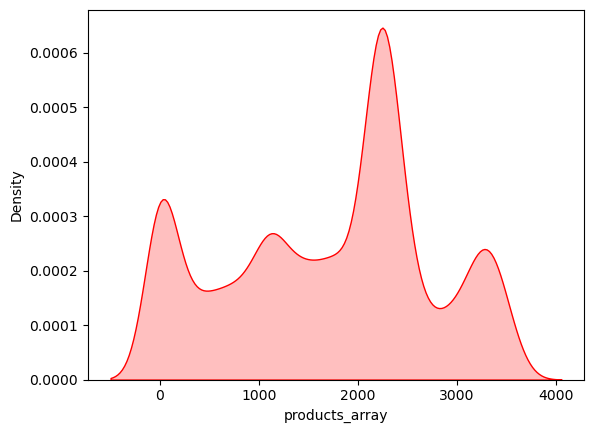

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


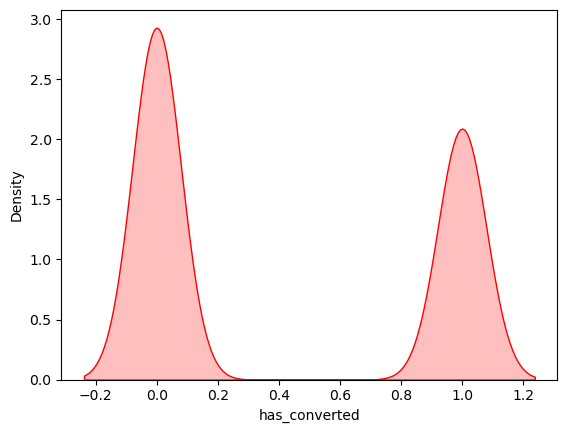

In [66]:
col_name = data4.columns
for i in col_name:
    sns.kdeplot(data = data4[i],fill = True,color='r')
    plt.show()

In [67]:
col_name

Index(['count_session', 'count_hit', 'device_operatingSystem',
       'historic_session', 'historic_session_page', 'avg_session_time',
       'avg_session_time_page', 'single_page_rate', 'sessionQualityDim',
       'earliest_visit_id', 'earliest_visit_number', 'latest_visit_number',
       'time_earliest_visit', 'time_latest_visit', 'avg_visit_time',
       'visits_per_day', 'earliest_source', 'earliest_medium',
       'earliest_keyword', 'latest_keyword', 'num_interactions',
       'time_on_site', 'transactionRevenue', 'products_array',
       'has_converted'],
      dtype='object')

# scaling

In [68]:
x = data4.drop('has_converted',axis = 1)
y = data4['has_converted']

In [69]:
train_data,test_data,train_lab,test_lab = train_test_split(x,y,test_size=0.2,random_state= 42)

In [70]:
train_data.shape

(7365, 24)

In [71]:
test_data.shape

(1842, 24)

In [72]:
test_data # test data columns name _array

count_session  count_hit  device_operatingSystem  historic_session  \
2898              18       1325                       1              6011   
46221              4        551                       6              1461   
24853             23        733                       1              3622   
51984             15       1169                       1              6860   
97761             91       7817                       1             45222   
...              ...        ...                     ...               ...   
16113             16       3225                       6              2437   
83901              5        631                       6              1353   
49509            177      11603                       1             79642   
43910              4        128                       5              7400   
15106             25       3133                       6             10349   

       historic_session_page  avg_session_time  avg_session_time_page  \
2898                     880        333.944444              48.888889   
46221                     52        365.250000              13.000000   
24853                    405        157.478261              17.608696   
51984                   2821        457.333333             188.066667   
97761                  12103        496.945055             133.000000   
...                      ...               ...                    ...   
16113                      0        152.312500               0.000000   
83901                      0        270.600000               0.000000   
49509                  13730        449.954802              77.570621   
43910                   7155       1850.000000            1788.750000   
15106                      0        413.960000               0.000000   

       single_page_rate  sessionQualityDim  earliest_visit_id  ...  \
2898           0.833333                 25         1616755460  ...   
46221          0.750000                  4         1615934549  ...   
24853          0.956522                  3         1617542444  ...   
51984          0.800000                  4         1618167906  ...   
97761          0.901099                 20         1617344953  ...   
...                 ...                ...                ...  ...   
16113          1.000000                  2         1617287707  ...   
83901          1.000000                  2         1613576606  ...   
49509          0.954802                  6         1617335645  ...   
43910          0.250000                 61         1618212688  ...   
15106          1.000000                  2         1617472025  ...   

       avg_visit_time  visits_per_day  earliest_source  earliest_medium  \
2898               16       47.066667               24               11   
46221              22      557.000000                0                0   
24853              11       29.320000               30                9   
51984              18       64.944444               24                7   
97761              12      260.566667               24                7   
...               ...             ...              ...              ...   
16113              13      104.032258               24                7   
83901              12       30.047619                0                0   
49509               8      386.766667               24                7   
43910              11       66.250000               24                7   
15106              14      111.892857               24                7   

       earliest_keyword  latest_keyword  num_interactions  time_on_site  \
2898                  2               0              5198           972   
46221                 3              68               557          1412   
24853                 3               1              3375           276   
51984                90              97              1169        219685   
97761                88              91             39638         95190   
...          

In [73]:
train_lab.shape

(7365,)

In [74]:
test_lab.shape

(1842,)

In [75]:
sc =StandardScaler()
sc.fit(train_data)
train_data =sc.transform(train_data)
test_data =sc.transform(test_data)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if no

In [76]:
test_data[0]

array([-0.09475249, -0.34097178, -0.95086564, -0.22702815, -0.23622054,
       -0.31913002, -0.27871743, -0.15671099,  0.84903715, -0.41321112,
       -0.5133527 , -0.051672  , -0.31316709, -1.5532058 ,  1.13897782,
       -0.49616519,  0.20499162,  1.30783586, -0.79068451, -0.91891037,
       -0.29318635, -0.29366558, -0.40394026,  0.4564394 ])

# Model selection

In [77]:
### performance metrics (f1_score,recall_score,precision_score,accuracy_score)

In [78]:
model = {
    'logistic regression':LogisticRegression(),
    'gaussian':GaussianNB(),
    'supporting vector':SVC(),
    'k_neignbour':KNeighborsClassifier(),
    'decision tree':DecisionTreeClassifier(),
    'extra tree':ExtraTreeClassifier(),
    'randon_forest':RandomForestClassifier(),
    'gradient boost':GradientBoostingClassifier(),
    'ada boost':AdaBoostClassifier(),
    'bagging':BaggingClassifier()
    
}
result = []
for name,md in model.items():
    md.fit(train_data,train_lab)
    train_predi = md.predict(train_data)
    test_predi = md.predict(test_data)
    
    train_acc= accuracy_score(train_lab, train_predi)
    train_f1 = f1_score(train_lab, train_predi,average= 'micro') 
    train_preci = precision_score(train_lab, train_predi,average= 'micro')
    train_recall = recall_score(train_lab, train_predi,average= 'micro')
     
    #***********************************************************
    test_acc= accuracy_score(test_lab, test_predi)
    test_f1 = f1_score(test_lab, test_predi,average= 'micro') 
    test_preci = precision_score(test_lab, test_predi,average= 'micro')
    test_recall = recall_score(test_lab, test_predi,average= 'micro')
    
    

    # Append results to the list
    result.append({
        'Model': name,
        'Train_Accuracy': train_acc,
        'Train_F1_Score': train_f1,
        'Train_Precision': train_preci,
        'Train_Recall': train_recall,
        
        'Test_Accuracy': test_acc,
        'Test_F1_Score': test_f1,
        'Test_Precision': test_preci,
        'Test_Recall': test_recall
        
    })
    
# Create a DataFrame from the list of results
df_results = pd.DataFrame(result)
df_results 

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype

Model  Train_Accuracy  Train_F1_Score  Train_Precision  \
0  logistic regression        0.808554        0.808554         0.808554   
1             gaussian        0.801358        0.801358         0.801358   
2    supporting vector        0.908215        0.908215         0.908215   
3          k_neignbour        0.885811        0.885811         0.885811   
4        decision tree        1.000000        1.000000         1.000000   
5           extra tree        1.000000        1.000000         1.000000   
6        randon_forest        1.000000        1.000000         1.000000   
7       gradient boost        0.975967        0.975967         0.975967   
8            ada boost        0.960625        0.960625         0.960625   
9              bagging        0.997284        0.997284         0.997284   

   Train_Recall  Test_Accuracy  Test_F1_Score  Test_Precision  Test_Recall  
0      0.808554       0.800760       0.800760        0.800760     0.800760  
1      0.801358       0.787188       0.787188        0.787188     0.787188  
2      0.908215       0.874593       0.874593        0.874593     0.874593  
3      0.885811       0.837676       0.837676        0.837676     0.837676  
4      1.000000       0.947340       0.947340        0.947340     0.947340  
5      1.000000       0.824647       0.824647        0.824647     0.824647  
6      1.000000       0.955483       0.955483        0.955483     0.955483  
7      0.975967       0.961455       0.961455        0.961455     0.961455  
8      0.960625       0.955483       0.955483        0.955483     0.955483  
9      0.997284       0.955483       0.955483        0.955483     0.955483

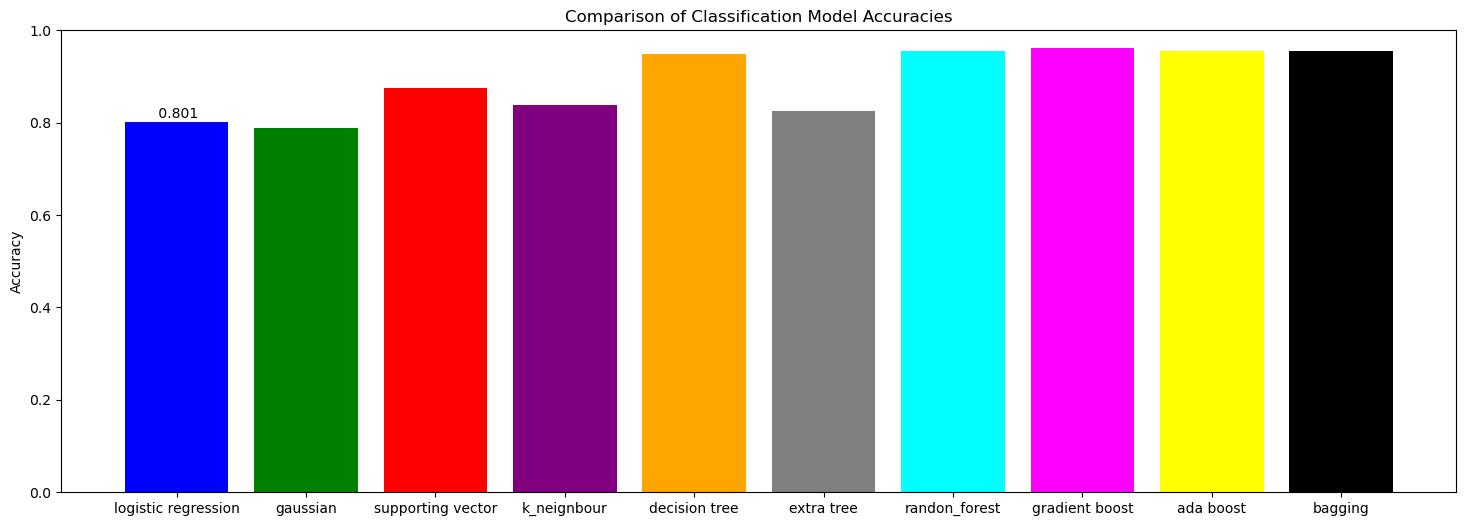

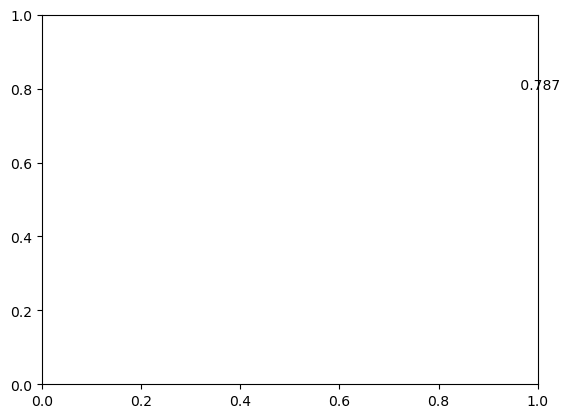

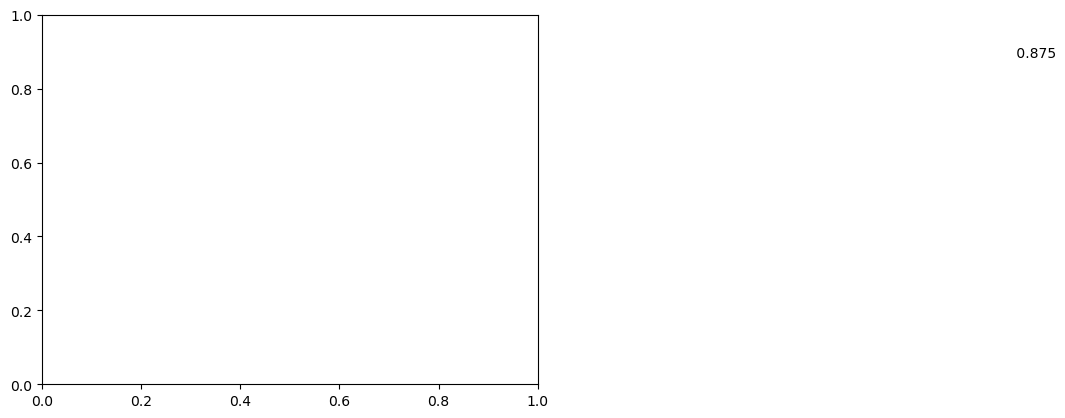

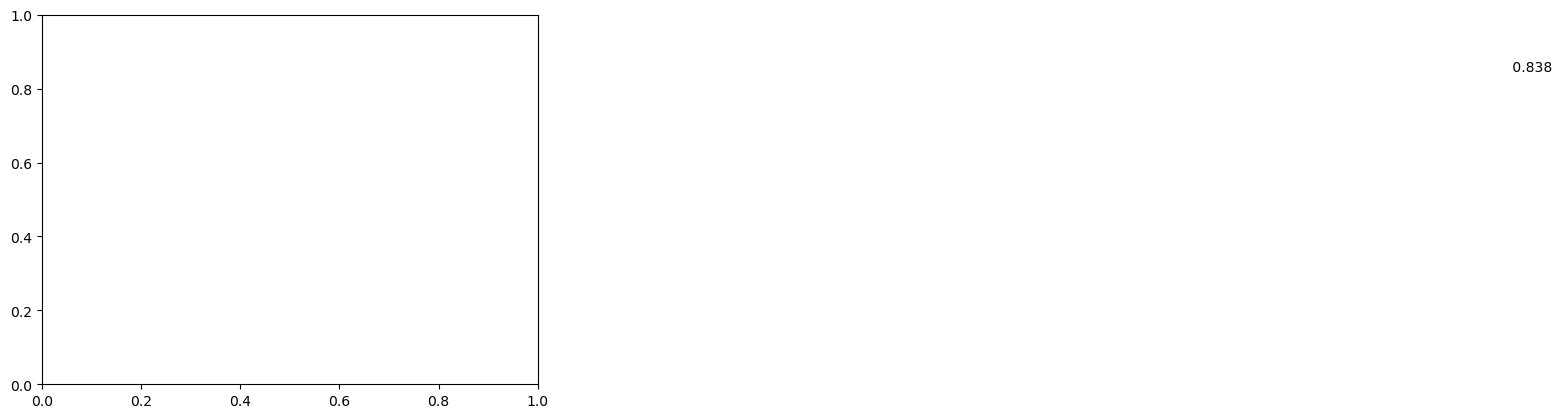

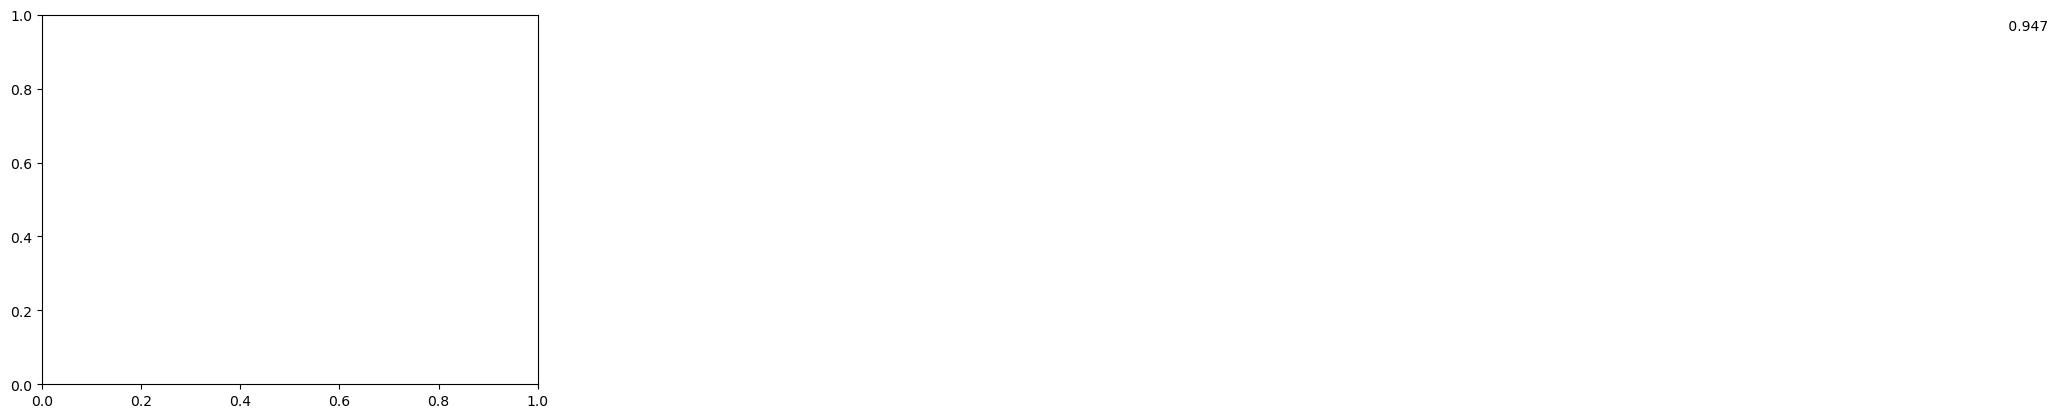

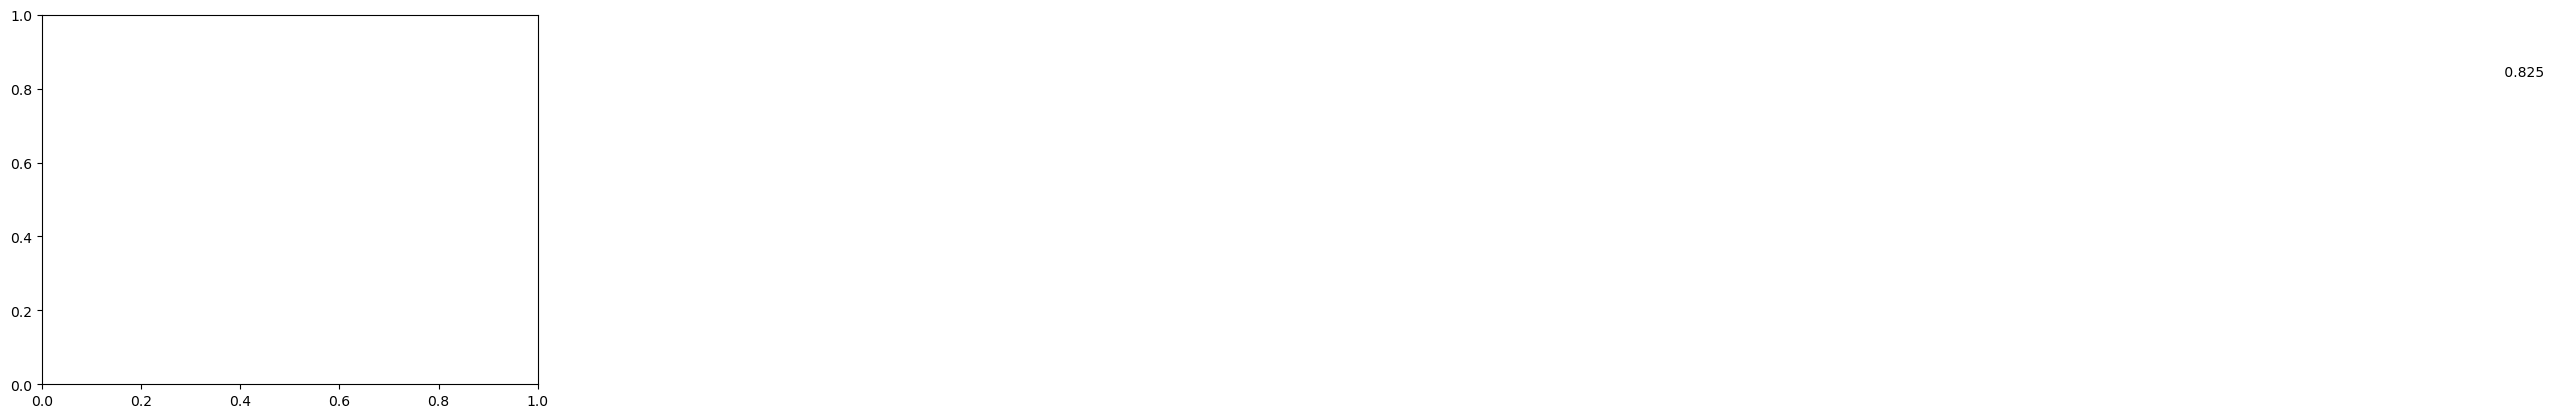

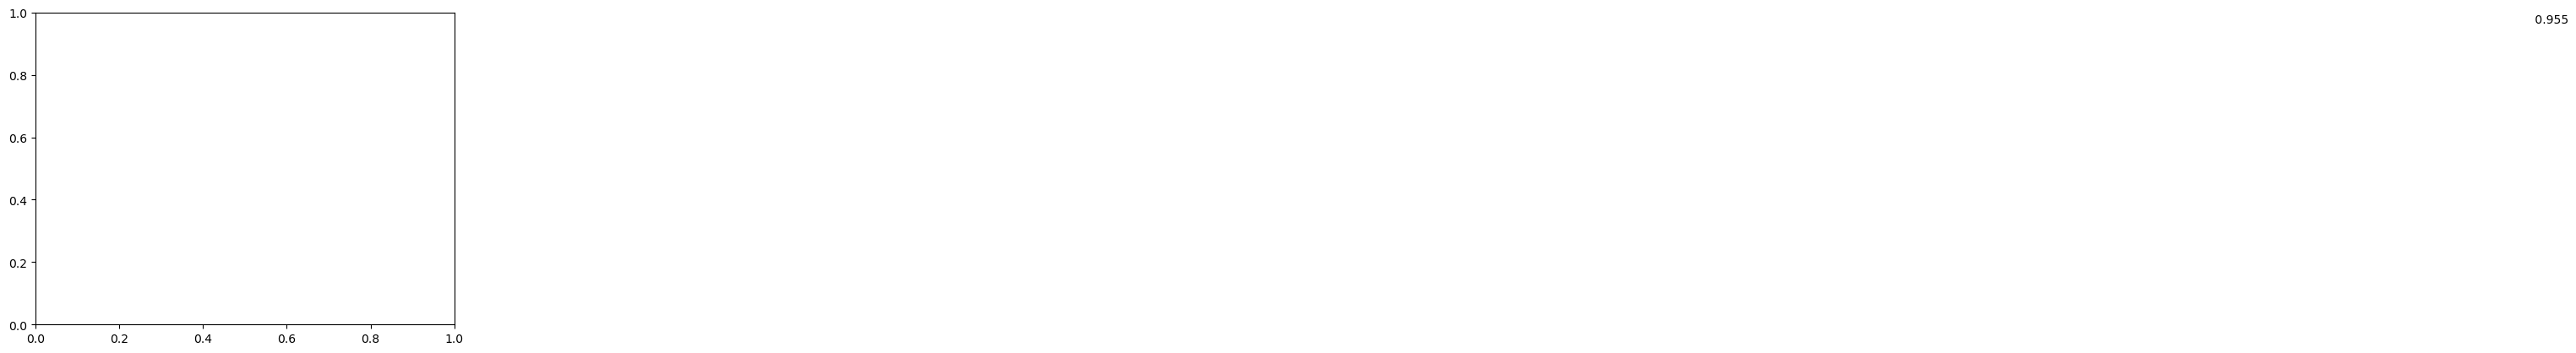

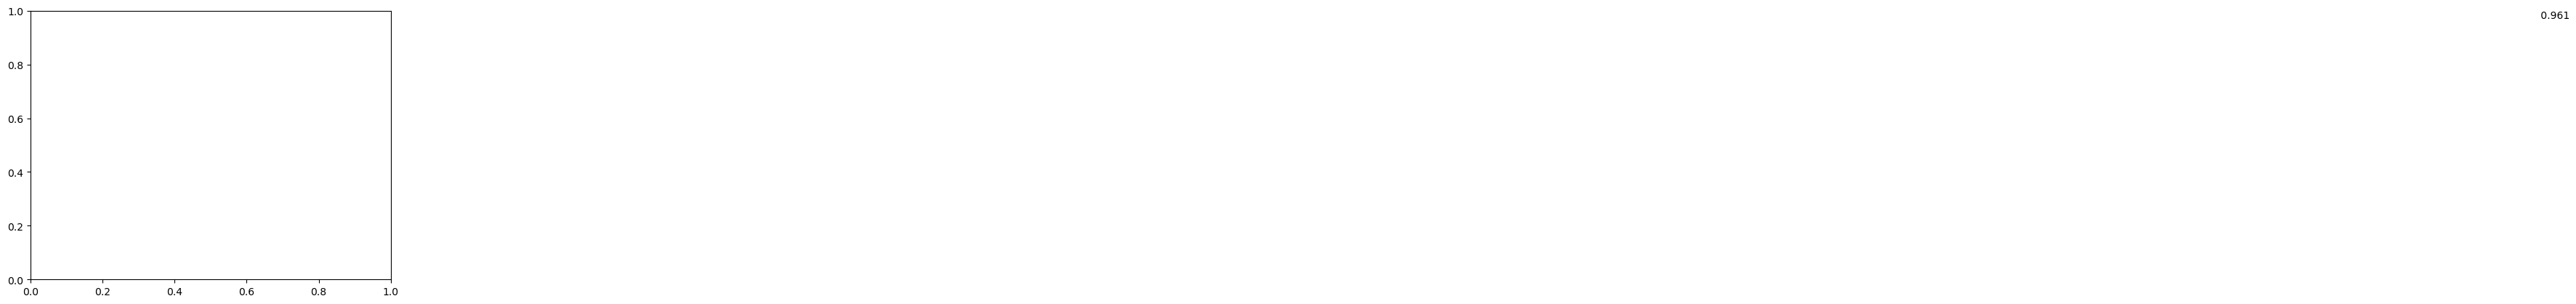

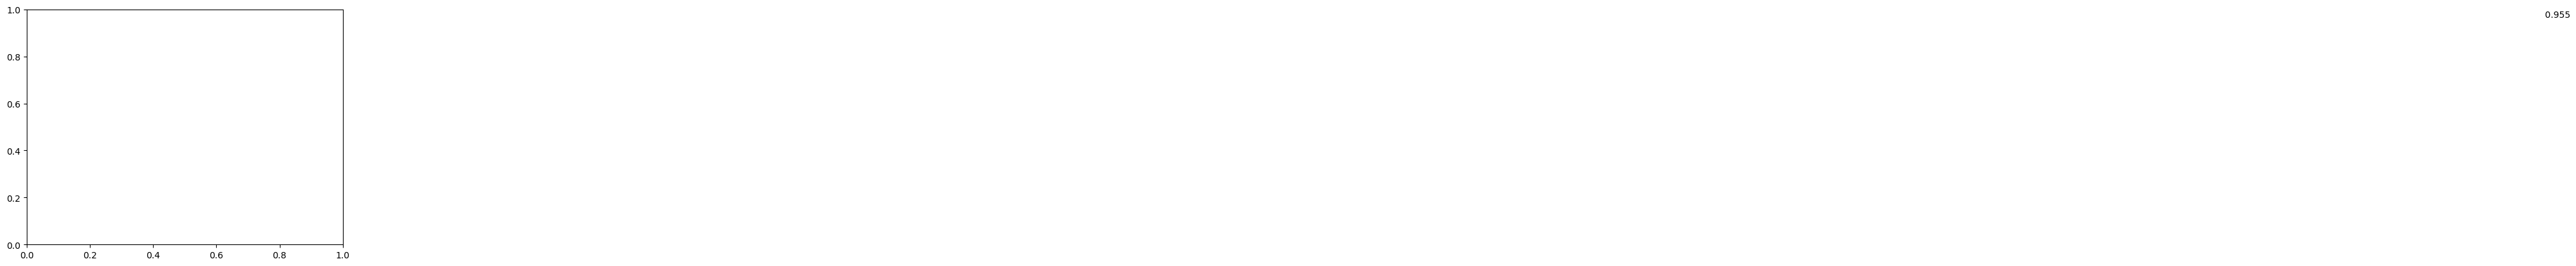

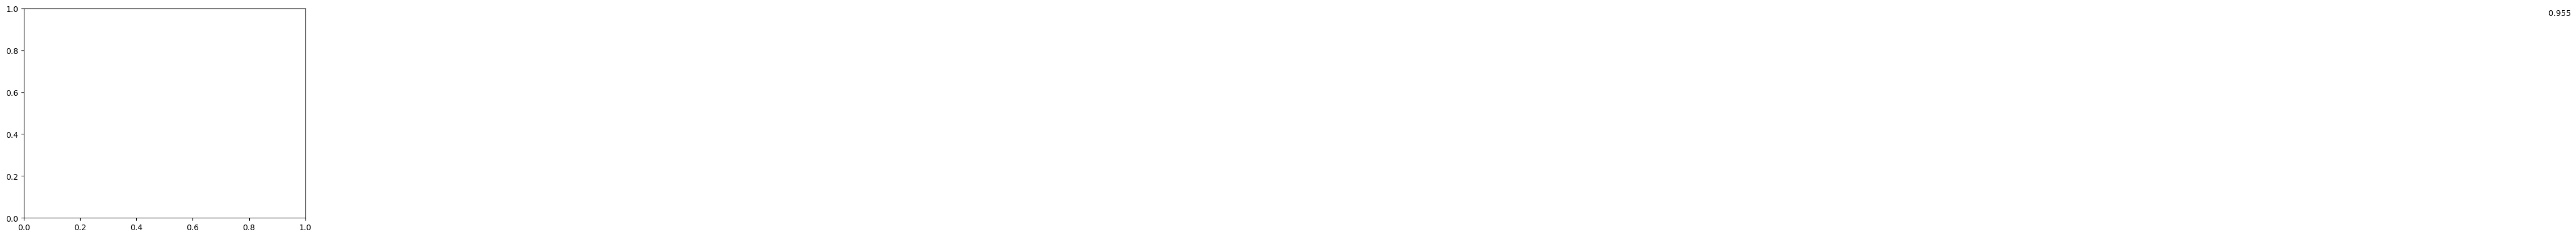

In [79]:
### comparision of aacuracy score
model_name =df_results['Model'] 
acc = df_results['Test_Accuracy']

plt.figure(figsize=(18, 6))
plt.bar(model_name, acc, color =['blue', 'green', 'red', 'purple','orange','grey','cyan','magenta','yellow','black'])
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Model Accuracies')
plt.ylim(0, 1)
for i, v in enumerate(acc):
    plt.text(i, v + 0.01, " {:.3f}".format(v), ha='center', color='black')
    plt.show()

In [80]:
rfc = RandomForestClassifier(n_estimators=50,random_state=42)
rfc.fit(train_data,train_lab)
train_predi = rfc.predict(train_data)
test_predi = rfc.predict(test_data)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [84]:
with open("rfc.pkl","wb") as mf:
    pickle.dump(rfc,mf)